In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'fangTestonFUSCC01', 'fangTestonFUSCC01.rar', 'RFselect01-auc-MI2023.csv', 'split']
列表名： ['LR', 'SVM', 'KNN', 'NB', 'RF', 'STACK', 'RFFI', 'RFFI1']


In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'SVM'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/Train-FS-ZSCORE-MI-SVM.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/InternalTest-FS-ZSCORE-MI-SVM.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/ExternalTest-FS-ZSCORE-MI-SVM.csv",index=None)



In [4]:
train.shape

(258, 22)

In [5]:
test.shape

(65, 22)

In [6]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [8]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/Train-FS-ZSCORE-MI-SVM.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   CT_lbp-3D-m1_glrlm_ShortRunEmphasis                       258 non-null    float64
 1   CT_wavelet-LLH_firstorder_10Percentile                    258 non-null    float64
 2   CT_wavelet2-HHL_glcm_ClusterShade                         258 non-null    float64
 3   PET_original_shape_MajorAxisLength                        258 non-null    float64
 4   CT_original_glcm_Imc1                                     258 non-null    float64
 5   PET_original_glcm_JointEnergy                             258 non-null    float64
 6   CT_wavelet-LLH_firstorder_90Percentile                    258 non-null    float64
 7   CT_wavelet-HLH_firstorder_RootMeanSquared                 258 non-null    float64
 8   CT_original_shape_Su

count   mean   std  \
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                258.000  0.000 1.002   
CT_wavelet-LLH_firstorder_10Percentile             258.000 -0.000 1.002   
CT_wavelet2-HHL_glcm_ClusterShade                  258.000  0.000 1.002   
PET_original_shape_MajorAxisLength                 258.000  0.000 1.002   
CT_original_glcm_Imc1                              258.000 -0.000 1.002   
PET_original_glcm_JointEnergy                      258.000  0.000 1.002   
CT_wavelet-LLH_firstorder_90Percentile             258.000  0.000 1.002   
CT_wavelet-HLH_firstorder_RootMeanSquared          258.000  0.000 1.002   
CT_original_shape_SurfaceVolumeRatio               258.000 -0.000 1.002   
CT_wavelet-LHL_firstorder_Median                   258.000  0.000 1.002   
CT_wavelet-LLH_firstorder_Kurtosis                 258.000  0.000 1.002   
CT_original_firstorder_90Percentile                258.000 -0.000 1.002   
CT_wavelet-HLL_firstorder_Mean                     258.000  0.000 1.002   
CT_wavelet2-HHH_glszm_SizeZoneNonUniformityNorm... 258.000  0.000 1.002   
CT_wavelet2-HLL_firstorder_Mean                    258.000  0.000 1.002   
CT_wavelet-LHL_firstorder_Maximum                  258.000  0.000 1.002   
CT_wavelet-HHL_glcm_ClusterShade                   258.000  0.000 1.002   
CT_wavelet2-HHH_firstorder_Median                  258.000  0.000 1.002   
CT_lbp-3D-k_glszm_SmallAreaEmphasis                258.000 -0.000 1.002   
CT_wavelet-LLH_gldm_LargeDependenceHighGrayLeve... 258.000  0.000 1.002   
CT_original_glszm_SizeZoneNonUniformityNormalized  258.000 -0.000 1.002   
label                                              258.000  0.442 0.498   

                                                       min    10%    25%  \
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                 -2.229 -1.183 -0.682   
CT_wavelet-LLH_firstorder_10Percentile              -5.602 -1.020 -0.359   
CT_wavelet2-HHL_glcm_ClusterShade                   -4.003 -0.567 -0.087   
PET_original_shape_MajorAxisLength                  -1.057 -0.760 -0.566   
CT_original_glcm_Imc1                               -3.523 -1.176 -0.490   
PET_original_glcm_JointEnergy                       -0.422 -0.402 -0.367   
CT_wavelet-LLH_firstorder_90Percentile              -1.307 -0.909 -0.604   
CT_wavelet-HLH_firstorder_RootMeanSquared           -5.065 -0.677 -0.439   
CT_original_shape_SurfaceVolumeRatio                -1.857 -1.386 -0.829   
CT_wavelet-LHL_firstorder_Median                    -5.424 -0.702 -0.272   
CT_wavelet-LLH_firstorder_Kurtosis                  -0.952 -0.631 -0.536   
CT_original_firstorder_90Percentile                 -7.906 -1.037 -0.123   
CT_wavelet-HLL_firstorder_Mean                      -4.788 -0.751 -0.194   
CT_wavelet2-HHH_glszm_SizeZoneNonUniformityNorm...  -1.588 -1.174 -0.730   
CT_wavelet2-HLL_firstorder_Mean                     -7.019 -0.719 -0.205   
CT_wavelet-LHL_firstorder_Maximum                   -1.408 -1.058 -0.751   
CT_wavelet-HHL_glcm_ClusterShade                   -10.972 -0.460 -0.118   
CT_wavelet2-HHH_firstorder_Median                   -4.112 -0.861 -0.288   
CT_lbp-3D-k_glszm_SmallAreaEmphasis                 -2.931 -1.164 -0.248   
CT_wavelet-LLH_gldm_LargeDependenceHighGrayLeve...  -0.748 -0.646 -0.579   
CT_original_glszm_SizeZoneNonUniformityNormalized   -3.849 -1.203 -0.623   
label                                                0.000  0.000  0.000   

                                                      50%    75%   90%   95%  \
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                -0.088  0.588 1.349 1.883   
CT_wavelet-LLH_firstorder_10Percentile              0.147  0.627 1.044 1.208   
CT_wavelet2-HHL_glcm_ClusterShade                   0.032  0.117 0.403 0.921   
PET_original_shape_MajorAxisLength                 -0.291  0.163 1.227 1.782   
CT_original_glcm_Imc1                               0.114  0.626 1.213 1.559   
PET_original_glcm_JointEnergy                      -0.246 -0.007 0.549 0.968   
CT_wavelet-LLH_fir

In [9]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_lbp-3D-m1_glrlm_ShortRunEmphasis                         0
CT_wavelet-LLH_firstorder_10Percentile                      0
CT_original_glszm_SizeZoneNonUniformityNormalized           0
CT_wavelet-LLH_gldm_LargeDependenceHighGrayLevelEmphasis    0
CT_lbp-3D-k_glszm_SmallAreaEmphasis                         0
CT_wavelet2-HHH_firstorder_Median                           0
CT_wavelet-HHL_glcm_ClusterShade                            0
CT_wavelet-LHL_firstorder_Maximum                           0
CT_wavelet2-HLL_firstorder_Mean                             0
CT_wavelet2-HHH_glszm_SizeZoneNonUniformityNormalized       0
CT_wavelet-HLL_firstorder_Mean                              0
CT_original_firstorder_90Percentile                         0
CT_wavelet-LLH_firstorder_Kurtosis                          0
CT_wavelet-LHL_firstorder_Median                            0
CT_original_shape_SurfaceVolumeRatio                        0
CT_wavelet-HLH_firstorder_RootMeanSquared                   0
CT_wavel

In [10]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [11]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/Train-FS-ZSCORE-MI-SVM.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/InternalTest-FS-ZSCORE-MI-SVM.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [12]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [13]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [14]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [15]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [16]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [17]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [18]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [19]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [20]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [21]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, classes=["EGFR Wild", "EGFR Mutated"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [22]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, classes=["EGFR Wild", "EGFR Mutated"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [24]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [25]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [26]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [27]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [28]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [29]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [30]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.508772
Naive Bayes: 0.485867
KNN: 0.527290
SVM: 0.556043
ANN: 0.495614
CART: 0.596004
BaggedTrees: 0.522417
RF: 0.619883
AdaBoost: 0.548733
GBM: 0.620370
XGBoost: 0.615010
LightGBM: 0.622807
CatBoost: 0.604288
NGBoost: 0.628168

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.612          0.509
1          Naive Bayes           0.577          0.486
2                  KNN           0.698          0.527
3                  SVM           0.763          0.556
4                  ANN           0.899          0.496
5                 CART           1.000          0.596
6          BaggedTrees           0.988          0.522
7                   RF           1.000          0.620
8             AdaBoost           0.935          0.549
9                  GBM           1.000          0.620
10

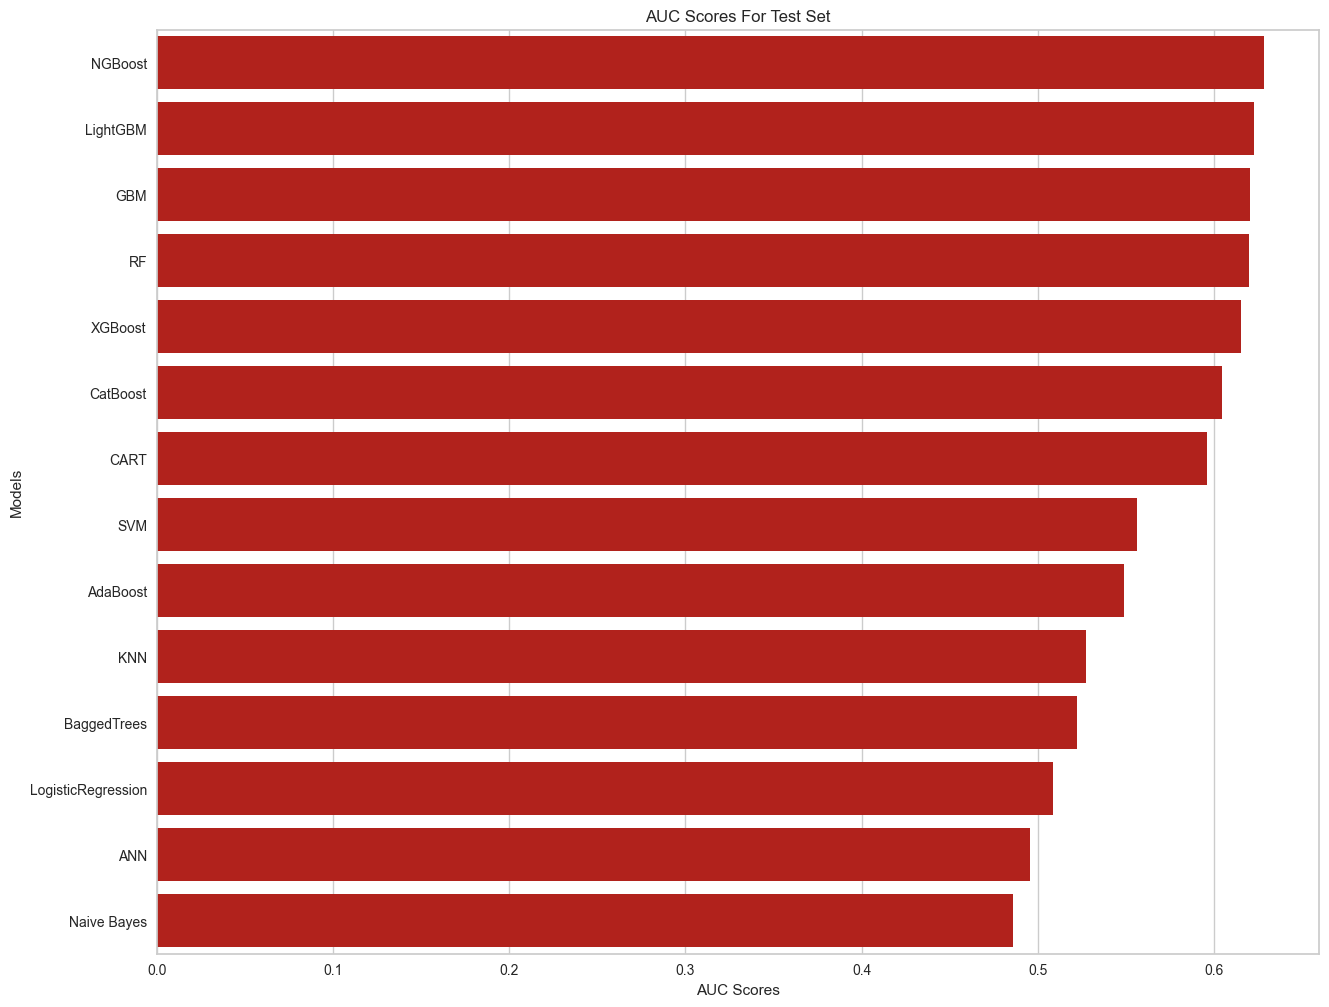

In [31]:
evaluate_classification_model_holdout(base_models)

In [128]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


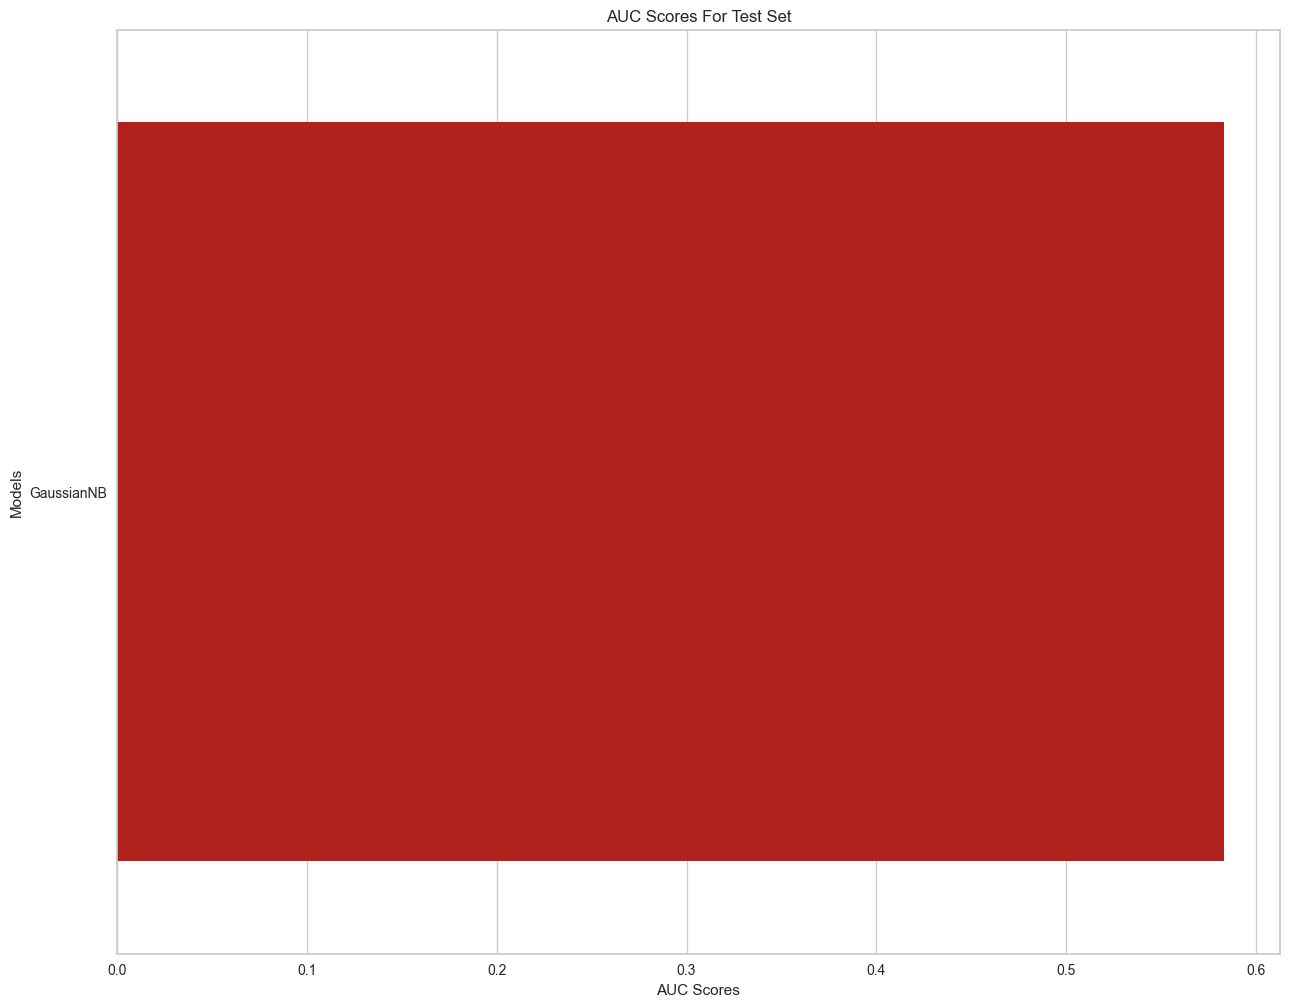

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

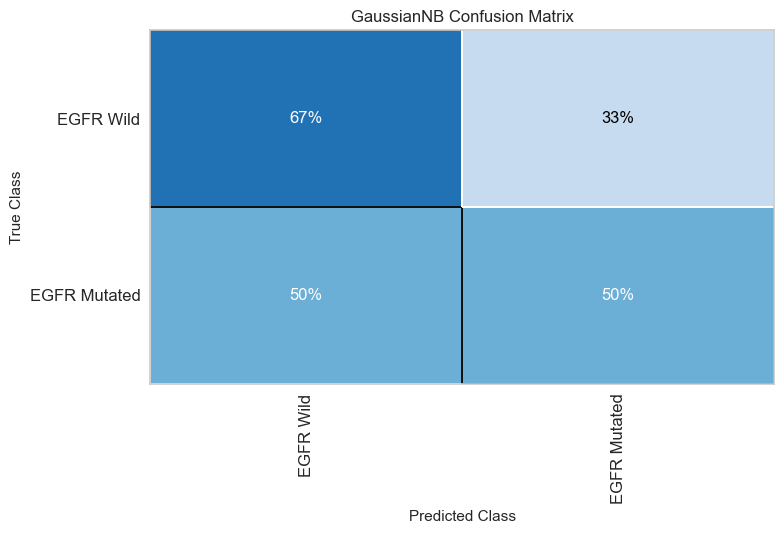

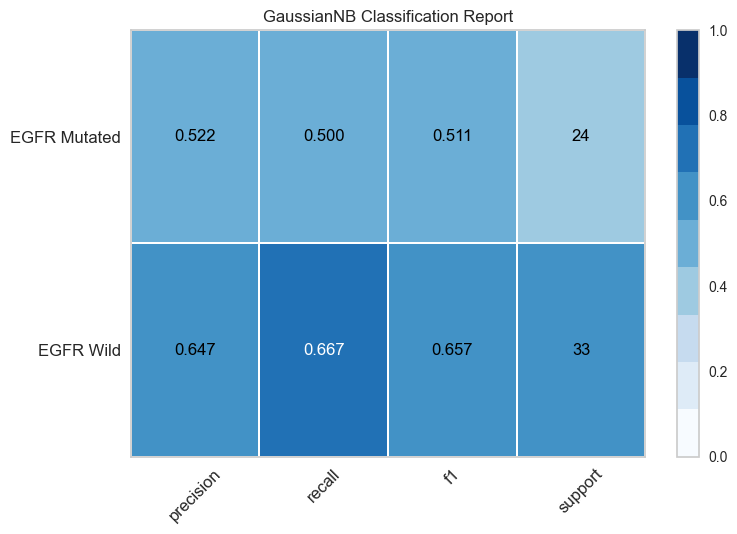

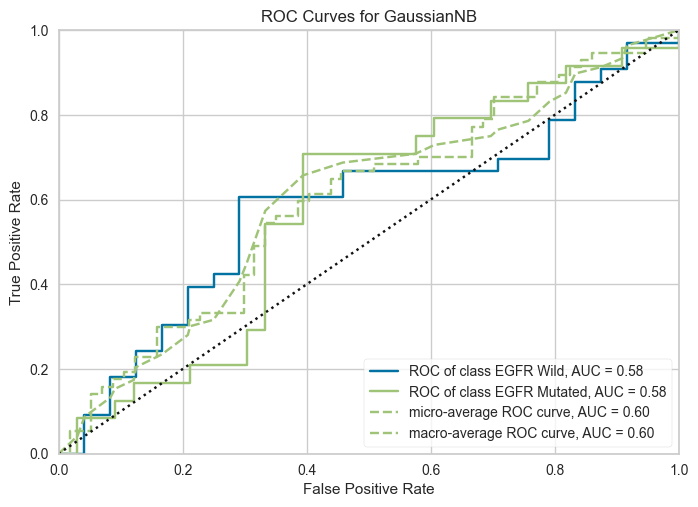

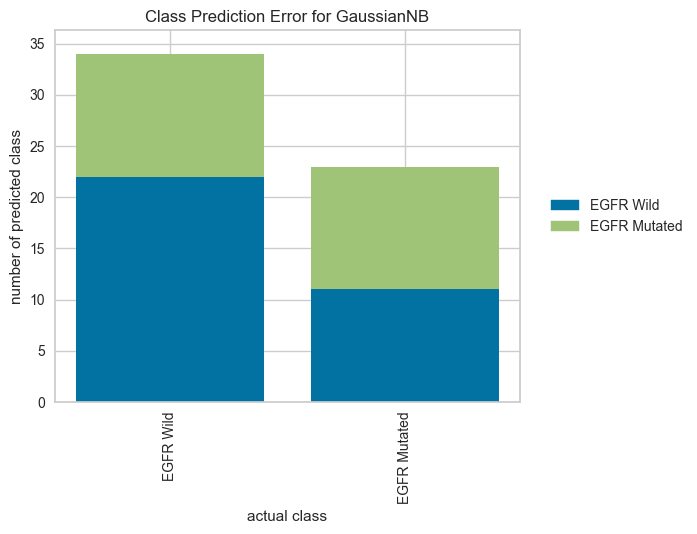

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


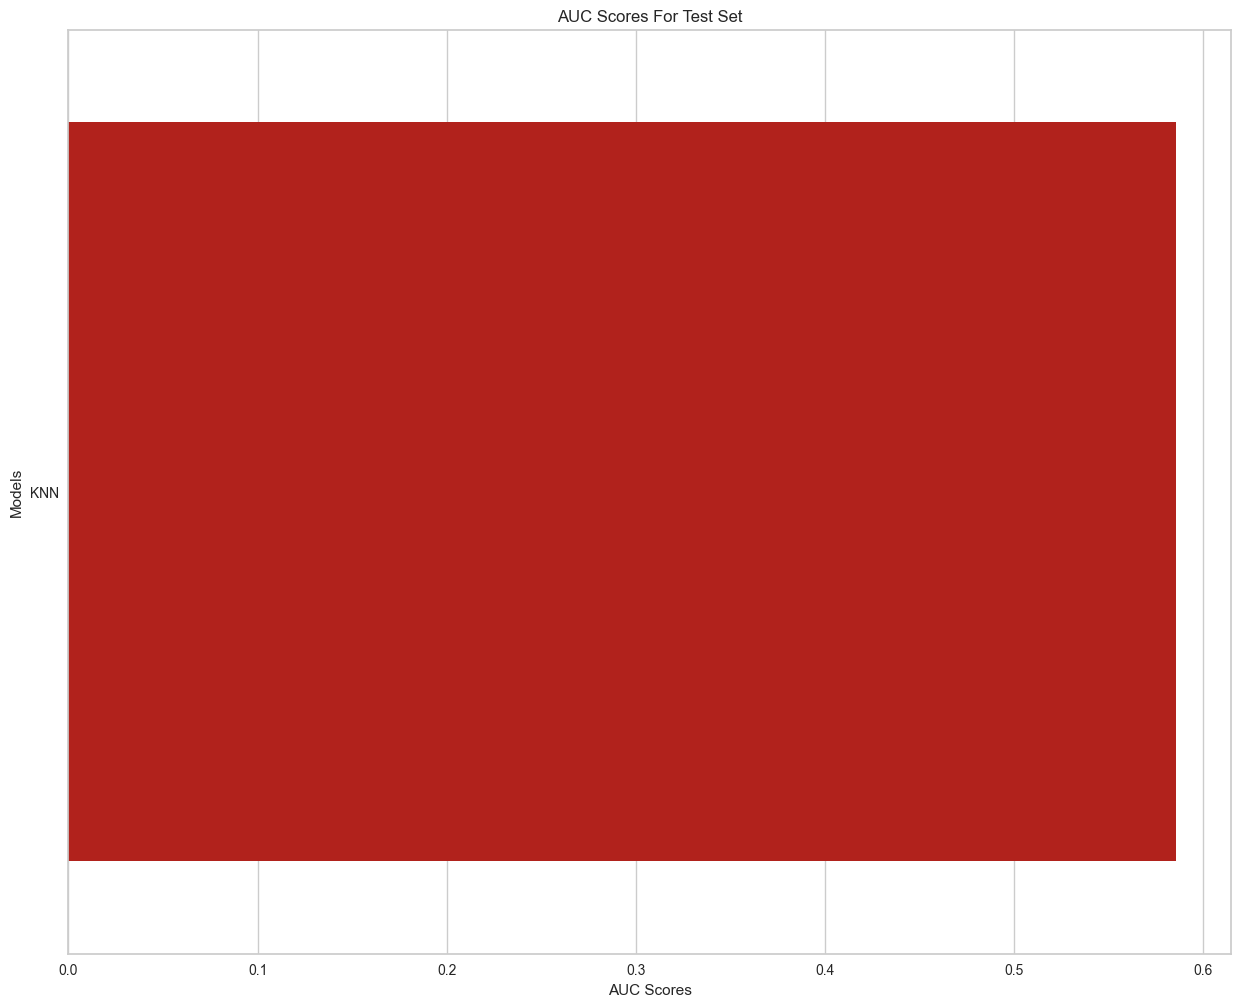

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

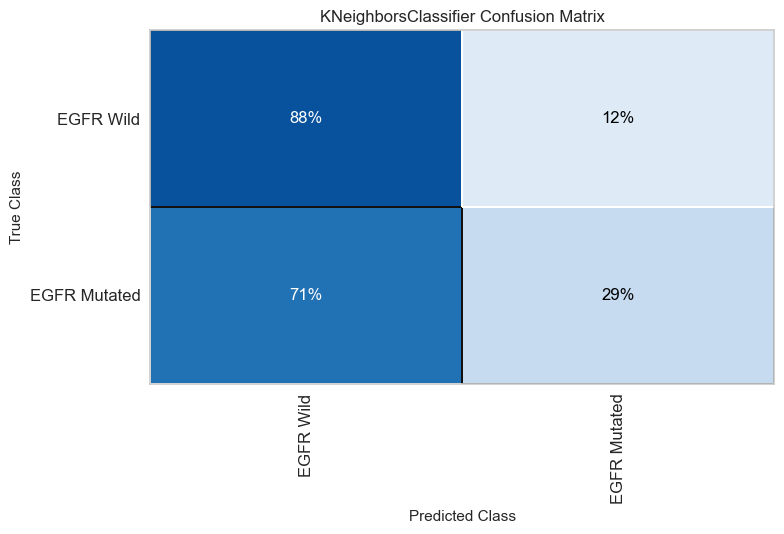

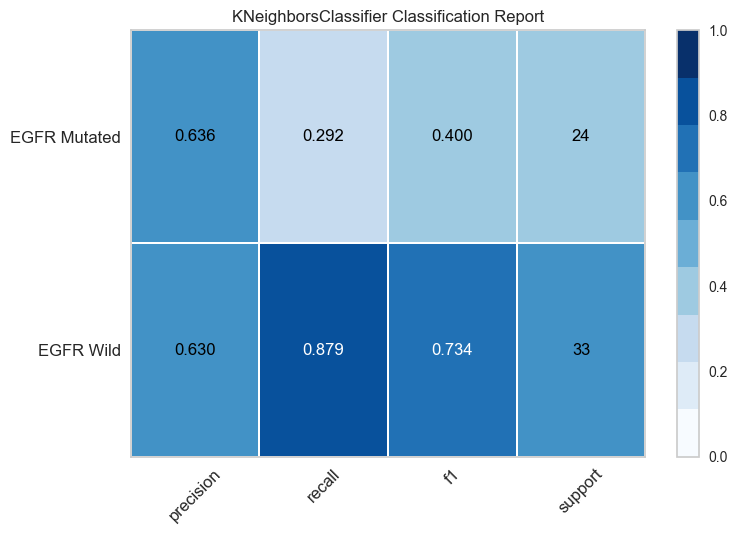

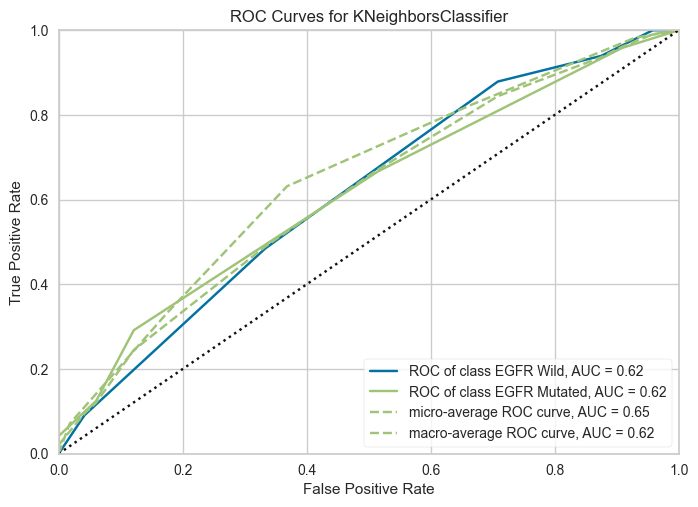

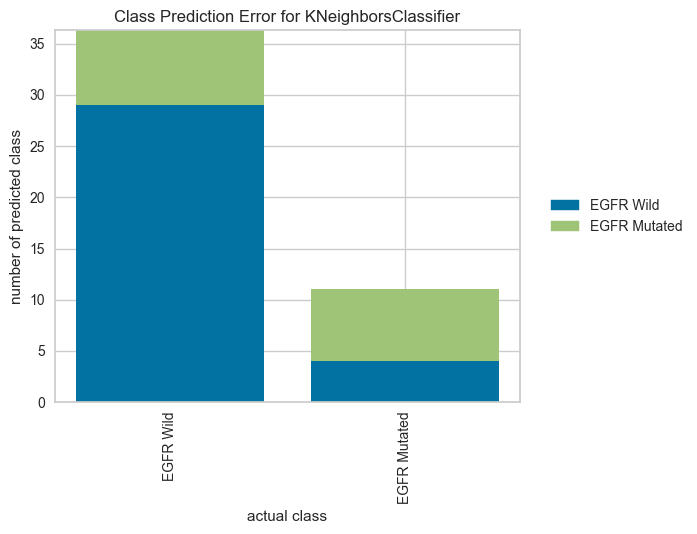

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


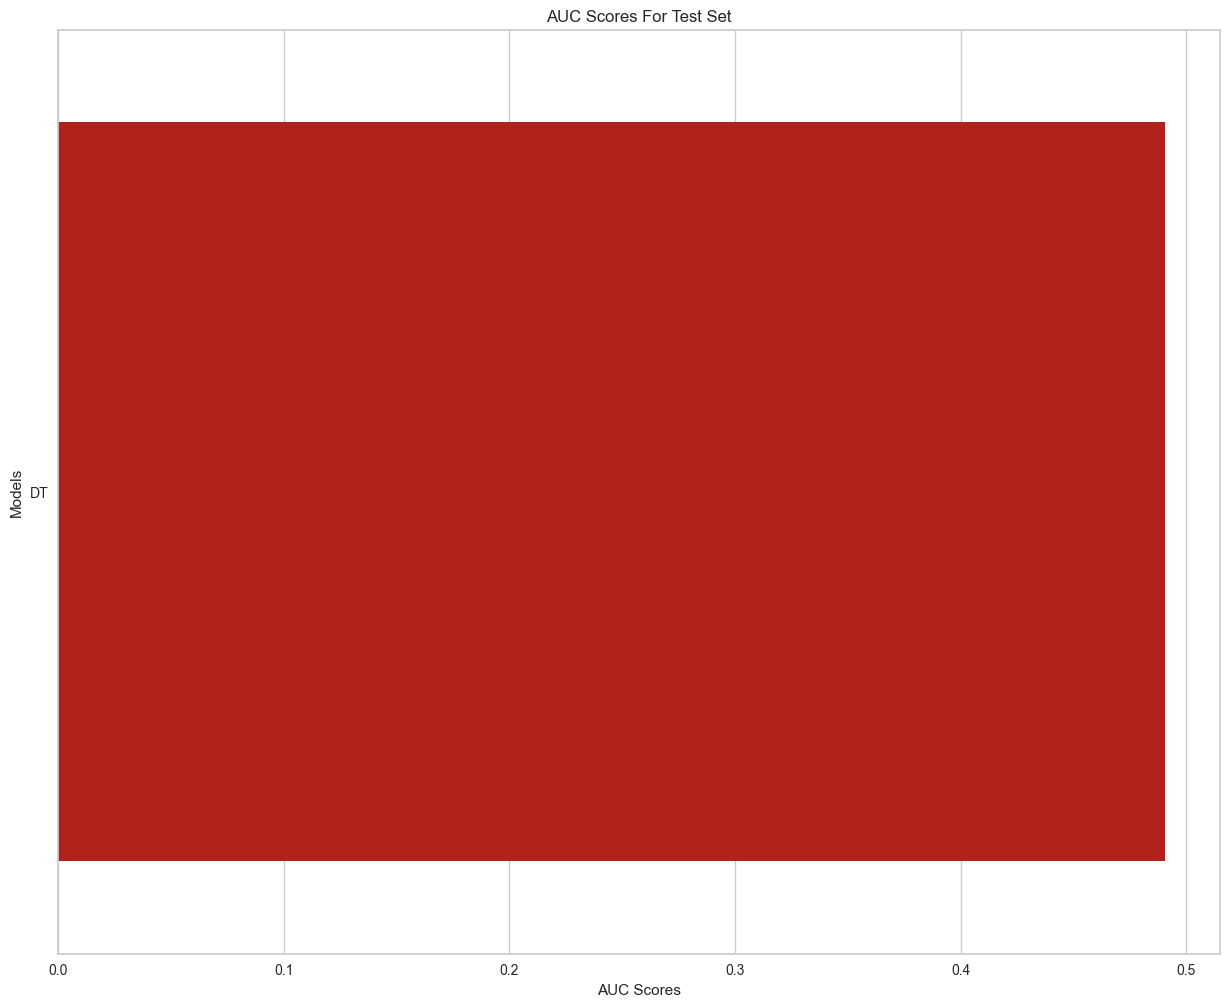

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

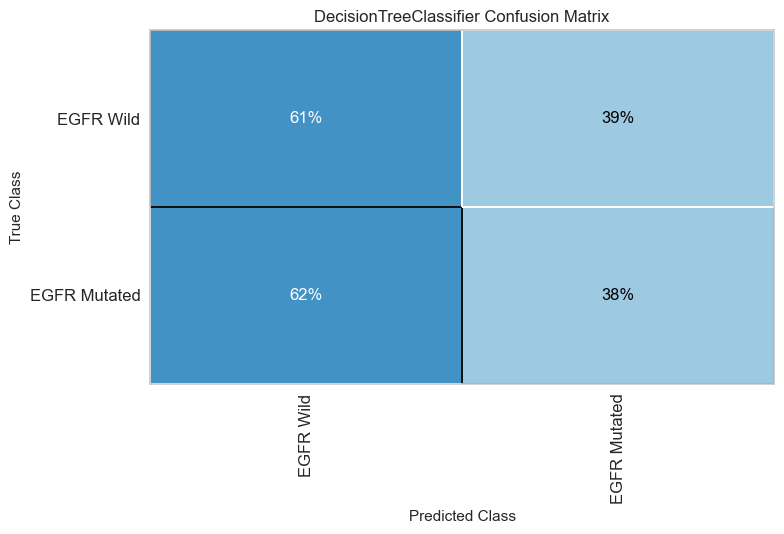

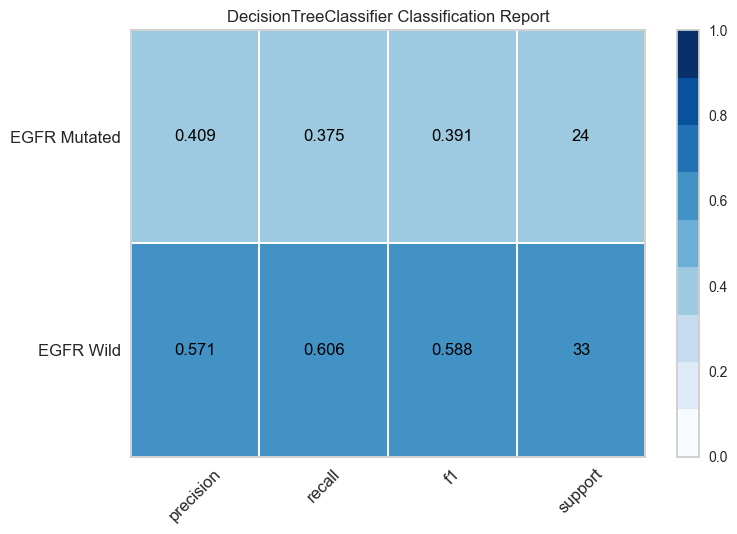

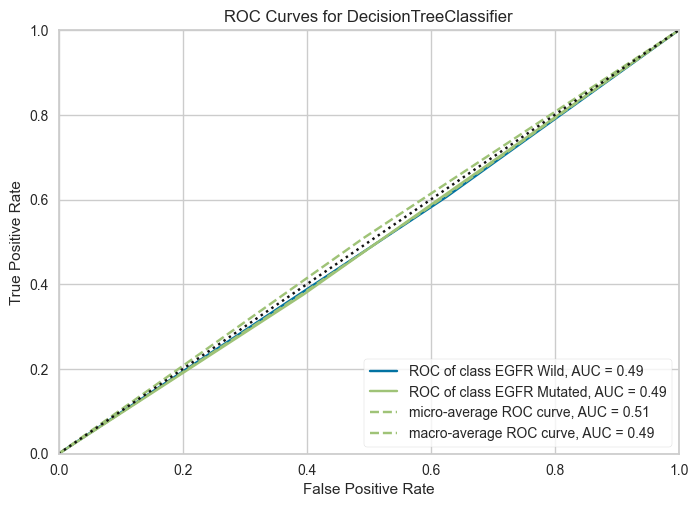

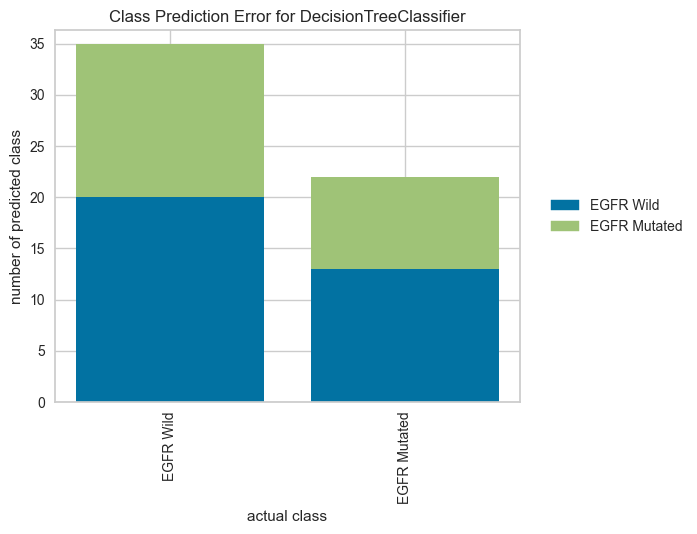

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


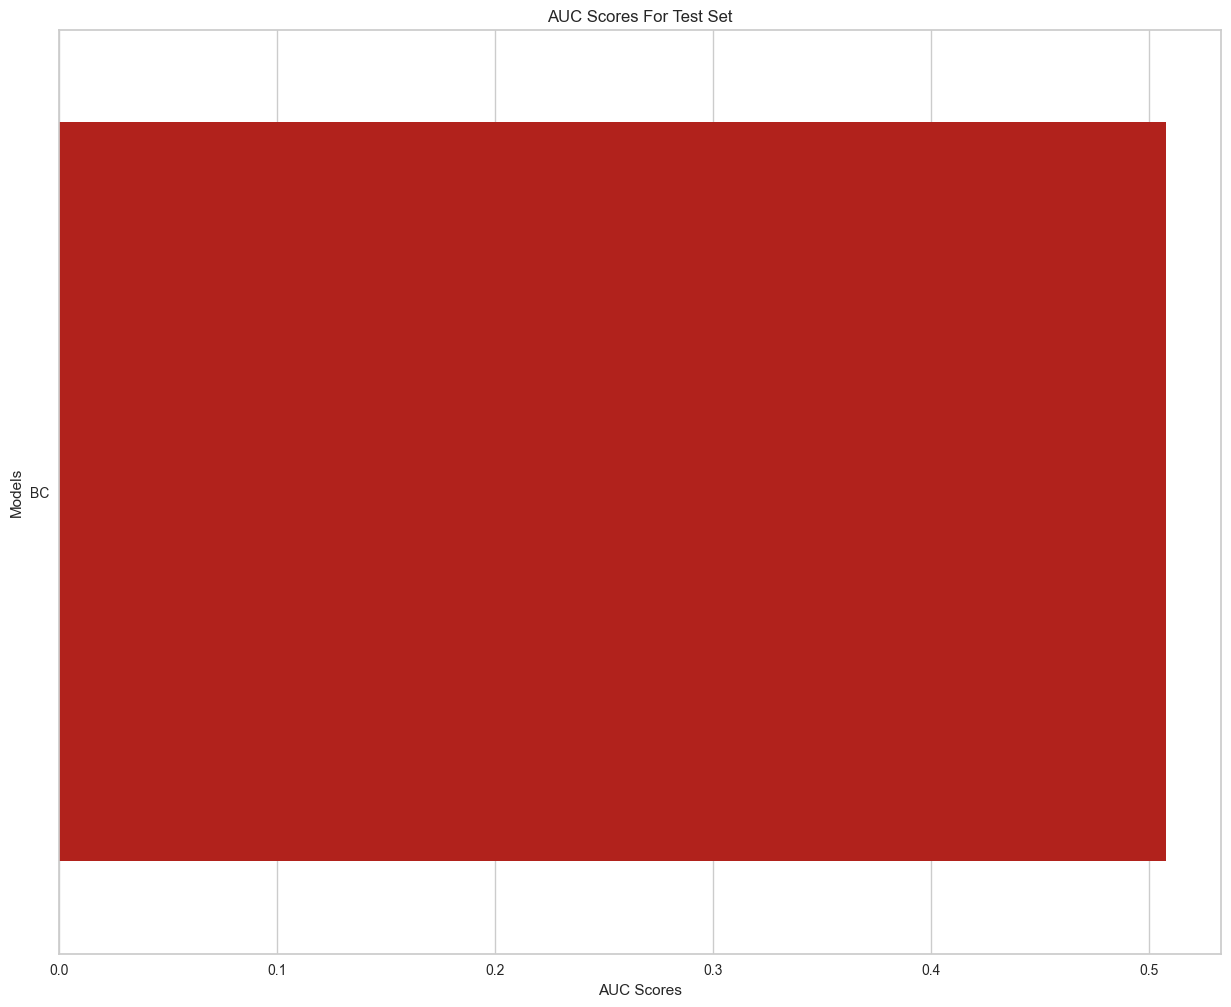

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

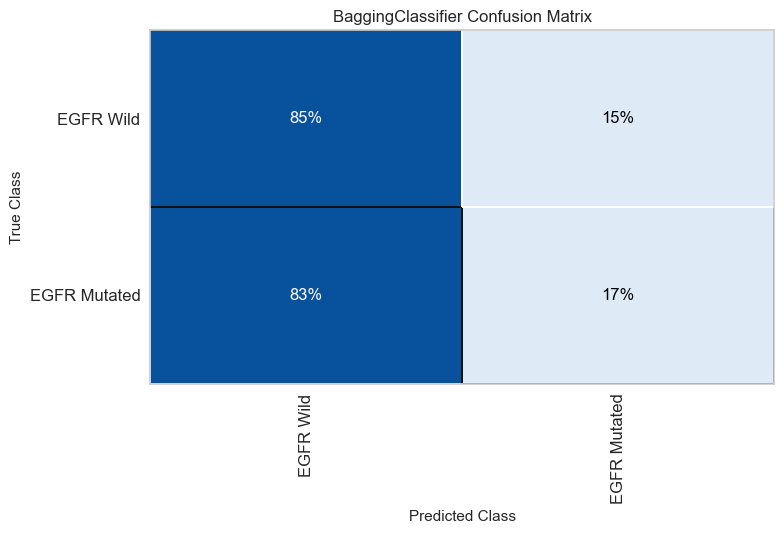

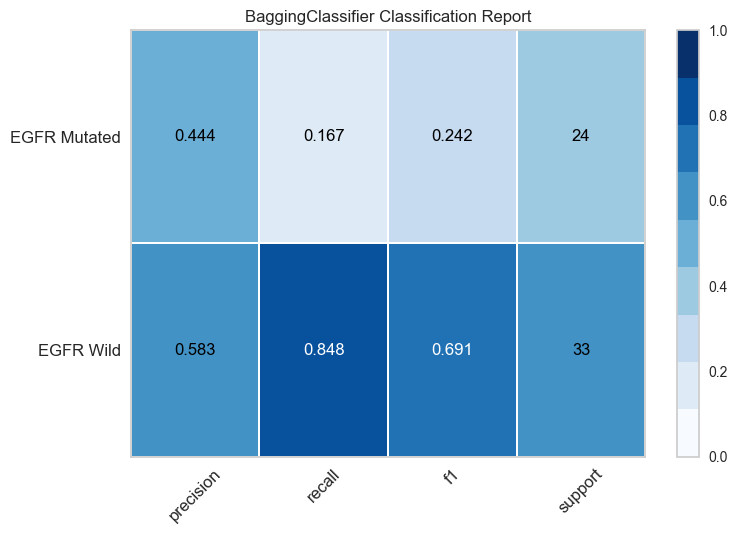

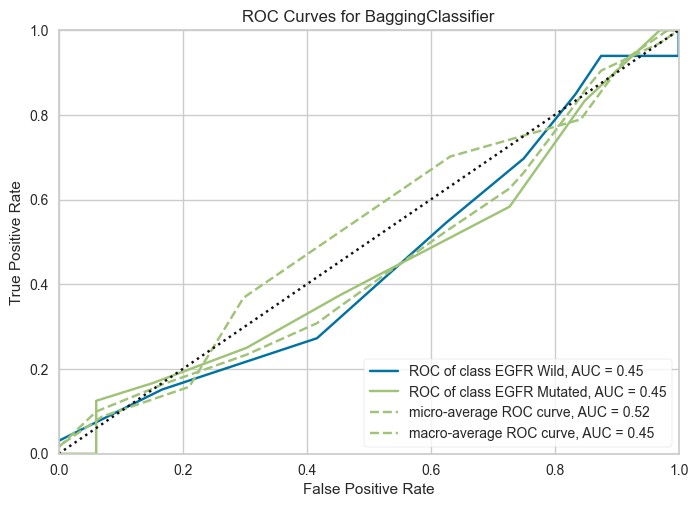

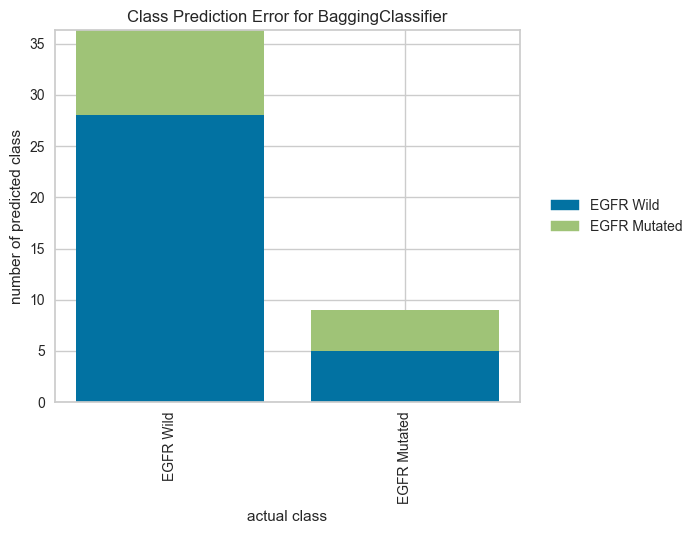

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


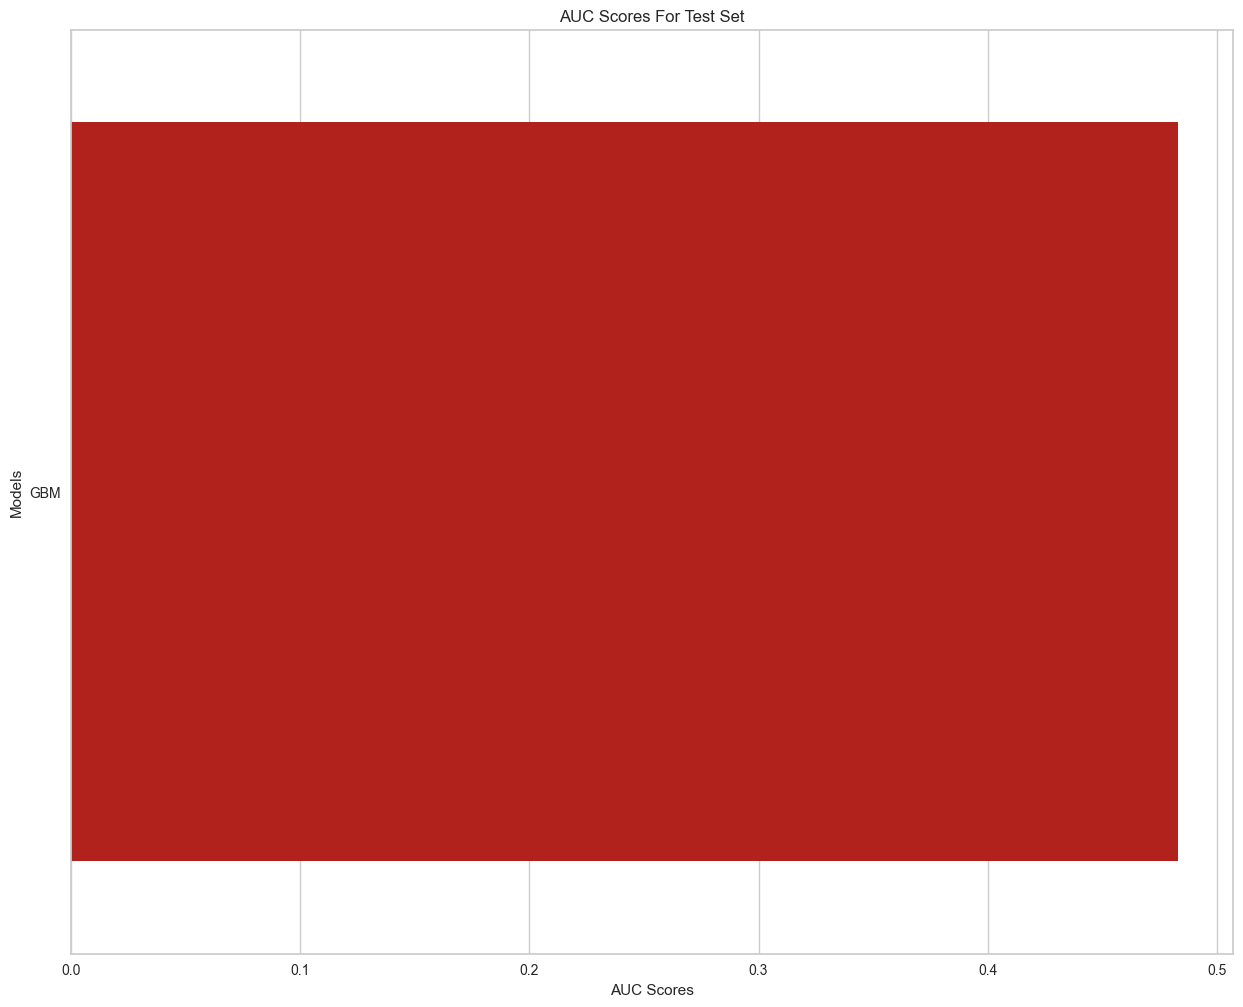

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [129]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


{'C': 0.001, 'penalty': 'l2'}

In [130]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.5

In [131]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-SVM', Save_format = 'csv',Save_type = 'col')

In [132]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-SVM.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.58      1.00      0.74        38
EGFR Mutated       0.00      0.00      0.00        27

    accuracy                           0.58        65
   macro avg       0.29      0.50      0.37        65
weighted avg       0.34      0.58      0.43        65

precision 0.0 accuracy 0.5846153846153846 recall 0.0 auc 0.5


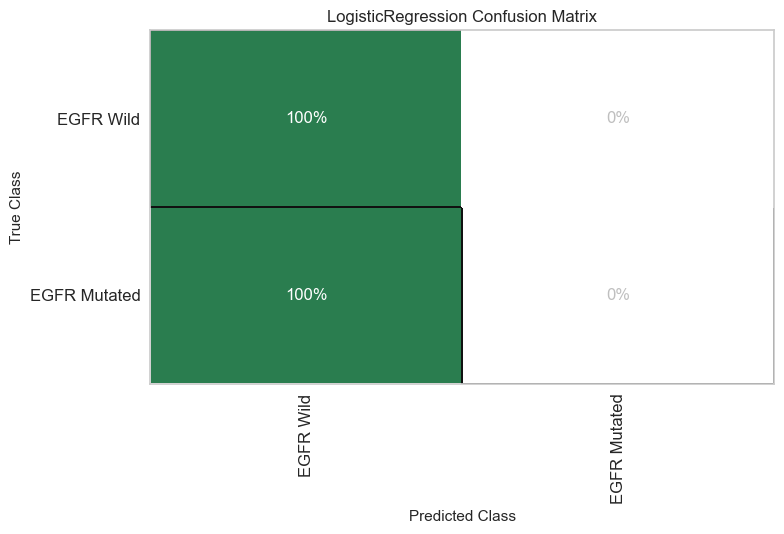

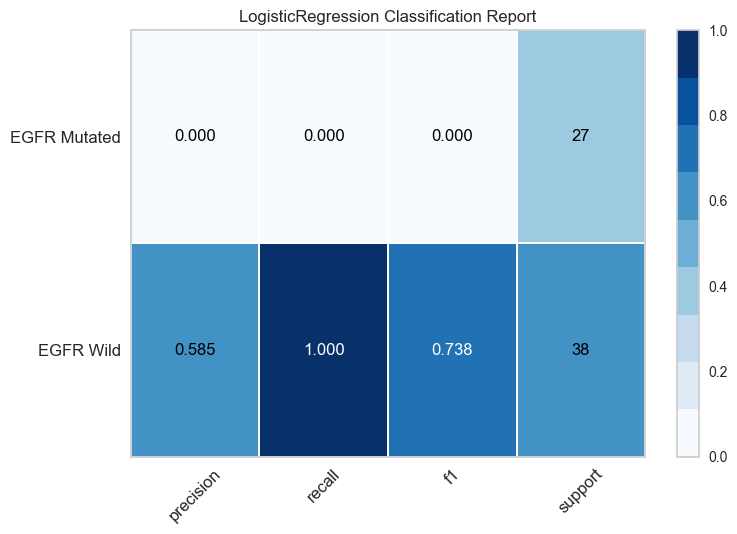

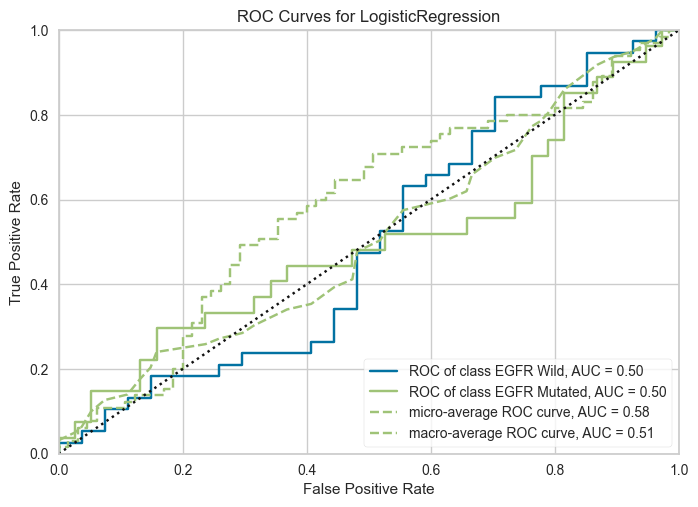

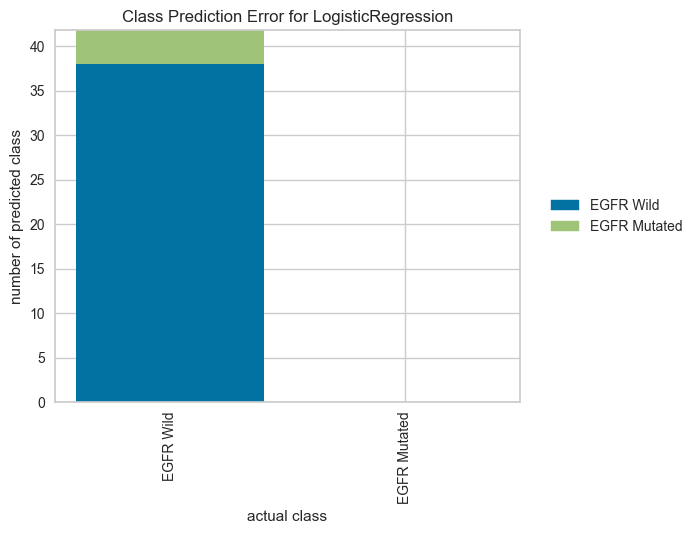

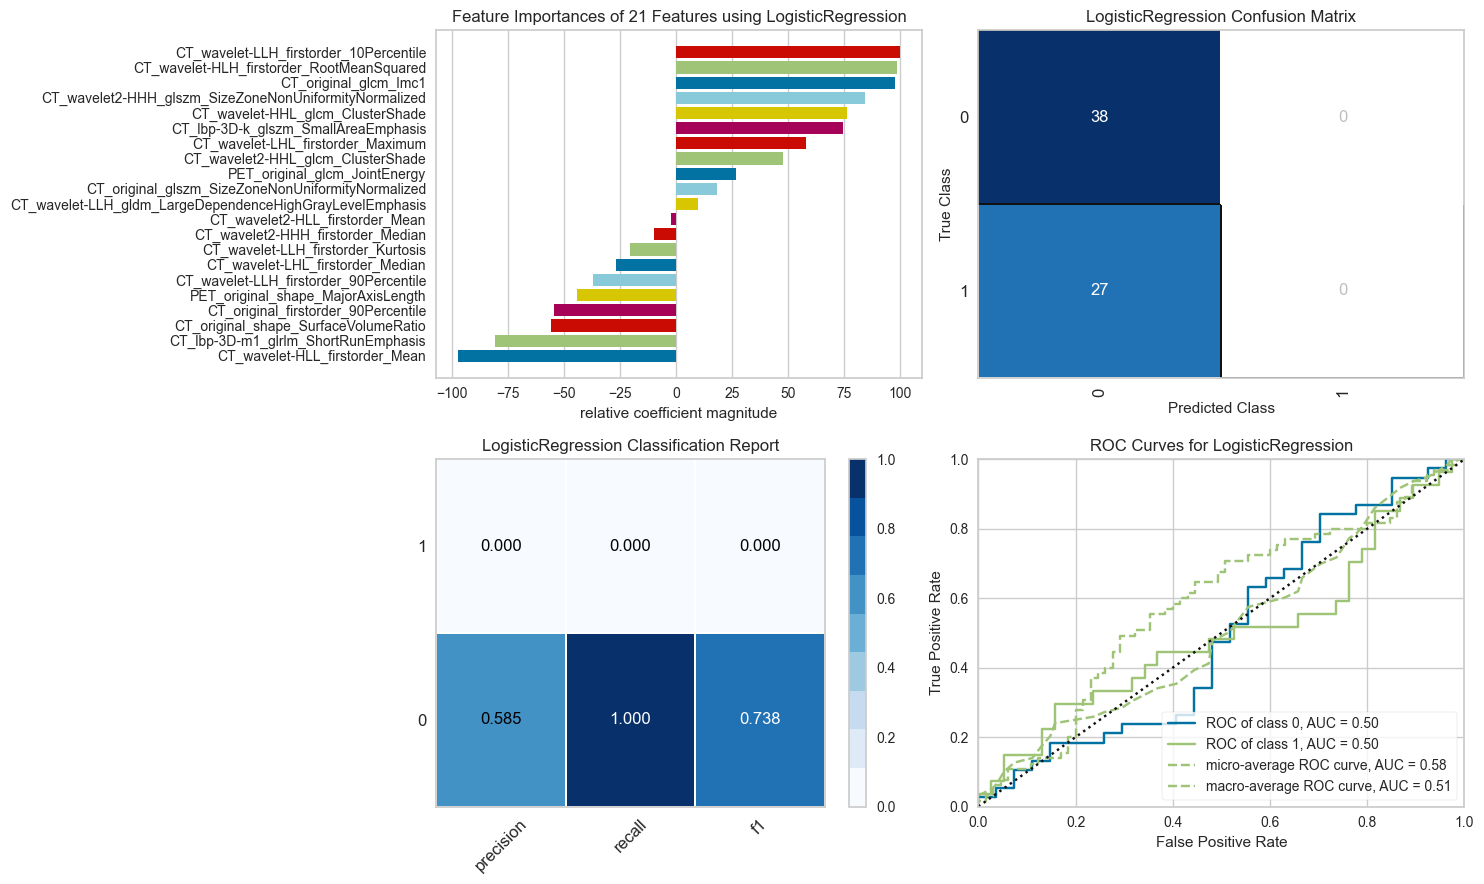

NameError: name 'X' is not defined

In [134]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [135]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': None, 'min_samples_split': 8, 'n_estimators': 1000}

In [136]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': None, 'min_samples_split': 8, 'n_estimators': 1000}

In [137]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.6252436647173489

In [138]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM-RF73', Save_format = 'csv',Save_type = 'col')

In [139]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.69      0.66      0.68        38
EGFR Mutated       0.55      0.59      0.57        27

    accuracy                           0.63        65
   macro avg       0.62      0.63      0.62        65
weighted avg       0.64      0.63      0.63        65

precision 0.5517241379310345 accuracy 0.6307692307692307 recall 0.5925925925925926 auc 0.6252436647173489


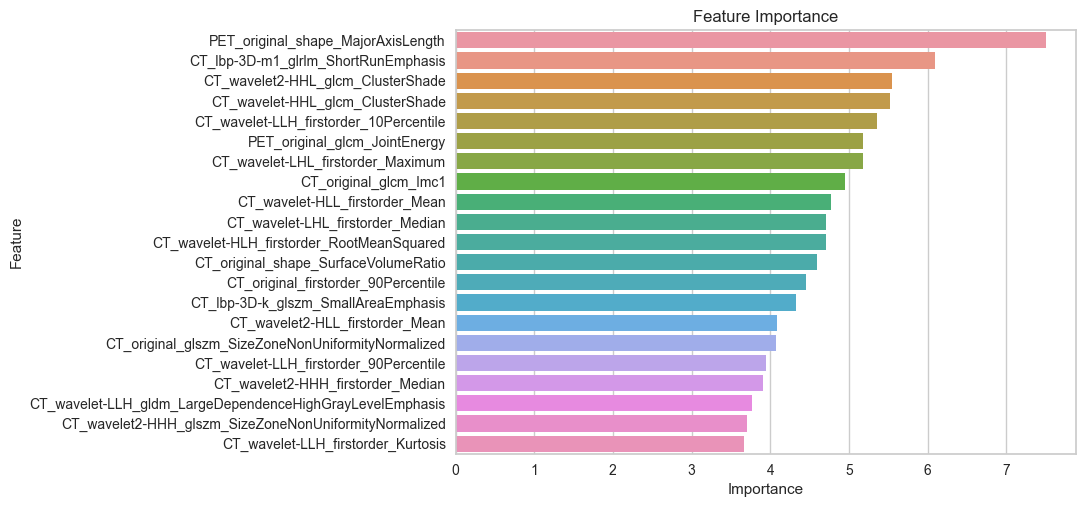

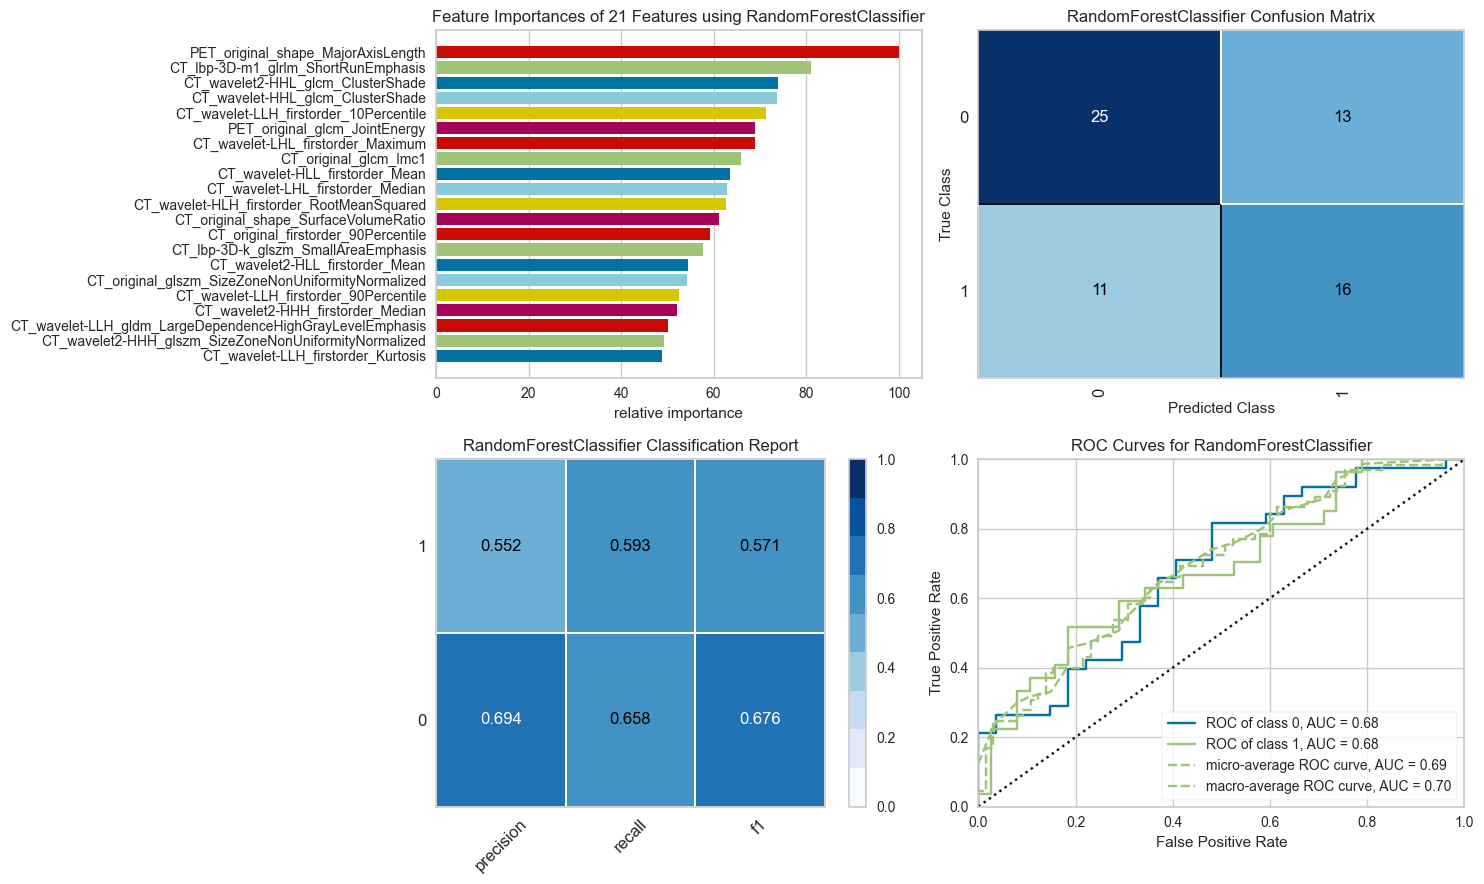

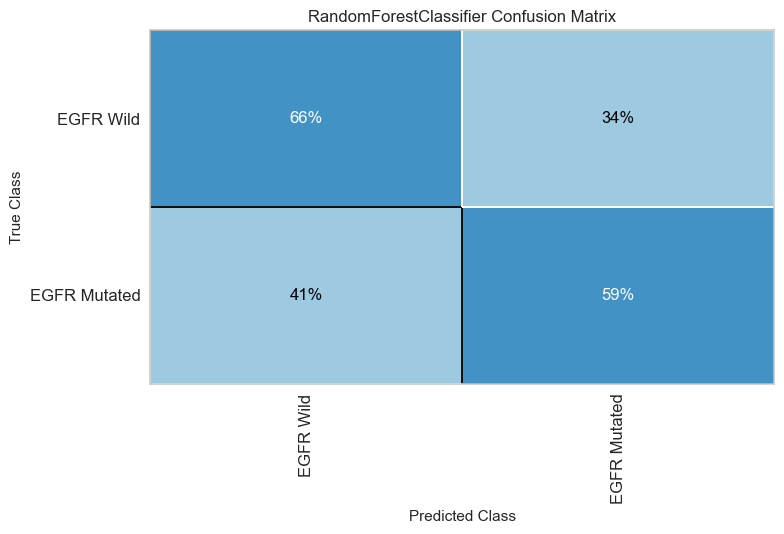

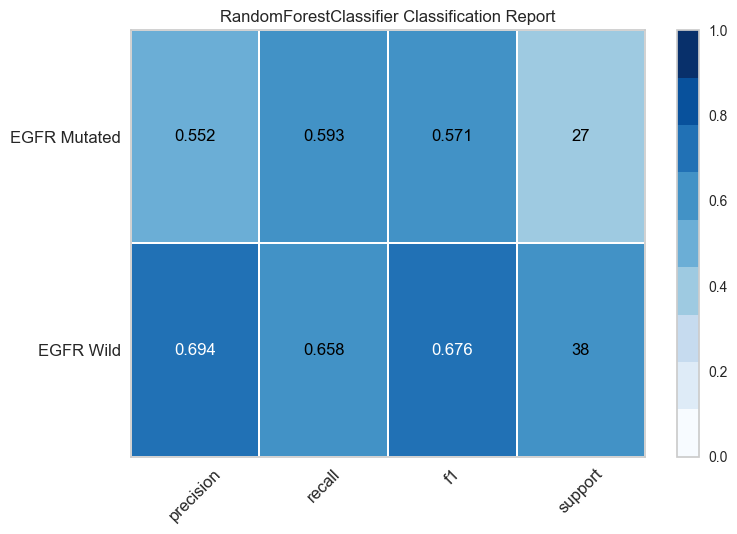

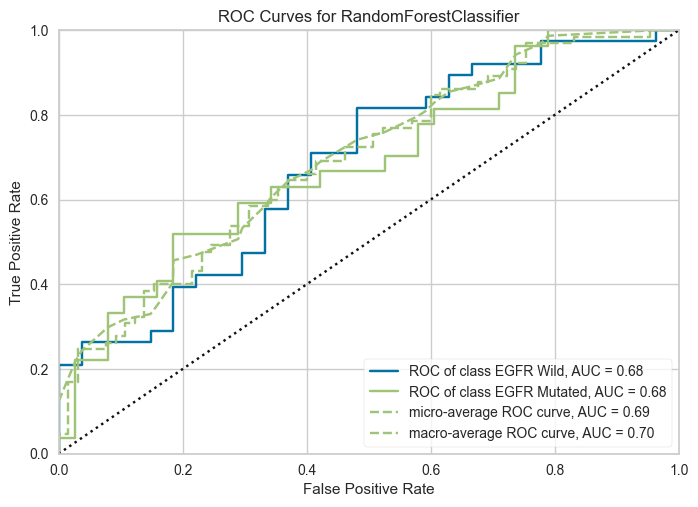

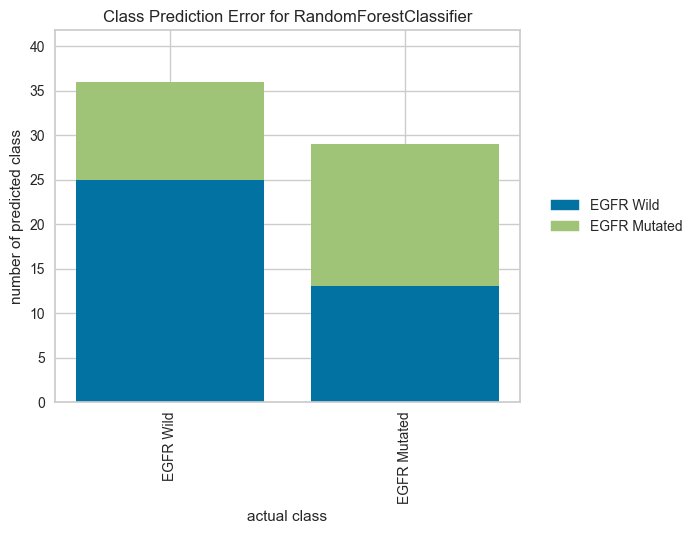

NameError: name 'X' is not defined

In [140]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [193]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 504 candidates, totalling 5040 fits
0:	learn: 0.6816805	total: 19.7ms	remaining: 39.3s
1:	learn: 0.6746285	total: 22.7ms	remaining: 22.7s
2:	learn: 0.6662474	total: 25.6ms	remaining: 17s
3:	learn: 0.6570727	total: 28.6ms	remaining: 14.3s
4:	learn: 0.6491690	total: 31.7ms	remaining: 12.6s
5:	learn: 0.6363336	total: 34.7ms	remaining: 11.5s
6:	learn: 0.6272549	total: 37.4ms	remaining: 10.7s
7:	learn: 0.6203734	total: 40.1ms	remaining: 9.99s
8:	learn: 0.6123419	total: 42.8ms	remaining: 9.47s
9:	learn: 0.6085824	total: 46.1ms	remaining: 9.17s
10:	learn: 0.6015986	total: 48.8ms	remaining: 8.82s
11:	learn: 0.5945814	total: 51.6ms	remaining: 8.55s
12:	learn: 0.5857630	total: 54.1ms	remaining: 8.27s
13:	learn: 0.5789655	total: 56.5ms	remaining: 8.02s
14:	learn: 0.5751342	total: 59.1ms	remaining: 7.82s
15:	learn: 0.5679412	total: 61.7ms	remaining: 7.65s
16:	learn: 0.5634449	total: 64.4ms	remaining: 7.51s
17:	learn: 0.5578041	total: 67.1ms	remaining: 7.39s
18:	learn: 

181:	learn: 0.1711551	total: 545ms	remaining: 5.44s
182:	learn: 0.1703750	total: 548ms	remaining: 5.44s
183:	learn: 0.1693854	total: 551ms	remaining: 5.44s
184:	learn: 0.1680202	total: 554ms	remaining: 5.43s
185:	learn: 0.1670375	total: 557ms	remaining: 5.43s
186:	learn: 0.1657250	total: 561ms	remaining: 5.43s
187:	learn: 0.1642824	total: 564ms	remaining: 5.43s
188:	learn: 0.1631090	total: 567ms	remaining: 5.43s
189:	learn: 0.1622368	total: 569ms	remaining: 5.42s
190:	learn: 0.1610786	total: 572ms	remaining: 5.42s
191:	learn: 0.1600361	total: 575ms	remaining: 5.41s
192:	learn: 0.1585387	total: 578ms	remaining: 5.41s
193:	learn: 0.1574769	total: 580ms	remaining: 5.4s
194:	learn: 0.1564781	total: 583ms	remaining: 5.39s
195:	learn: 0.1554732	total: 585ms	remaining: 5.39s
196:	learn: 0.1539597	total: 588ms	remaining: 5.38s
197:	learn: 0.1533407	total: 591ms	remaining: 5.38s
198:	learn: 0.1524693	total: 594ms	remaining: 5.38s
199:	learn: 0.1513763	total: 597ms	remaining: 5.37s
200:	learn: 0

364:	learn: 0.0516770	total: 1.07s	remaining: 4.82s
365:	learn: 0.0513275	total: 1.08s	remaining: 4.81s
366:	learn: 0.0510478	total: 1.08s	remaining: 4.81s
367:	learn: 0.0508225	total: 1.08s	remaining: 4.8s
368:	learn: 0.0505016	total: 1.09s	remaining: 4.8s
369:	learn: 0.0502227	total: 1.09s	remaining: 4.8s
370:	learn: 0.0499679	total: 1.09s	remaining: 4.79s
371:	learn: 0.0497410	total: 1.09s	remaining: 4.79s
372:	learn: 0.0494632	total: 1.1s	remaining: 4.79s
373:	learn: 0.0492949	total: 1.1s	remaining: 4.78s
374:	learn: 0.0490350	total: 1.1s	remaining: 4.78s
375:	learn: 0.0487868	total: 1.1s	remaining: 4.77s
376:	learn: 0.0485606	total: 1.11s	remaining: 4.77s
377:	learn: 0.0483279	total: 1.11s	remaining: 4.77s
378:	learn: 0.0480228	total: 1.11s	remaining: 4.76s
379:	learn: 0.0476123	total: 1.12s	remaining: 4.76s
380:	learn: 0.0474142	total: 1.12s	remaining: 4.75s
381:	learn: 0.0471956	total: 1.12s	remaining: 4.75s
382:	learn: 0.0469133	total: 1.12s	remaining: 4.75s
383:	learn: 0.04680

558:	learn: 0.0229507	total: 1.61s	remaining: 4.15s
559:	learn: 0.0228822	total: 1.61s	remaining: 4.14s
560:	learn: 0.0227939	total: 1.61s	remaining: 4.14s
561:	learn: 0.0227233	total: 1.62s	remaining: 4.14s
562:	learn: 0.0226769	total: 1.62s	remaining: 4.13s
563:	learn: 0.0225994	total: 1.62s	remaining: 4.13s
564:	learn: 0.0225215	total: 1.63s	remaining: 4.13s
565:	learn: 0.0224186	total: 1.63s	remaining: 4.12s
566:	learn: 0.0223652	total: 1.63s	remaining: 4.12s
567:	learn: 0.0223192	total: 1.63s	remaining: 4.12s
568:	learn: 0.0222553	total: 1.64s	remaining: 4.11s
569:	learn: 0.0221934	total: 1.64s	remaining: 4.11s
570:	learn: 0.0220886	total: 1.64s	remaining: 4.11s
571:	learn: 0.0220256	total: 1.64s	remaining: 4.1s
572:	learn: 0.0219373	total: 1.65s	remaining: 4.1s
573:	learn: 0.0218735	total: 1.65s	remaining: 4.1s
574:	learn: 0.0217800	total: 1.65s	remaining: 4.09s
575:	learn: 0.0217084	total: 1.65s	remaining: 4.09s
576:	learn: 0.0216147	total: 1.66s	remaining: 4.09s
577:	learn: 0.0

742:	learn: 0.0137340	total: 2.14s	remaining: 3.63s
743:	learn: 0.0136971	total: 2.15s	remaining: 3.62s
744:	learn: 0.0136788	total: 2.15s	remaining: 3.62s
745:	learn: 0.0136379	total: 2.15s	remaining: 3.62s
746:	learn: 0.0135979	total: 2.15s	remaining: 3.61s
747:	learn: 0.0135643	total: 2.16s	remaining: 3.61s
748:	learn: 0.0135330	total: 2.16s	remaining: 3.61s
749:	learn: 0.0135111	total: 2.16s	remaining: 3.6s
750:	learn: 0.0134650	total: 2.17s	remaining: 3.6s
751:	learn: 0.0134454	total: 2.17s	remaining: 3.6s
752:	learn: 0.0134275	total: 2.17s	remaining: 3.6s
753:	learn: 0.0134059	total: 2.17s	remaining: 3.59s
754:	learn: 0.0133802	total: 2.18s	remaining: 3.59s
755:	learn: 0.0133371	total: 2.18s	remaining: 3.59s
756:	learn: 0.0133044	total: 2.18s	remaining: 3.58s
757:	learn: 0.0132760	total: 2.19s	remaining: 3.58s
758:	learn: 0.0132549	total: 2.19s	remaining: 3.58s
759:	learn: 0.0132326	total: 2.19s	remaining: 3.58s
760:	learn: 0.0131974	total: 2.19s	remaining: 3.57s
761:	learn: 0.01

911:	learn: 0.0097689	total: 2.68s	remaining: 3.19s
912:	learn: 0.0097469	total: 2.68s	remaining: 3.19s
913:	learn: 0.0097331	total: 2.68s	remaining: 3.19s
914:	learn: 0.0097175	total: 2.69s	remaining: 3.18s
915:	learn: 0.0096972	total: 2.69s	remaining: 3.18s
916:	learn: 0.0096818	total: 2.69s	remaining: 3.18s
917:	learn: 0.0096693	total: 2.69s	remaining: 3.17s
918:	learn: 0.0096500	total: 2.7s	remaining: 3.17s
919:	learn: 0.0096257	total: 2.7s	remaining: 3.17s
920:	learn: 0.0096042	total: 2.7s	remaining: 3.17s
921:	learn: 0.0095928	total: 2.7s	remaining: 3.16s
922:	learn: 0.0095823	total: 2.71s	remaining: 3.16s
923:	learn: 0.0095593	total: 2.71s	remaining: 3.15s
924:	learn: 0.0095491	total: 2.71s	remaining: 3.15s
925:	learn: 0.0095335	total: 2.71s	remaining: 3.15s
926:	learn: 0.0095220	total: 2.72s	remaining: 3.15s
927:	learn: 0.0095089	total: 2.72s	remaining: 3.14s
928:	learn: 0.0094917	total: 2.72s	remaining: 3.14s
929:	learn: 0.0094757	total: 2.73s	remaining: 3.14s
930:	learn: 0.00

1104:	learn: 0.0072217	total: 3.21s	remaining: 2.6s
1105:	learn: 0.0072102	total: 3.21s	remaining: 2.6s
1106:	learn: 0.0071974	total: 3.21s	remaining: 2.59s
1107:	learn: 0.0071886	total: 3.22s	remaining: 2.59s
1108:	learn: 0.0071795	total: 3.22s	remaining: 2.59s
1109:	learn: 0.0071708	total: 3.22s	remaining: 2.58s
1110:	learn: 0.0071612	total: 3.23s	remaining: 2.58s
1111:	learn: 0.0071512	total: 3.23s	remaining: 2.58s
1112:	learn: 0.0071433	total: 3.23s	remaining: 2.58s
1113:	learn: 0.0071301	total: 3.23s	remaining: 2.57s
1114:	learn: 0.0071244	total: 3.24s	remaining: 2.57s
1115:	learn: 0.0071181	total: 3.24s	remaining: 2.57s
1116:	learn: 0.0071079	total: 3.24s	remaining: 2.56s
1117:	learn: 0.0070973	total: 3.25s	remaining: 2.56s
1118:	learn: 0.0070886	total: 3.25s	remaining: 2.56s
1119:	learn: 0.0070788	total: 3.25s	remaining: 2.55s
1120:	learn: 0.0070696	total: 3.25s	remaining: 2.55s
1121:	learn: 0.0070598	total: 3.26s	remaining: 2.55s
1122:	learn: 0.0070498	total: 3.26s	remaining: 2

1299:	learn: 0.0056698	total: 3.74s	remaining: 2.01s
1300:	learn: 0.0056631	total: 3.75s	remaining: 2.01s
1301:	learn: 0.0056576	total: 3.75s	remaining: 2.01s
1302:	learn: 0.0056520	total: 3.75s	remaining: 2.01s
1303:	learn: 0.0056445	total: 3.75s	remaining: 2s
1304:	learn: 0.0056381	total: 3.76s	remaining: 2s
1305:	learn: 0.0056297	total: 3.76s	remaining: 2s
1306:	learn: 0.0056214	total: 3.76s	remaining: 2s
1307:	learn: 0.0056157	total: 3.77s	remaining: 1.99s
1308:	learn: 0.0056106	total: 3.77s	remaining: 1.99s
1309:	learn: 0.0056070	total: 3.77s	remaining: 1.99s
1310:	learn: 0.0056002	total: 3.78s	remaining: 1.98s
1311:	learn: 0.0055924	total: 3.78s	remaining: 1.98s
1312:	learn: 0.0055875	total: 3.78s	remaining: 1.98s
1313:	learn: 0.0055803	total: 3.78s	remaining: 1.98s
1314:	learn: 0.0055697	total: 3.79s	remaining: 1.97s
1315:	learn: 0.0055640	total: 3.79s	remaining: 1.97s
1316:	learn: 0.0055587	total: 3.79s	remaining: 1.97s
1317:	learn: 0.0055507	total: 3.79s	remaining: 1.96s
1318:

1490:	learn: 0.0046533	total: 4.28s	remaining: 1.46s
1491:	learn: 0.0046482	total: 4.28s	remaining: 1.46s
1492:	learn: 0.0046428	total: 4.28s	remaining: 1.45s
1493:	learn: 0.0046379	total: 4.29s	remaining: 1.45s
1494:	learn: 0.0046349	total: 4.29s	remaining: 1.45s
1495:	learn: 0.0046324	total: 4.29s	remaining: 1.45s
1496:	learn: 0.0046280	total: 4.3s	remaining: 1.44s
1497:	learn: 0.0046235	total: 4.3s	remaining: 1.44s
1498:	learn: 0.0046177	total: 4.3s	remaining: 1.44s
1499:	learn: 0.0046105	total: 4.3s	remaining: 1.43s
1500:	learn: 0.0046043	total: 4.31s	remaining: 1.43s
1501:	learn: 0.0045990	total: 4.31s	remaining: 1.43s
1502:	learn: 0.0045947	total: 4.31s	remaining: 1.43s
1503:	learn: 0.0045921	total: 4.32s	remaining: 1.42s
1504:	learn: 0.0045895	total: 4.32s	remaining: 1.42s
1505:	learn: 0.0045853	total: 4.32s	remaining: 1.42s
1506:	learn: 0.0045788	total: 4.32s	remaining: 1.41s
1507:	learn: 0.0045754	total: 4.33s	remaining: 1.41s
1508:	learn: 0.0045716	total: 4.33s	remaining: 1.4

1679:	learn: 0.0039520	total: 4.8s	remaining: 915ms
1680:	learn: 0.0039486	total: 4.8s	remaining: 912ms
1681:	learn: 0.0039467	total: 4.81s	remaining: 909ms
1682:	learn: 0.0039434	total: 4.81s	remaining: 906ms
1683:	learn: 0.0039393	total: 4.81s	remaining: 903ms
1684:	learn: 0.0039363	total: 4.82s	remaining: 900ms
1685:	learn: 0.0039349	total: 4.82s	remaining: 897ms
1686:	learn: 0.0039312	total: 4.82s	remaining: 895ms
1687:	learn: 0.0039279	total: 4.82s	remaining: 892ms
1688:	learn: 0.0039262	total: 4.83s	remaining: 889ms
1689:	learn: 0.0039222	total: 4.83s	remaining: 886ms
1690:	learn: 0.0039188	total: 4.83s	remaining: 883ms
1691:	learn: 0.0039138	total: 4.83s	remaining: 880ms
1692:	learn: 0.0039103	total: 4.84s	remaining: 877ms
1693:	learn: 0.0039077	total: 4.84s	remaining: 875ms
1694:	learn: 0.0039041	total: 4.84s	remaining: 872ms
1695:	learn: 0.0038996	total: 4.85s	remaining: 869ms
1696:	learn: 0.0038957	total: 4.85s	remaining: 866ms
1697:	learn: 0.0038911	total: 4.86s	remaining: 8

1837:	learn: 0.0035029	total: 5.33s	remaining: 470ms
1838:	learn: 0.0034995	total: 5.34s	remaining: 467ms
1839:	learn: 0.0034972	total: 5.34s	remaining: 464ms
1840:	learn: 0.0034957	total: 5.34s	remaining: 462ms
1841:	learn: 0.0034935	total: 5.35s	remaining: 459ms
1842:	learn: 0.0034913	total: 5.35s	remaining: 456ms
1843:	learn: 0.0034888	total: 5.35s	remaining: 453ms
1844:	learn: 0.0034861	total: 5.36s	remaining: 450ms
1845:	learn: 0.0034826	total: 5.36s	remaining: 447ms
1846:	learn: 0.0034808	total: 5.36s	remaining: 444ms
1847:	learn: 0.0034776	total: 5.37s	remaining: 441ms
1848:	learn: 0.0034760	total: 5.37s	remaining: 439ms
1849:	learn: 0.0034741	total: 5.37s	remaining: 436ms
1850:	learn: 0.0034729	total: 5.38s	remaining: 433ms
1851:	learn: 0.0034702	total: 5.38s	remaining: 430ms
1852:	learn: 0.0034668	total: 5.38s	remaining: 427ms
1853:	learn: 0.0034653	total: 5.39s	remaining: 424ms
1854:	learn: 0.0034608	total: 5.39s	remaining: 421ms
1855:	learn: 0.0034581	total: 5.39s	remaining:

{'early_stopping_rounds': 2000,
 'iterations': 2000,
 'learning_rate': 0.03,
 'max_depth': 6}

In [194]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6816805	total: 14.6ms	remaining: 29.2s
1:	learn: 0.6746285	total: 17.5ms	remaining: 17.5s
2:	learn: 0.6662474	total: 19.5ms	remaining: 13s
3:	learn: 0.6570727	total: 21.2ms	remaining: 10.6s
4:	learn: 0.6491690	total: 22.9ms	remaining: 9.14s
5:	learn: 0.6363336	total: 24.5ms	remaining: 8.13s
6:	learn: 0.6272549	total: 26.1ms	remaining: 7.43s
7:	learn: 0.6203734	total: 27.9ms	remaining: 6.94s
8:	learn: 0.6123419	total: 29.7ms	remaining: 6.56s
9:	learn: 0.6085824	total: 31.3ms	remaining: 6.22s
10:	learn: 0.6015986	total: 33ms	remaining: 5.96s
11:	learn: 0.5945814	total: 34.9ms	remaining: 5.78s
12:	learn: 0.5857630	total: 36.6ms	remaining: 5.6s
13:	learn: 0.5789655	total: 38.1ms	remaining: 5.41s
14:	learn: 0.5751342	total: 39.5ms	remaining: 5.23s
15:	learn: 0.5679412	total: 41.1ms	remaining: 5.1s
16:	learn: 0.5634449	total: 43.2ms	remaining: 5.04s
17:	learn: 0.5578041	total: 44.9ms	remaining: 4.94s
18:	learn: 0.5522347	total: 46.4ms	remaining: 4.84s
19:	learn: 0.5466247	total: 

225:	learn: 0.1265652	total: 360ms	remaining: 2.83s
226:	learn: 0.1259607	total: 362ms	remaining: 2.83s
227:	learn: 0.1254134	total: 364ms	remaining: 2.83s
228:	learn: 0.1242074	total: 365ms	remaining: 2.82s
229:	learn: 0.1230373	total: 366ms	remaining: 2.82s
230:	learn: 0.1217502	total: 368ms	remaining: 2.82s
231:	learn: 0.1211116	total: 369ms	remaining: 2.81s
232:	learn: 0.1199019	total: 371ms	remaining: 2.81s
233:	learn: 0.1189970	total: 372ms	remaining: 2.81s
234:	learn: 0.1181927	total: 374ms	remaining: 2.81s
235:	learn: 0.1172850	total: 375ms	remaining: 2.81s
236:	learn: 0.1166270	total: 377ms	remaining: 2.8s
237:	learn: 0.1158154	total: 378ms	remaining: 2.8s
238:	learn: 0.1152489	total: 380ms	remaining: 2.8s
239:	learn: 0.1147508	total: 381ms	remaining: 2.79s
240:	learn: 0.1139690	total: 383ms	remaining: 2.79s
241:	learn: 0.1130280	total: 384ms	remaining: 2.79s
242:	learn: 0.1122205	total: 386ms	remaining: 2.79s
243:	learn: 0.1115734	total: 387ms	remaining: 2.79s
244:	learn: 0.1

472:	learn: 0.0314637	total: 715ms	remaining: 2.31s
473:	learn: 0.0313158	total: 717ms	remaining: 2.31s
474:	learn: 0.0311775	total: 719ms	remaining: 2.31s
475:	learn: 0.0310251	total: 720ms	remaining: 2.31s
476:	learn: 0.0308965	total: 722ms	remaining: 2.3s
477:	learn: 0.0307657	total: 723ms	remaining: 2.3s
478:	learn: 0.0306400	total: 725ms	remaining: 2.3s
479:	learn: 0.0305060	total: 726ms	remaining: 2.3s
480:	learn: 0.0303602	total: 727ms	remaining: 2.3s
481:	learn: 0.0302323	total: 729ms	remaining: 2.29s
482:	learn: 0.0300599	total: 730ms	remaining: 2.29s
483:	learn: 0.0299361	total: 732ms	remaining: 2.29s
484:	learn: 0.0298109	total: 733ms	remaining: 2.29s
485:	learn: 0.0296379	total: 734ms	remaining: 2.29s
486:	learn: 0.0295157	total: 736ms	remaining: 2.29s
487:	learn: 0.0294102	total: 737ms	remaining: 2.28s
488:	learn: 0.0293055	total: 739ms	remaining: 2.28s
489:	learn: 0.0292214	total: 740ms	remaining: 2.28s
490:	learn: 0.0290715	total: 741ms	remaining: 2.28s
491:	learn: 0.028

714:	learn: 0.0146288	total: 1.07s	remaining: 1.92s
715:	learn: 0.0146038	total: 1.07s	remaining: 1.92s
716:	learn: 0.0145749	total: 1.07s	remaining: 1.92s
717:	learn: 0.0145397	total: 1.07s	remaining: 1.92s
718:	learn: 0.0144915	total: 1.07s	remaining: 1.92s
719:	learn: 0.0144528	total: 1.08s	remaining: 1.91s
720:	learn: 0.0144203	total: 1.08s	remaining: 1.91s
721:	learn: 0.0143943	total: 1.08s	remaining: 1.91s
722:	learn: 0.0143597	total: 1.08s	remaining: 1.91s
723:	learn: 0.0143204	total: 1.08s	remaining: 1.91s
724:	learn: 0.0142864	total: 1.08s	remaining: 1.91s
725:	learn: 0.0142397	total: 1.08s	remaining: 1.9s
726:	learn: 0.0142160	total: 1.09s	remaining: 1.9s
727:	learn: 0.0141950	total: 1.09s	remaining: 1.9s
728:	learn: 0.0141545	total: 1.09s	remaining: 1.9s
729:	learn: 0.0141328	total: 1.09s	remaining: 1.9s
730:	learn: 0.0140773	total: 1.09s	remaining: 1.9s
731:	learn: 0.0140568	total: 1.09s	remaining: 1.9s
732:	learn: 0.0140276	total: 1.1s	remaining: 1.9s
733:	learn: 0.0139994

956:	learn: 0.0090186	total: 1.42s	remaining: 1.55s
957:	learn: 0.0090058	total: 1.42s	remaining: 1.55s
958:	learn: 0.0089935	total: 1.43s	remaining: 1.55s
959:	learn: 0.0089693	total: 1.43s	remaining: 1.54s
960:	learn: 0.0089574	total: 1.43s	remaining: 1.54s
961:	learn: 0.0089496	total: 1.43s	remaining: 1.54s
962:	learn: 0.0089317	total: 1.43s	remaining: 1.54s
963:	learn: 0.0089220	total: 1.43s	remaining: 1.54s
964:	learn: 0.0089029	total: 1.43s	remaining: 1.54s
965:	learn: 0.0088911	total: 1.44s	remaining: 1.54s
966:	learn: 0.0088818	total: 1.44s	remaining: 1.53s
967:	learn: 0.0088657	total: 1.44s	remaining: 1.53s
968:	learn: 0.0088518	total: 1.44s	remaining: 1.53s
969:	learn: 0.0088419	total: 1.44s	remaining: 1.53s
970:	learn: 0.0088296	total: 1.44s	remaining: 1.53s
971:	learn: 0.0088130	total: 1.44s	remaining: 1.53s
972:	learn: 0.0088041	total: 1.45s	remaining: 1.52s
973:	learn: 0.0087896	total: 1.45s	remaining: 1.52s
974:	learn: 0.0087723	total: 1.45s	remaining: 1.52s
975:	learn: 

1195:	learn: 0.0064309	total: 1.78s	remaining: 1.19s
1196:	learn: 0.0064200	total: 1.78s	remaining: 1.19s
1197:	learn: 0.0064103	total: 1.78s	remaining: 1.19s
1198:	learn: 0.0064002	total: 1.78s	remaining: 1.19s
1199:	learn: 0.0063951	total: 1.78s	remaining: 1.19s
1200:	learn: 0.0063859	total: 1.78s	remaining: 1.19s
1201:	learn: 0.0063794	total: 1.78s	remaining: 1.19s
1202:	learn: 0.0063691	total: 1.79s	remaining: 1.18s
1203:	learn: 0.0063649	total: 1.79s	remaining: 1.18s
1204:	learn: 0.0063562	total: 1.79s	remaining: 1.18s
1205:	learn: 0.0063523	total: 1.79s	remaining: 1.18s
1206:	learn: 0.0063434	total: 1.79s	remaining: 1.18s
1207:	learn: 0.0063348	total: 1.79s	remaining: 1.18s
1208:	learn: 0.0063254	total: 1.79s	remaining: 1.17s
1209:	learn: 0.0063166	total: 1.8s	remaining: 1.17s
1210:	learn: 0.0063103	total: 1.8s	remaining: 1.17s
1211:	learn: 0.0063000	total: 1.8s	remaining: 1.17s
1212:	learn: 0.0062896	total: 1.8s	remaining: 1.17s
1213:	learn: 0.0062828	total: 1.8s	remaining: 1.17

1425:	learn: 0.0049590	total: 2.13s	remaining: 857ms
1426:	learn: 0.0049561	total: 2.13s	remaining: 856ms
1427:	learn: 0.0049490	total: 2.13s	remaining: 854ms
1428:	learn: 0.0049423	total: 2.13s	remaining: 853ms
1429:	learn: 0.0049375	total: 2.13s	remaining: 851ms
1430:	learn: 0.0049332	total: 2.14s	remaining: 850ms
1431:	learn: 0.0049278	total: 2.14s	remaining: 848ms
1432:	learn: 0.0049222	total: 2.14s	remaining: 847ms
1433:	learn: 0.0049195	total: 2.14s	remaining: 845ms
1434:	learn: 0.0049146	total: 2.14s	remaining: 844ms
1435:	learn: 0.0049102	total: 2.14s	remaining: 842ms
1436:	learn: 0.0049030	total: 2.15s	remaining: 841ms
1437:	learn: 0.0048972	total: 2.15s	remaining: 839ms
1438:	learn: 0.0048920	total: 2.15s	remaining: 838ms
1439:	learn: 0.0048894	total: 2.15s	remaining: 836ms
1440:	learn: 0.0048847	total: 2.15s	remaining: 835ms
1441:	learn: 0.0048803	total: 2.15s	remaining: 833ms
1442:	learn: 0.0048746	total: 2.15s	remaining: 832ms
1443:	learn: 0.0048709	total: 2.16s	remaining:

1672:	learn: 0.0039675	total: 2.48s	remaining: 485ms
1673:	learn: 0.0039653	total: 2.48s	remaining: 484ms
1674:	learn: 0.0039626	total: 2.49s	remaining: 482ms
1675:	learn: 0.0039588	total: 2.49s	remaining: 481ms
1676:	learn: 0.0039588	total: 2.49s	remaining: 479ms
1677:	learn: 0.0039564	total: 2.49s	remaining: 478ms
1678:	learn: 0.0039541	total: 2.49s	remaining: 476ms
1679:	learn: 0.0039520	total: 2.49s	remaining: 475ms
1680:	learn: 0.0039486	total: 2.5s	remaining: 473ms
1681:	learn: 0.0039467	total: 2.5s	remaining: 472ms
1682:	learn: 0.0039434	total: 2.5s	remaining: 470ms
1683:	learn: 0.0039393	total: 2.5s	remaining: 469ms
1684:	learn: 0.0039363	total: 2.5s	remaining: 468ms
1685:	learn: 0.0039349	total: 2.5s	remaining: 466ms
1686:	learn: 0.0039312	total: 2.5s	remaining: 465ms
1687:	learn: 0.0039279	total: 2.5s	remaining: 463ms
1688:	learn: 0.0039262	total: 2.51s	remaining: 462ms
1689:	learn: 0.0039222	total: 2.51s	remaining: 460ms
1690:	learn: 0.0039188	total: 2.51s	remaining: 459ms
1

1912:	learn: 0.0033219	total: 2.83s	remaining: 129ms
1913:	learn: 0.0033196	total: 2.84s	remaining: 127ms
1914:	learn: 0.0033174	total: 2.84s	remaining: 126ms
1915:	learn: 0.0033158	total: 2.84s	remaining: 124ms
1916:	learn: 0.0033157	total: 2.84s	remaining: 123ms
1917:	learn: 0.0033140	total: 2.84s	remaining: 122ms
1918:	learn: 0.0033111	total: 2.84s	remaining: 120ms
1919:	learn: 0.0033091	total: 2.84s	remaining: 119ms
1920:	learn: 0.0033066	total: 2.85s	remaining: 117ms
1921:	learn: 0.0033042	total: 2.85s	remaining: 116ms
1922:	learn: 0.0033001	total: 2.85s	remaining: 114ms
1923:	learn: 0.0032979	total: 2.85s	remaining: 113ms
1924:	learn: 0.0032951	total: 2.85s	remaining: 111ms
1925:	learn: 0.0032933	total: 2.85s	remaining: 110ms
1926:	learn: 0.0032910	total: 2.85s	remaining: 108ms
1927:	learn: 0.0032890	total: 2.86s	remaining: 107ms
1928:	learn: 0.0032866	total: 2.86s	remaining: 105ms
1929:	learn: 0.0032839	total: 2.86s	remaining: 104ms
1930:	learn: 0.0032816	total: 2.86s	remaining:

0.5692307692307692

In [195]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [196]:
# shap.dependence_plot(y_train, shap_values, X_train)

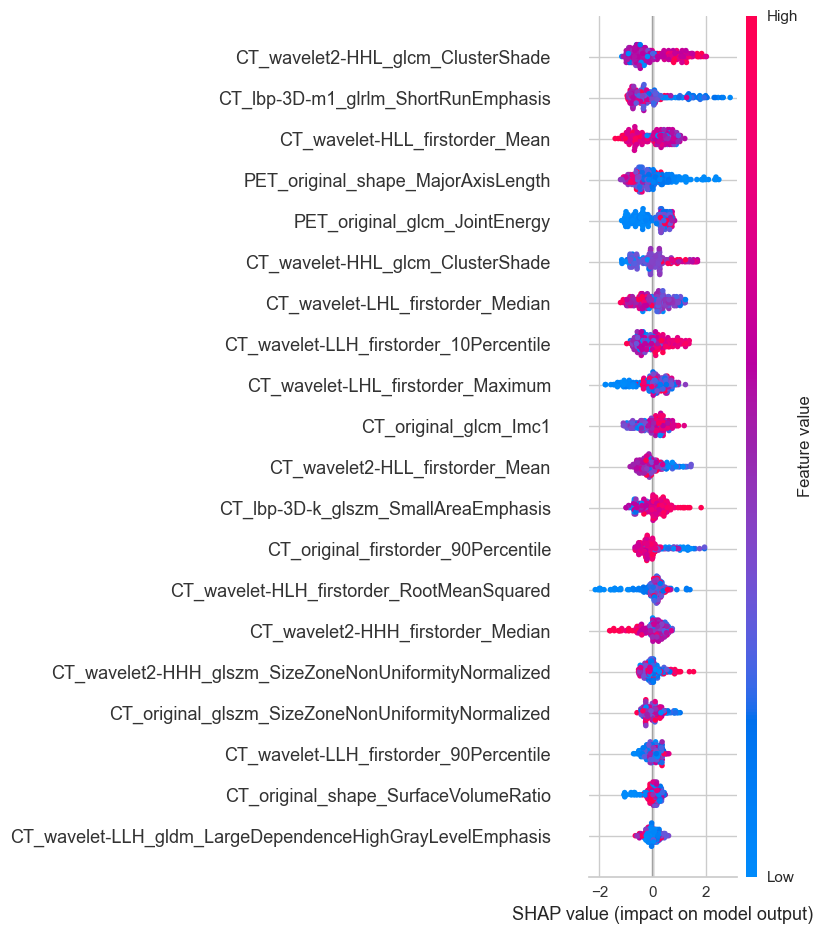

In [197]:

shap.summary_plot(shap_values, X_train)

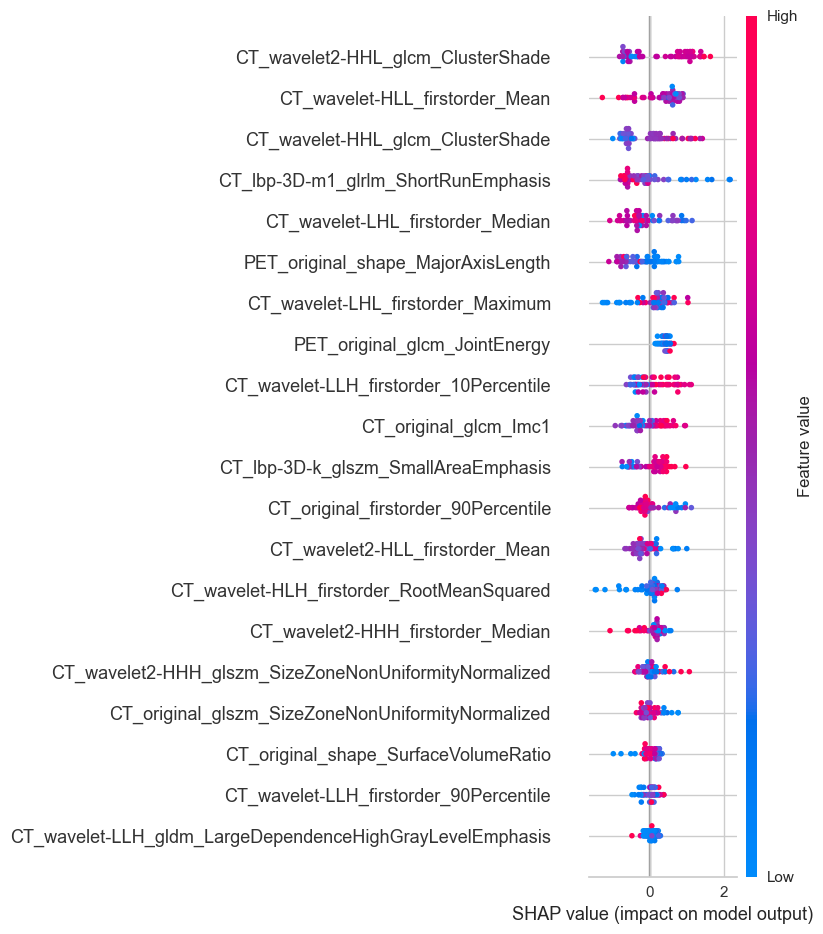

In [198]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [199]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [200]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-CBC73', Save_format = 'csv',Save_type = 'col')

In [201]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.67      0.53      0.59        38
EGFR Mutated       0.49      0.63      0.55        27

    accuracy                           0.57        65
   macro avg       0.58      0.58      0.57        65
weighted avg       0.59      0.57      0.57        65

precision 0.4857142857142857 accuracy 0.5692307692307692 recall 0.6296296296296297 auc 0.577972709551657


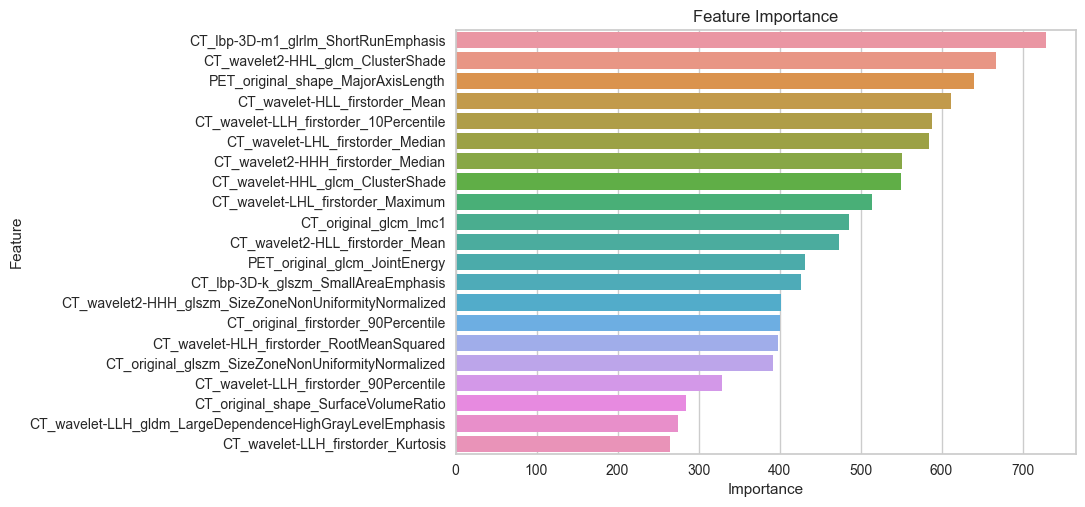

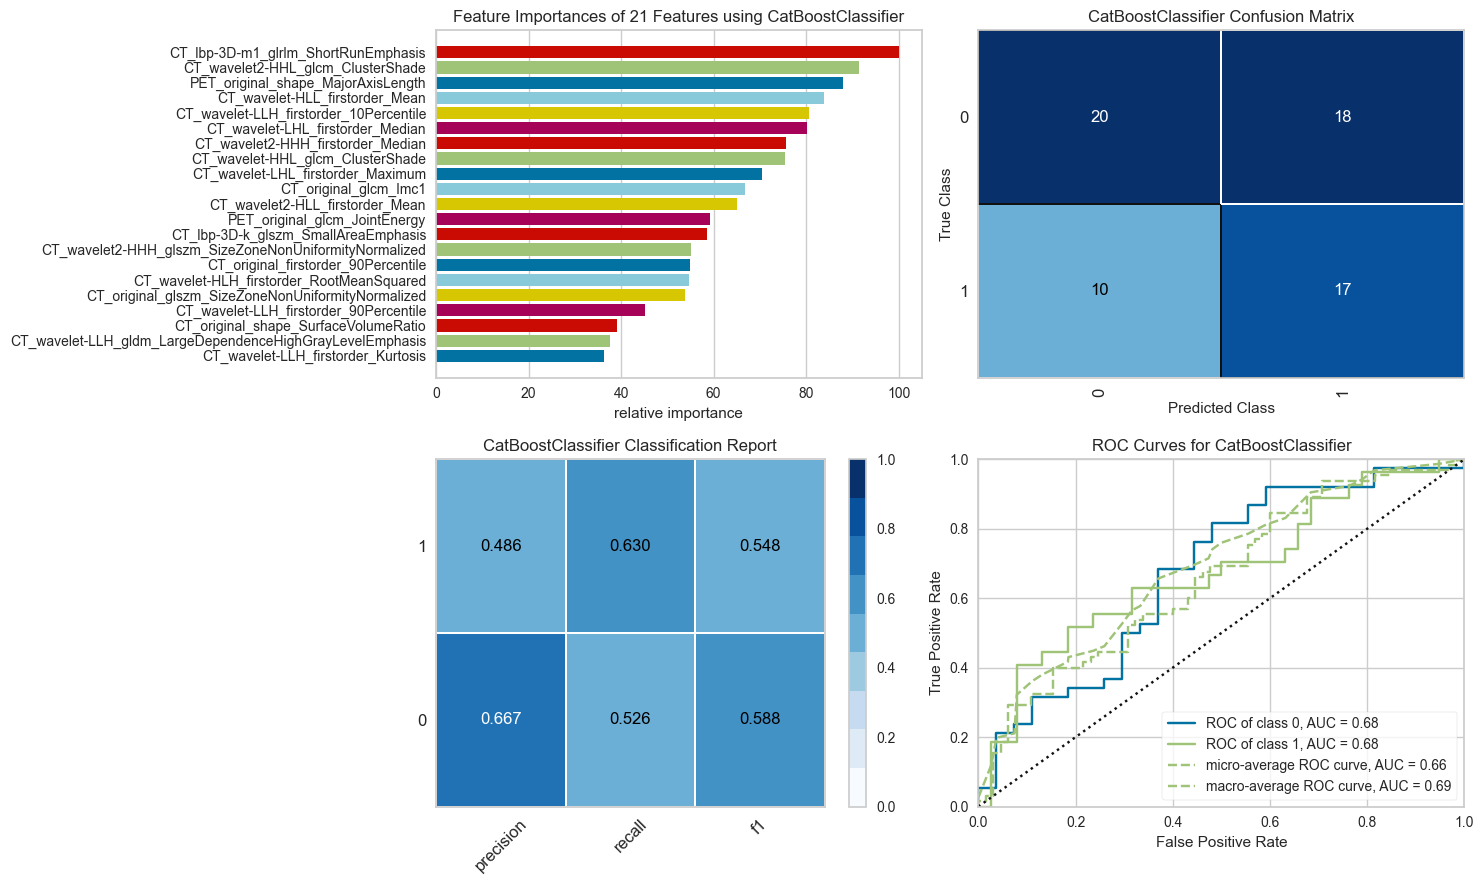

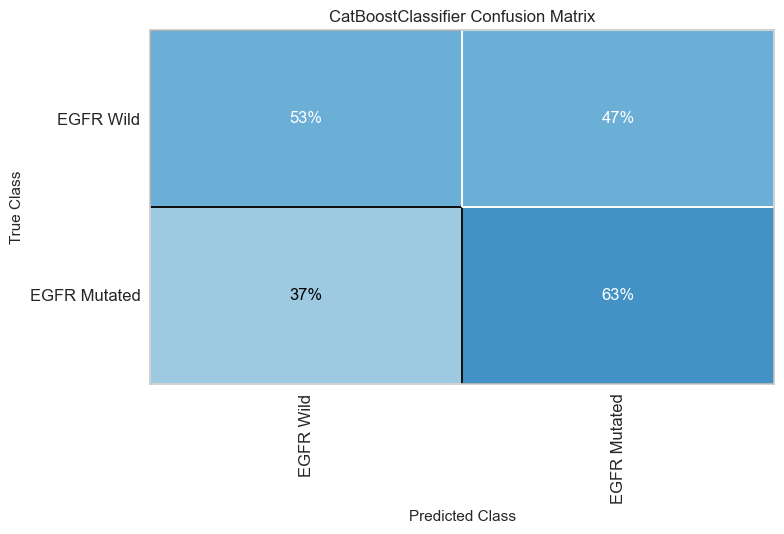

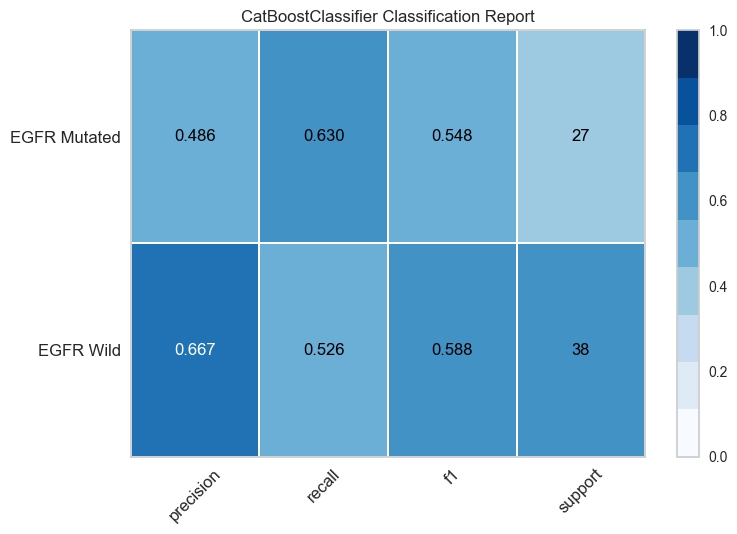

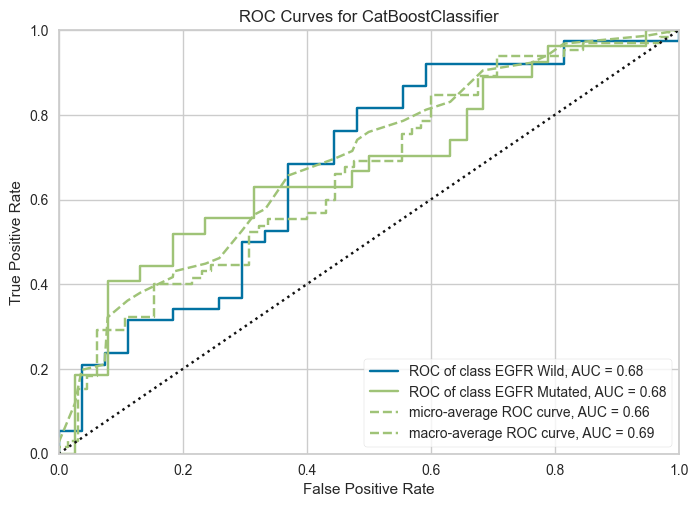

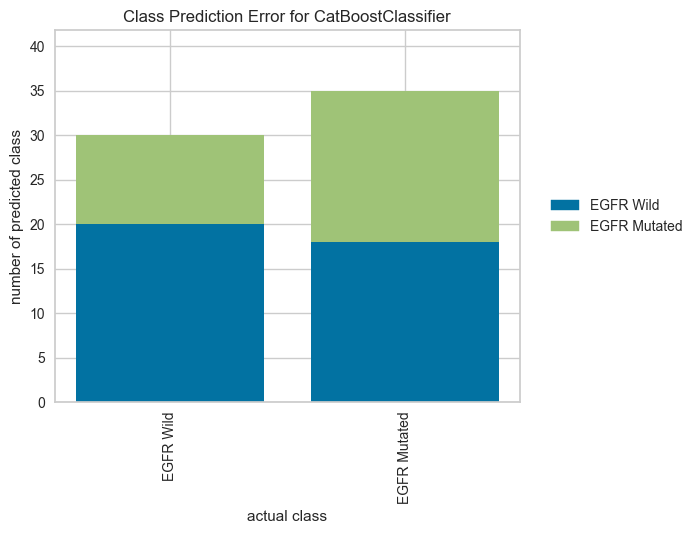

NameError: name 'X' is not defined

In [202]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [141]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.5, 'n_estimators': 800}

In [142]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.5230769230769231

In [143]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-ADB73', Save_format = 'csv',Save_type = 'col')

In [144]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.62      0.47      0.54        38
    EGFR E21       0.44      0.59      0.51        27

    accuracy                           0.52        65
   macro avg       0.53      0.53      0.52        65
weighted avg       0.55      0.52      0.53        65

precision 0.4444444444444444 accuracy 0.5230769230769231 recall 0.5925925925925926 auc 0.5331384015594542


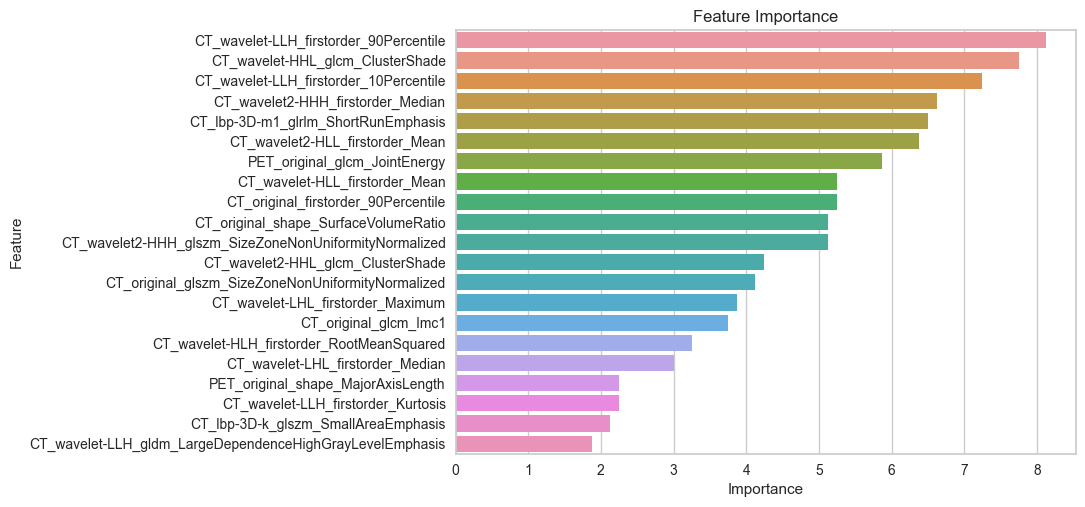

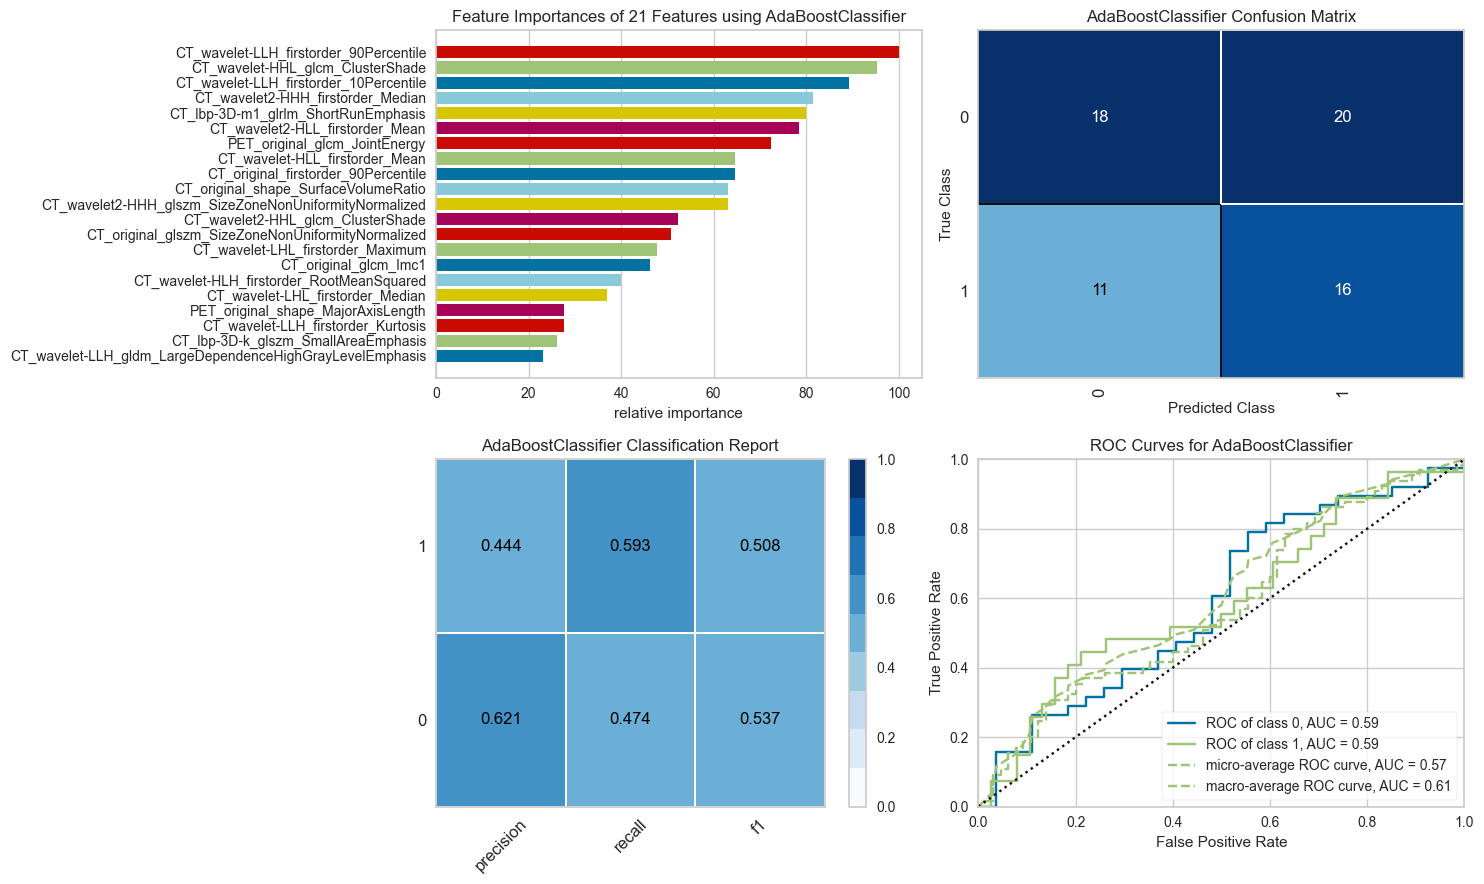

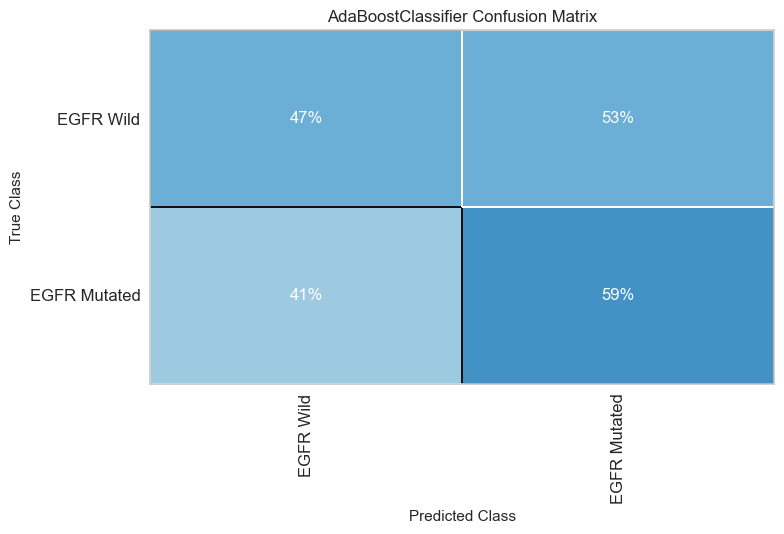

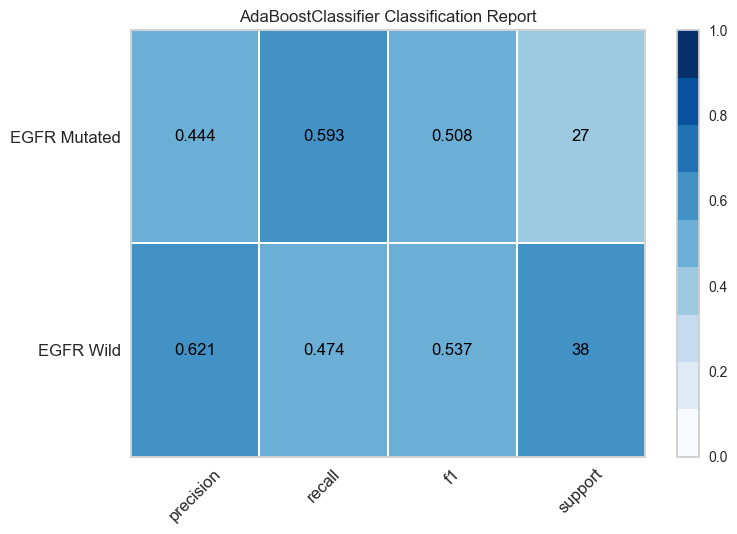

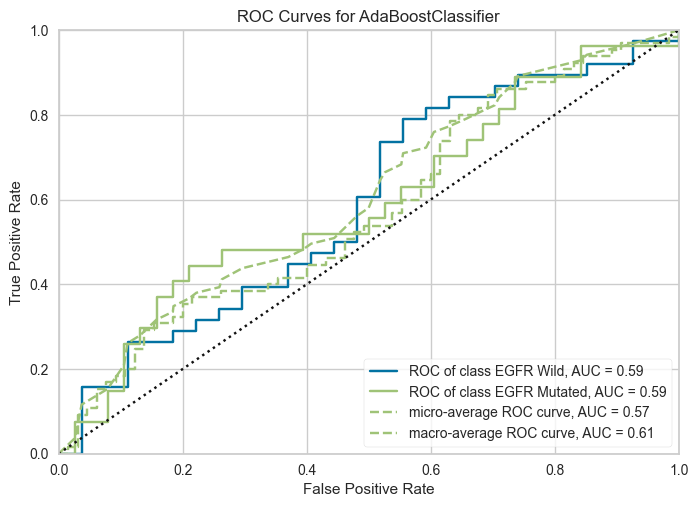

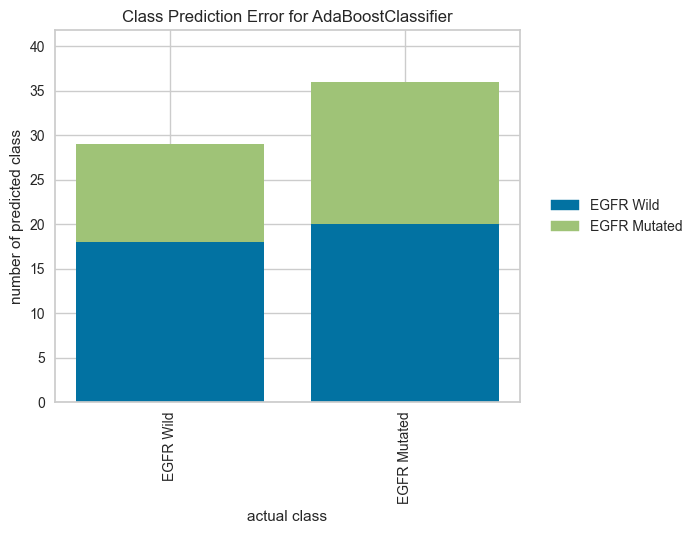

NameError: name 'X' is not defined

In [145]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [146]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.5, 'n_estimators': 2000, 'subsample': 0.5}

In [147]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6615384615384615

In [148]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-gbdt', Save_format = 'csv',Save_type = 'col')

In [149]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.77      0.61      0.68        38
EGFR Mutated       0.57      0.74      0.65        27

    accuracy                           0.66        65
   macro avg       0.67      0.67      0.66        65
weighted avg       0.69      0.66      0.66        65

precision 0.5714285714285714 accuracy 0.6615384615384615 recall 0.7407407407407407 auc 0.6730019493177388


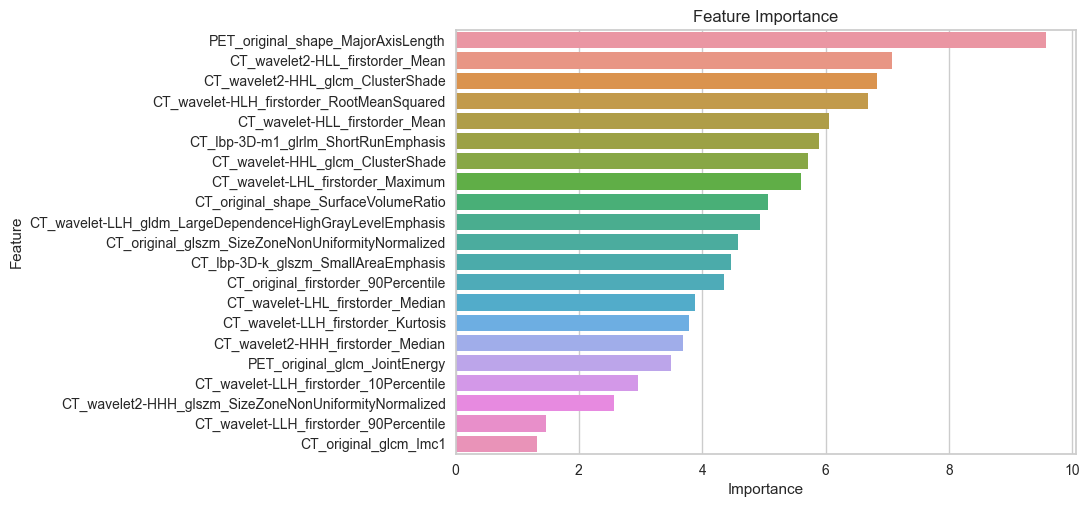

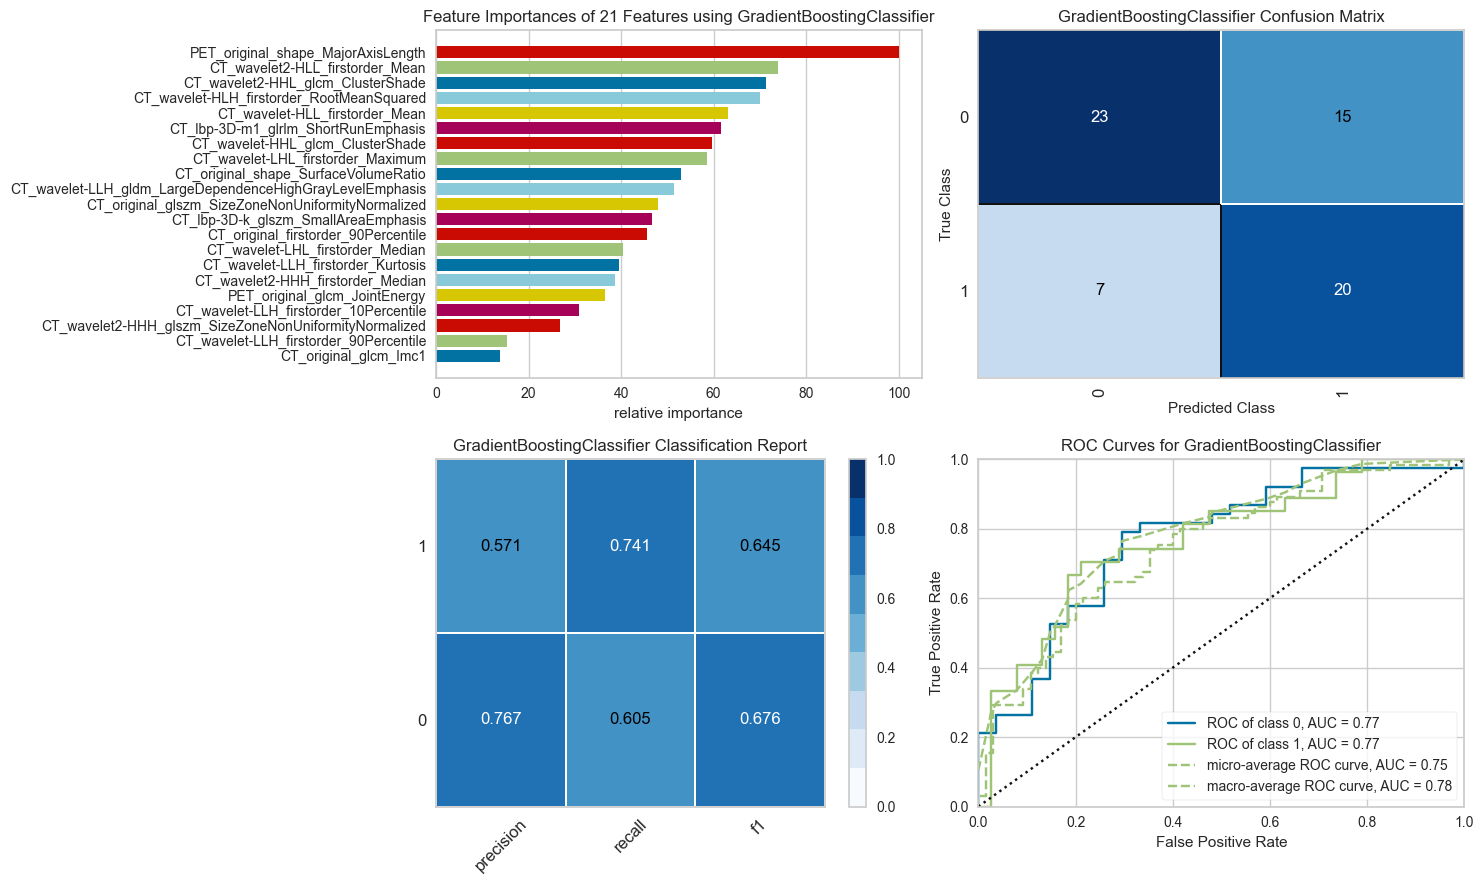

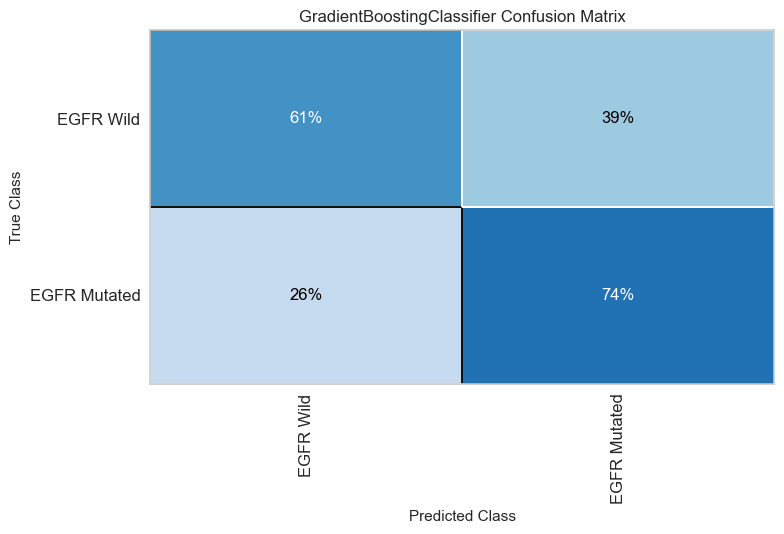

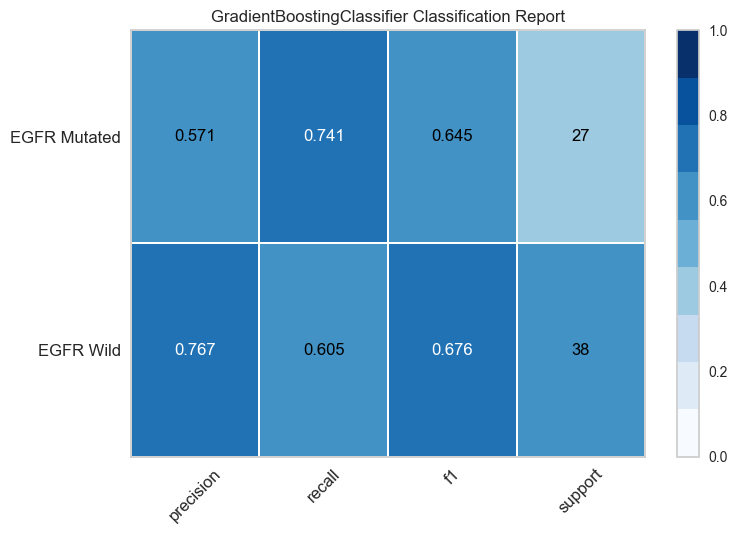

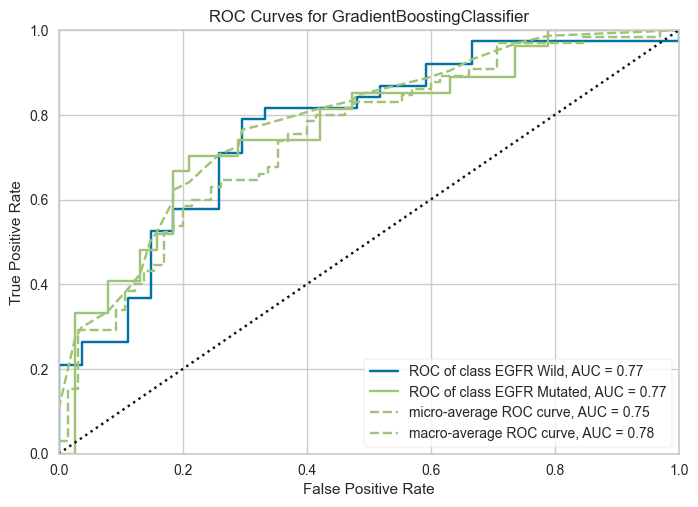

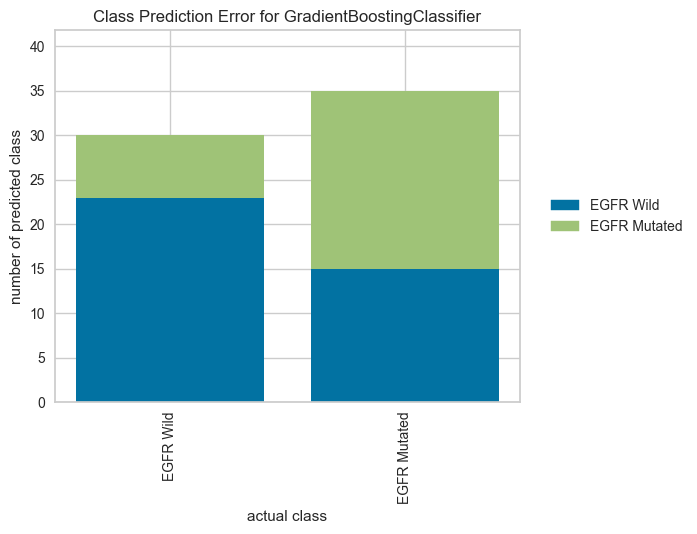

NameError: name 'X' is not defined

In [150]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [32]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.5, 'n_estimators': 500, 'subsample': 0.5}

In [33]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6307692307692307

In [38]:
gbdt_cv_model.best_params_={'learning_rate': 0.5, 'n_estimators': 500, 'subsample': 0.5}

In [39]:
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)

In [35]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-gbdt1', Save_format = 'csv',Save_type = 'col')

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-gbdt1.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.72      0.61      0.66        38
EGFR Mutated       0.55      0.67      0.60        27

    accuracy                           0.63        65
   macro avg       0.63      0.64      0.63        65
weighted avg       0.65      0.63      0.63        65

precision 0.5454545454545454 accuracy 0.6307692307692307 recall 0.6666666666666666 auc 0.6359649122807016


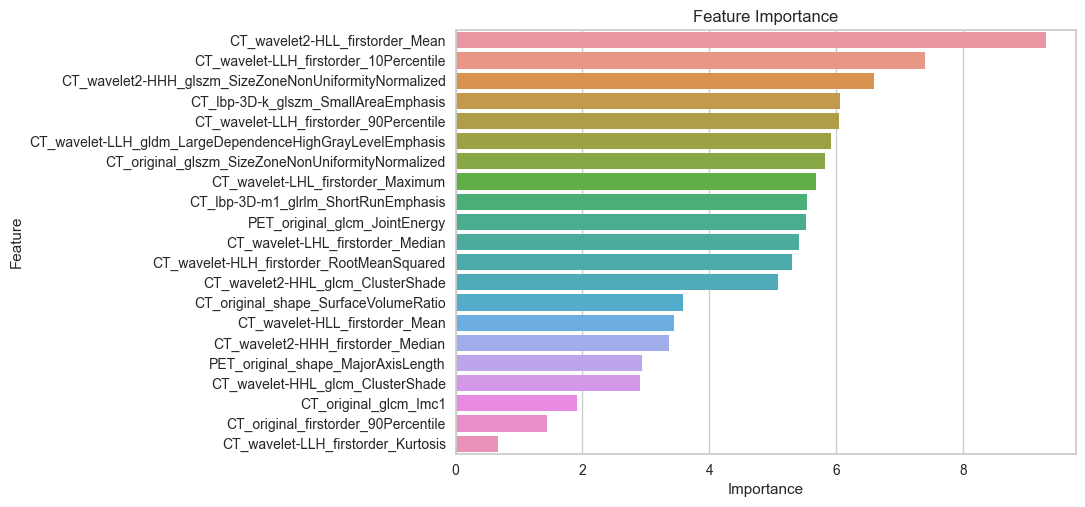

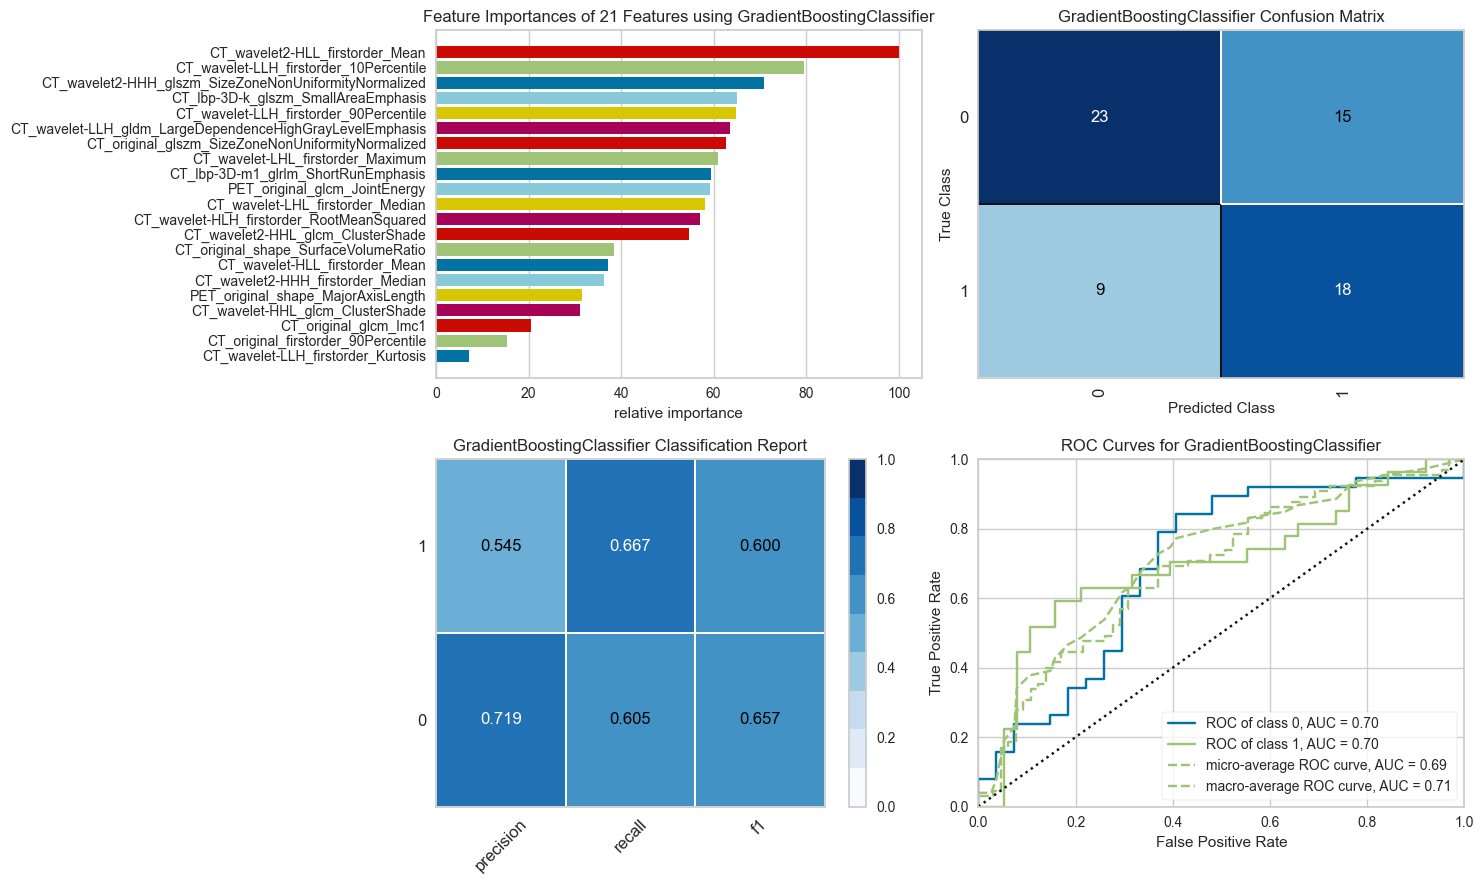

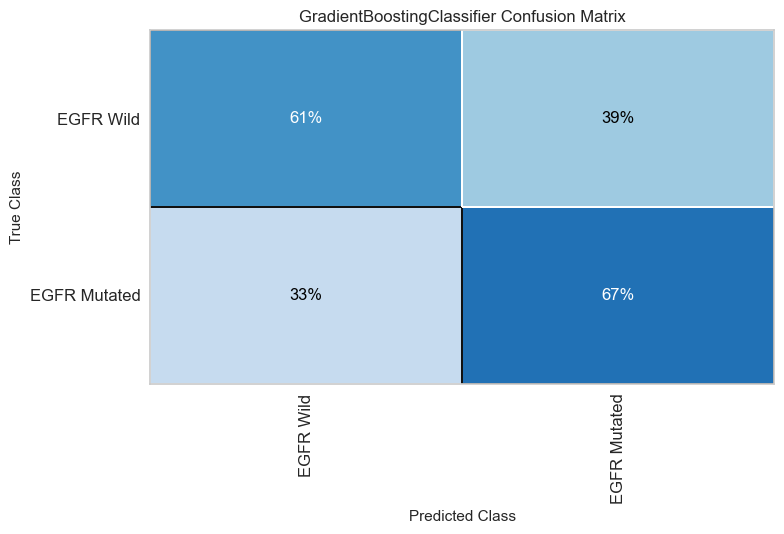

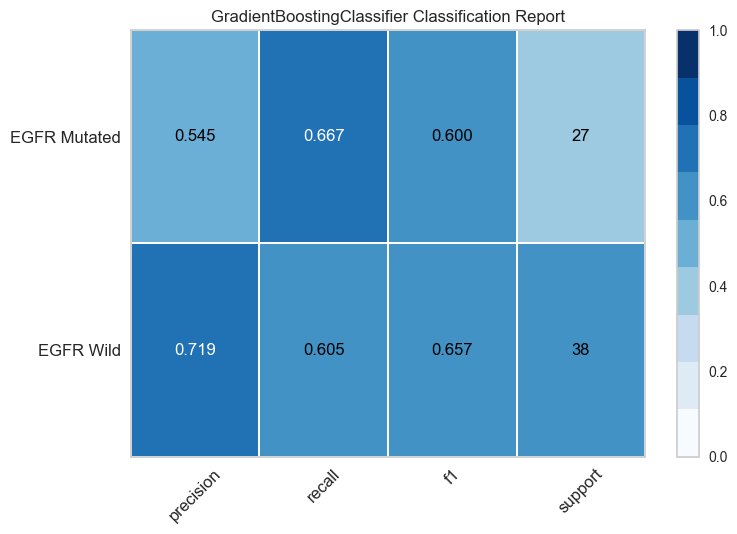

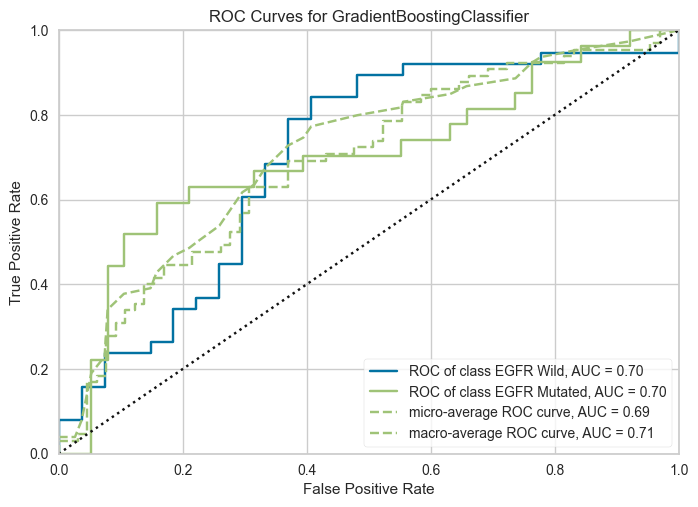

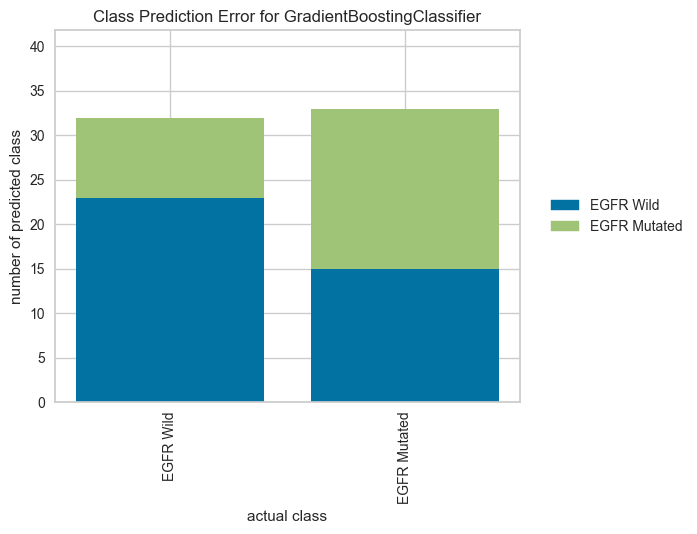

NameError: name 'X' is not defined

In [37]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [40]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(gbdt_tuned)
shap_values = explainer.shap_values(X_train)

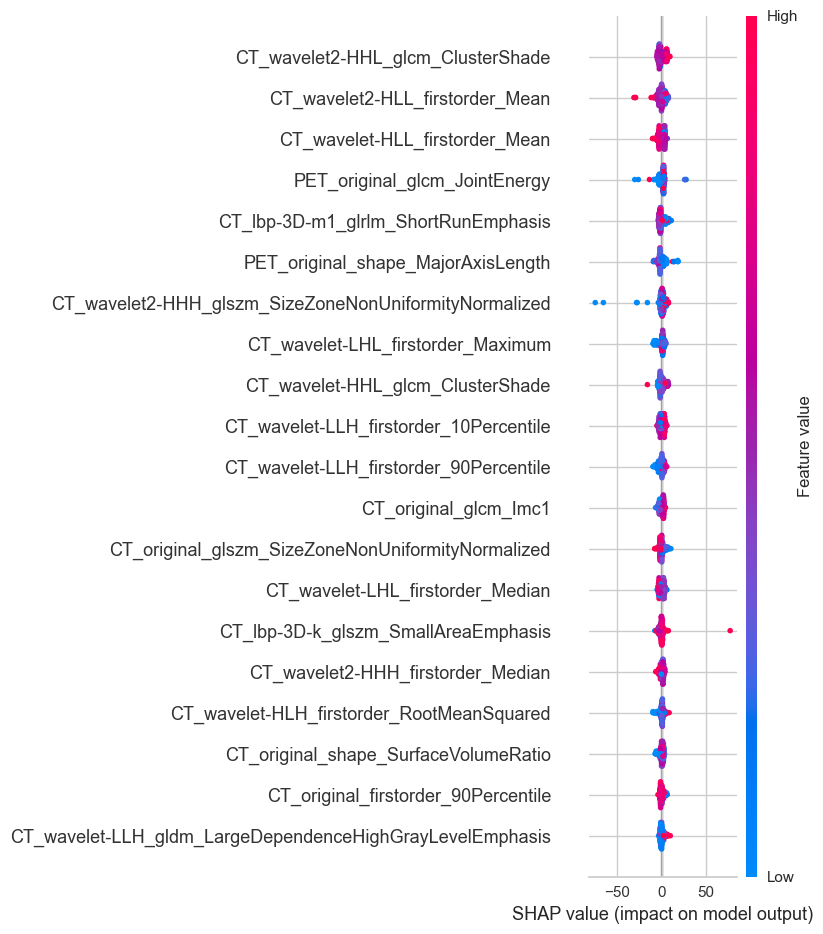

In [41]:
shap.summary_plot(shap_values, X_train)

In [42]:
shap.dependence_plot(y_train, hap_values, X_train)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [151]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 3000, 'subsample': 0.9}

In [152]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.5538461538461539

In [153]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM-XGB73', Save_format = 'csv',Save_type = 'col')

In [154]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.68      0.45      0.54        38
EGFR Mutated       0.47      0.70      0.57        27

    accuracy                           0.55        65
   macro avg       0.58      0.58      0.55        65
weighted avg       0.59      0.55      0.55        65

precision 0.475 accuracy 0.5538461538461539 recall 0.7037037037037037 auc 0.5755360623781676


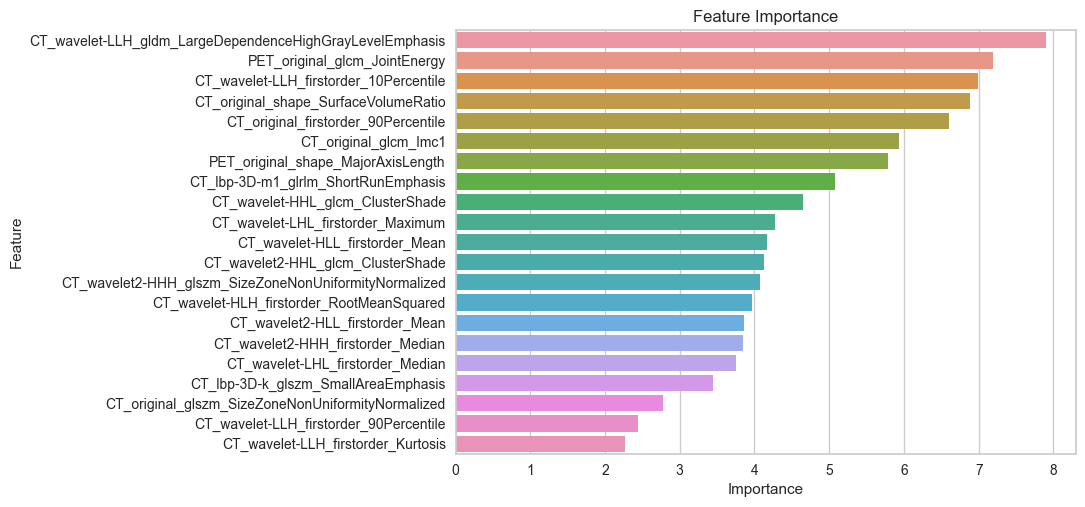

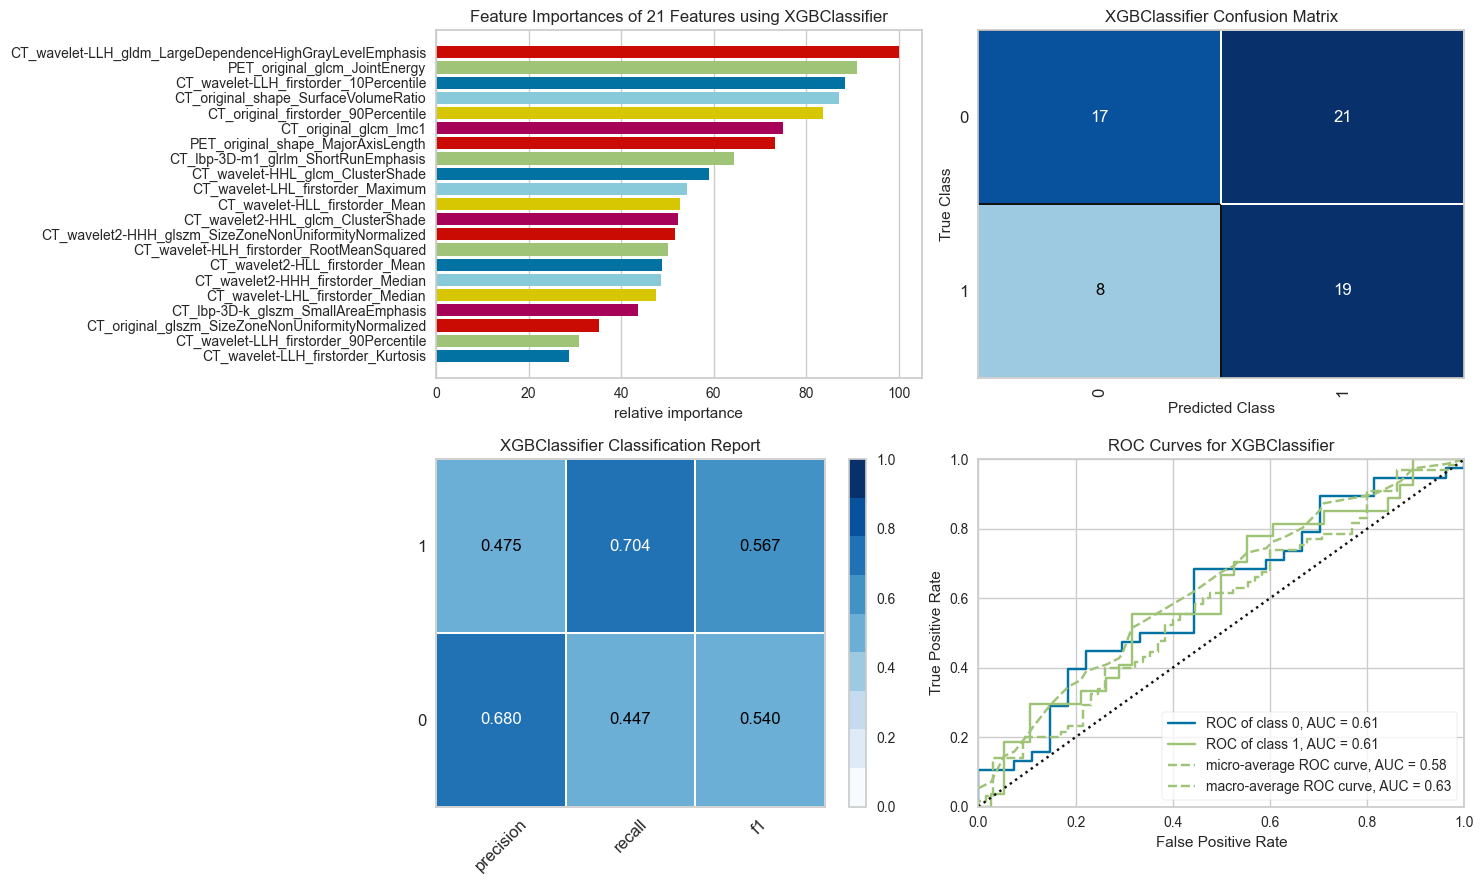

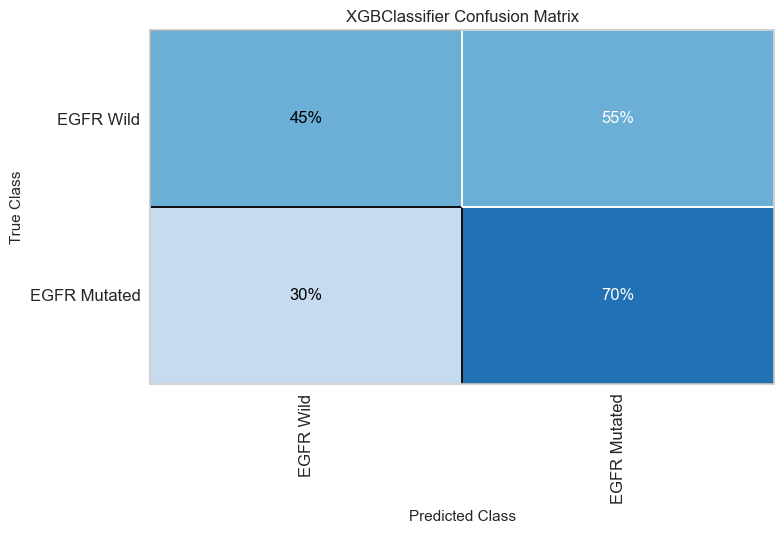

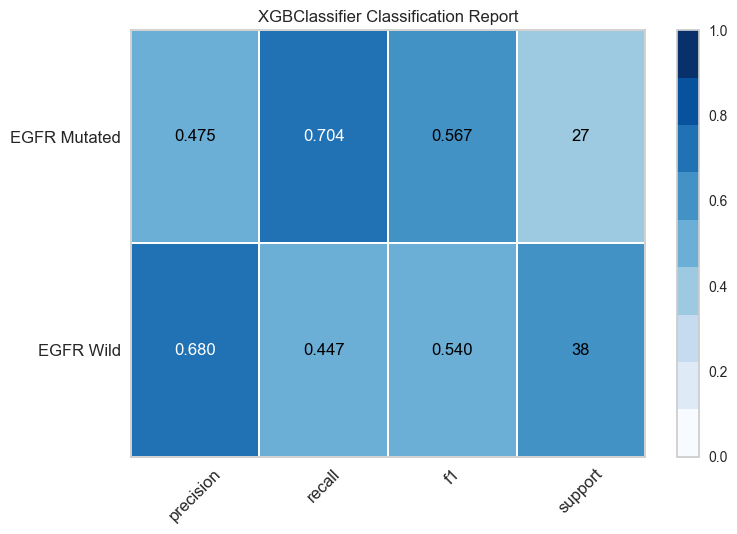

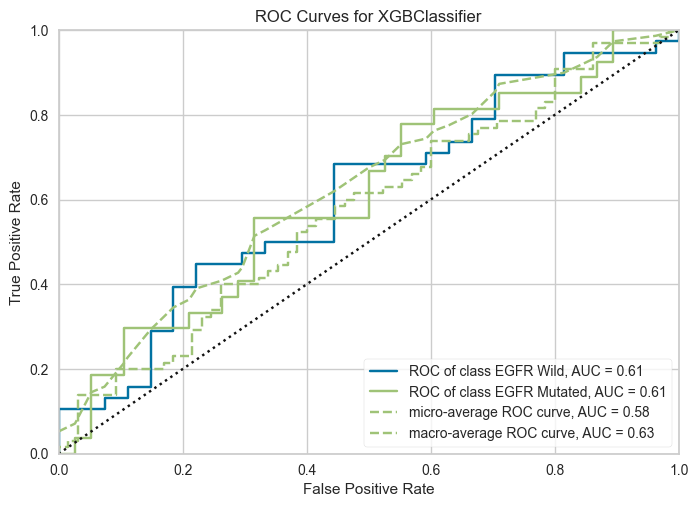

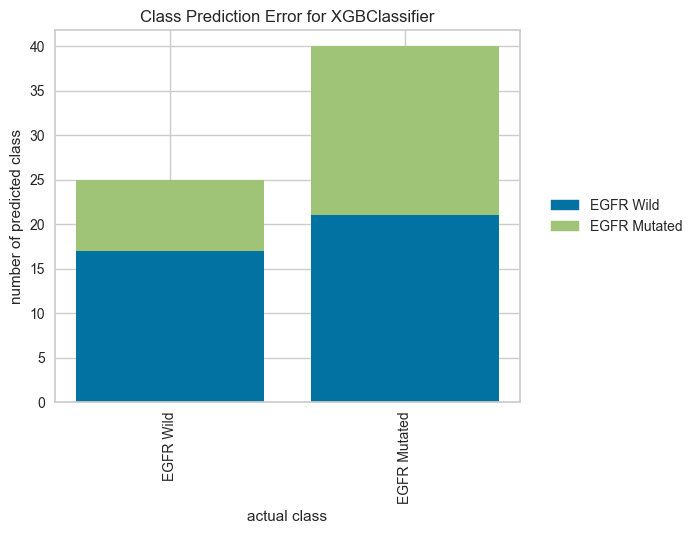

In [155]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [156]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 5000}

In [157]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6153846153846154

In [158]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM-lgb73', Save_format = 'csv',Save_type = 'col')

In [159]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.71      0.58      0.64        38
EGFR Mutated       0.53      0.67      0.59        27

    accuracy                           0.62        65
   macro avg       0.62      0.62      0.61        65
weighted avg       0.63      0.62      0.62        65

precision 0.5294117647058824 accuracy 0.6153846153846154 recall 0.6666666666666666 auc 0.6228070175438596


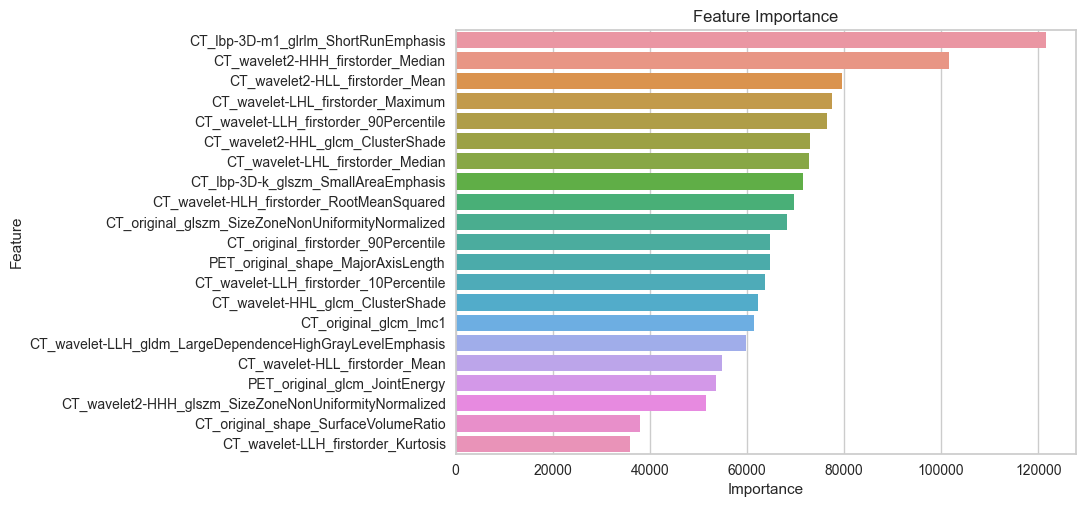

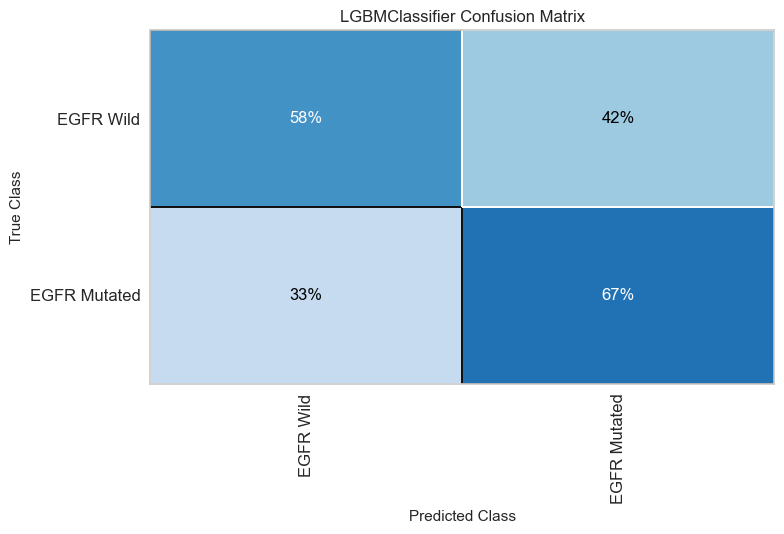

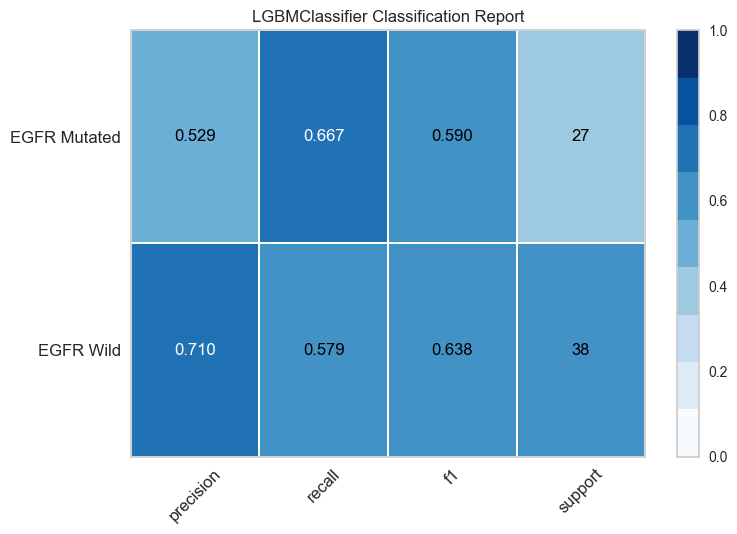

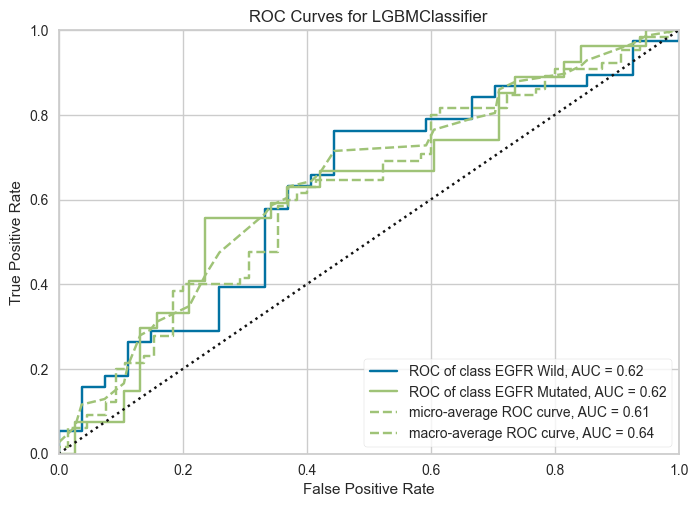

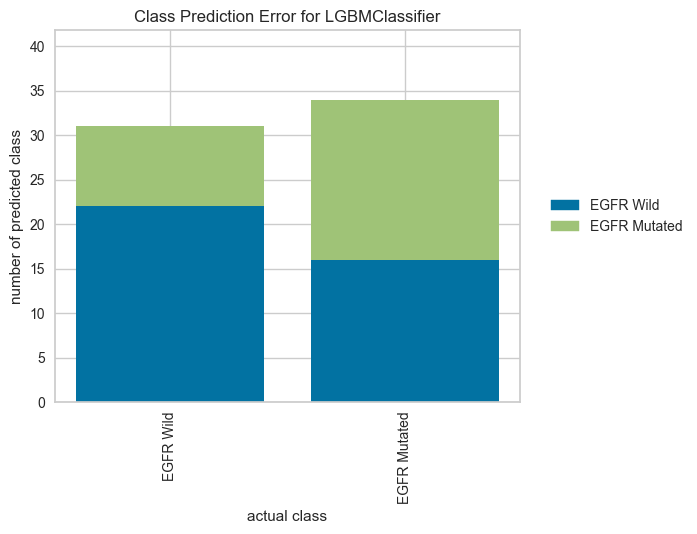

In [160]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [161]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [162]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [163]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

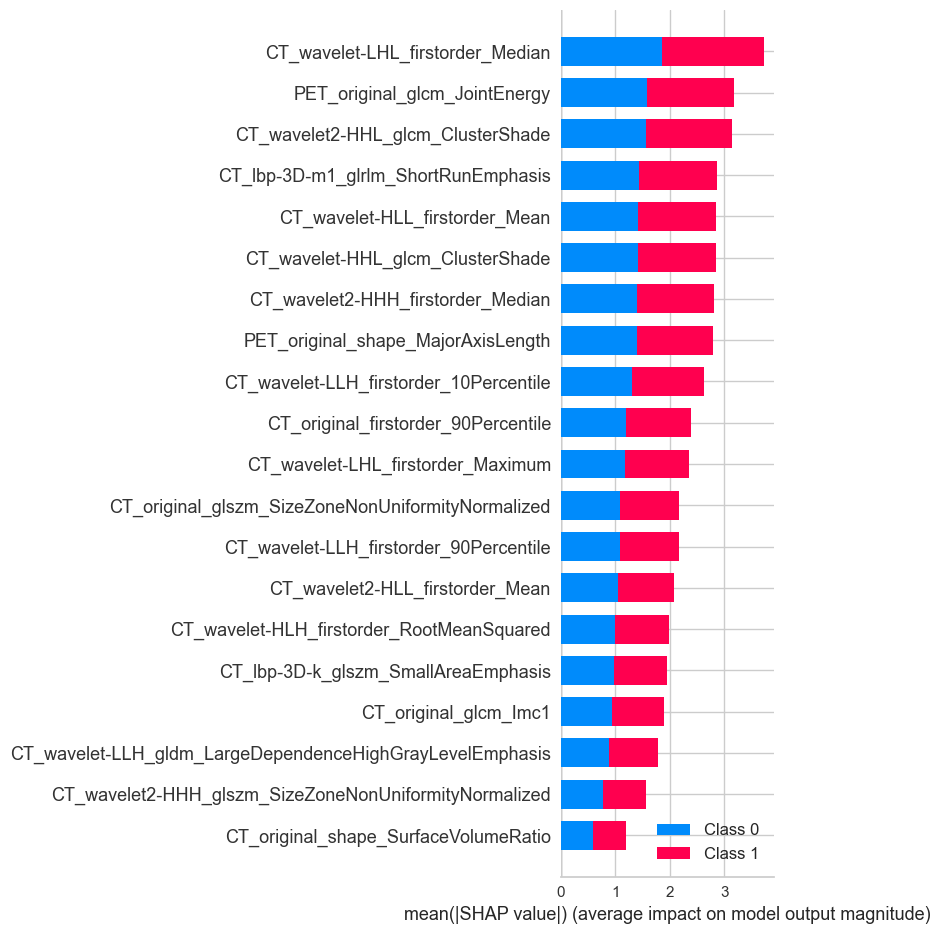

In [164]:
shap.summary_plot(shap_values, X_train)

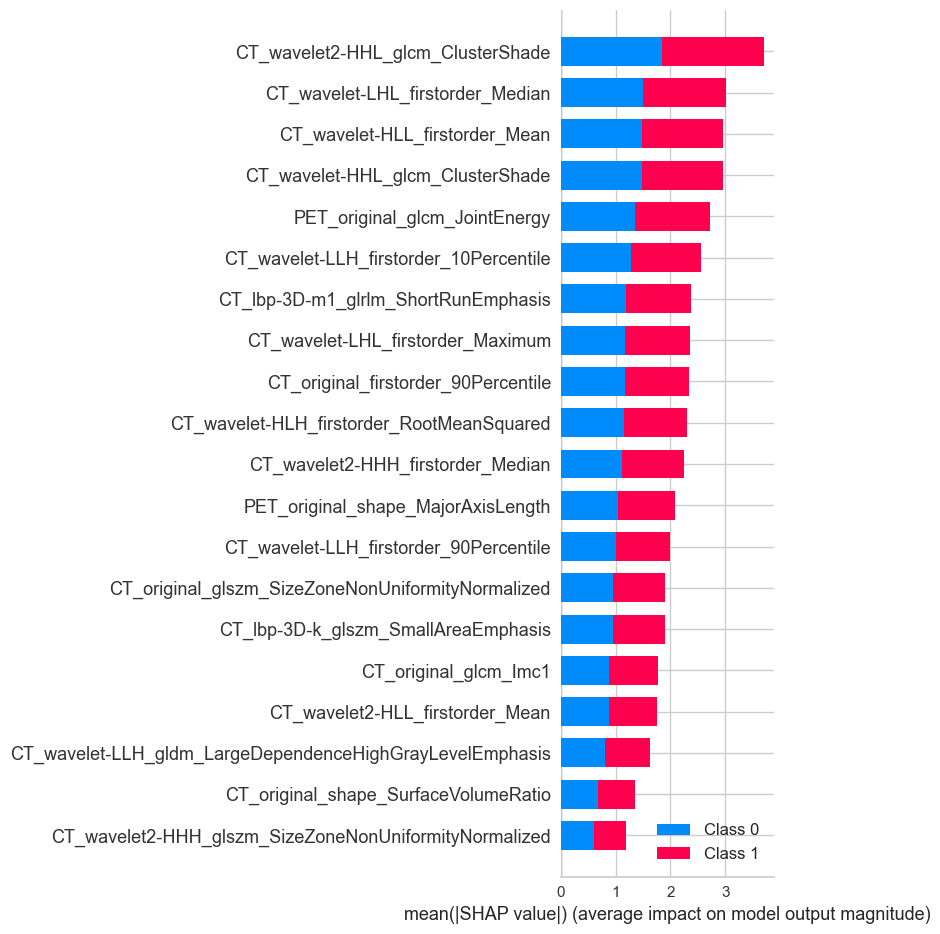

In [165]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [166]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [167]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

0:	learn: 0.6816805	total: 25.5ms	remaining: 50.9s
1:	learn: 0.6746285	total: 27.5ms	remaining: 27.5s
2:	learn: 0.6662474	total: 29.2ms	remaining: 19.4s
3:	learn: 0.6570727	total: 31.4ms	remaining: 15.7s
4:	learn: 0.6491690	total: 32.9ms	remaining: 13.1s
5:	learn: 0.6363336	total: 35ms	remaining: 11.6s
6:	learn: 0.6272549	total: 36.5ms	remaining: 10.4s
7:	learn: 0.6203734	total: 38.1ms	remaining: 9.48s
8:	learn: 0.6123419	total: 39.5ms	remaining: 8.74s
9:	learn: 0.6085824	total: 40.9ms	remaining: 8.13s
10:	learn: 0.6015986	total: 42.4ms	remaining: 7.67s
11:	learn: 0.5945814	total: 43.8ms	remaining: 7.26s
12:	learn: 0.5857630	total: 45.3ms	remaining: 6.92s
13:	learn: 0.5789655	total: 46.7ms	remaining: 6.63s
14:	learn: 0.5751342	total: 48.1ms	remaining: 6.37s
15:	learn: 0.5679412	total: 49.6ms	remaining: 6.15s
16:	learn: 0.5634449	total: 51ms	remaining: 5.95s
17:	learn: 0.5578041	total: 52.5ms	remaining: 5.79

216:	learn: 0.1351388	total: 336ms	remaining: 2.76s
217:	learn: 0.1342313	total: 337ms	remaining: 2.75s
218:	learn: 0.1335306	total: 339ms	remaining: 2.75s
219:	learn: 0.1327098	total: 340ms	remaining: 2.75s
220:	learn: 0.1316627	total: 341ms	remaining: 2.75s
221:	learn: 0.1306349	total: 343ms	remaining: 2.75s
222:	learn: 0.1291756	total: 344ms	remaining: 2.74s
223:	learn: 0.1284090	total: 346ms	remaining: 2.74s
224:	learn: 0.1274046	total: 347ms	remaining: 2.74s
225:	learn: 0.1265652	total: 349ms	remaining: 2.73s
226:	learn: 0.1259607	total: 350ms	remaining: 2.73s
227:	learn: 0.1254134	total: 351ms	remaining: 2.73s
228:	learn: 0.1242074	total: 353ms	remaining: 2.73s
229:	learn: 0.1230373	total: 354ms	remaining: 2.73s
230:	learn: 0.1217502	total: 356ms	remaining: 2.72s
231:	learn: 0.1211116	total: 357ms	remaining: 2.72s
232:	learn: 0.1199019	total: 358ms	remaining: 2.72s
233:	learn: 0.1189970	total: 360ms	remaining: 2.72s
234:	learn: 0.1181927	total: 361ms	remaining: 2.71s
235:	learn: 

459:	learn: 0.0332500	total: 688ms	remaining: 2.3s
460:	learn: 0.0330879	total: 689ms	remaining: 2.3s
461:	learn: 0.0329235	total: 691ms	remaining: 2.3s
462:	learn: 0.0327541	total: 692ms	remaining: 2.3s
463:	learn: 0.0325931	total: 694ms	remaining: 2.3s
464:	learn: 0.0324191	total: 695ms	remaining: 2.29s
465:	learn: 0.0322492	total: 697ms	remaining: 2.29s
466:	learn: 0.0321362	total: 698ms	remaining: 2.29s
467:	learn: 0.0320043	total: 699ms	remaining: 2.29s
468:	learn: 0.0318300	total: 701ms	remaining: 2.29s
469:	learn: 0.0317408	total: 702ms	remaining: 2.29s
470:	learn: 0.0316701	total: 704ms	remaining: 2.28s
471:	learn: 0.0315471	total: 705ms	remaining: 2.28s
472:	learn: 0.0314637	total: 707ms	remaining: 2.28s
473:	learn: 0.0313158	total: 708ms	remaining: 2.28s
474:	learn: 0.0311775	total: 709ms	remaining: 2.28s
475:	learn: 0.0310251	total: 711ms	remaining: 2.27s
476:	learn: 0.0308965	total: 712ms	remaining: 2.27s
477:	learn: 0.0307657	total: 714ms	remaining: 2.27s
478:	learn: 0.030

705:	learn: 0.0149936	total: 1.04s	remaining: 1.91s
706:	learn: 0.0149502	total: 1.04s	remaining: 1.9s
707:	learn: 0.0149057	total: 1.04s	remaining: 1.9s
708:	learn: 0.0148656	total: 1.04s	remaining: 1.9s
709:	learn: 0.0148183	total: 1.04s	remaining: 1.9s
710:	learn: 0.0147653	total: 1.05s	remaining: 1.9s
711:	learn: 0.0147325	total: 1.05s	remaining: 1.9s
712:	learn: 0.0146978	total: 1.05s	remaining: 1.9s
713:	learn: 0.0146583	total: 1.05s	remaining: 1.89s
714:	learn: 0.0146288	total: 1.05s	remaining: 1.89s
715:	learn: 0.0146038	total: 1.05s	remaining: 1.89s
716:	learn: 0.0145749	total: 1.05s	remaining: 1.89s
717:	learn: 0.0145397	total: 1.06s	remaining: 1.89s
718:	learn: 0.0144915	total: 1.06s	remaining: 1.89s
719:	learn: 0.0144528	total: 1.06s	remaining: 1.88s
720:	learn: 0.0144203	total: 1.06s	remaining: 1.88s
721:	learn: 0.0143943	total: 1.06s	remaining: 1.88s
722:	learn: 0.0143597	total: 1.06s	remaining: 1.88s
723:	learn: 0.0143204	total: 1.07s	remaining: 1.88s
724:	learn: 0.01428

947:	learn: 0.0091695	total: 1.39s	remaining: 1.54s
948:	learn: 0.0091589	total: 1.39s	remaining: 1.54s
949:	learn: 0.0091372	total: 1.4s	remaining: 1.54s
950:	learn: 0.0091250	total: 1.4s	remaining: 1.54s
951:	learn: 0.0091163	total: 1.4s	remaining: 1.54s
952:	learn: 0.0090942	total: 1.4s	remaining: 1.54s
953:	learn: 0.0090769	total: 1.4s	remaining: 1.54s
954:	learn: 0.0090575	total: 1.4s	remaining: 1.53s
955:	learn: 0.0090396	total: 1.4s	remaining: 1.53s
956:	learn: 0.0090186	total: 1.41s	remaining: 1.53s
957:	learn: 0.0090058	total: 1.41s	remaining: 1.53s
958:	learn: 0.0089935	total: 1.41s	remaining: 1.53s
959:	learn: 0.0089693	total: 1.41s	remaining: 1.53s
960:	learn: 0.0089574	total: 1.41s	remaining: 1.53s
961:	learn: 0.0089496	total: 1.41s	remaining: 1.52s
962:	learn: 0.0089317	total: 1.41s	remaining: 1.52s
963:	learn: 0.0089220	total: 1.42s	remaining: 1.52s
964:	learn: 0.0089029	total: 1.42s	remaining: 1.52s
965:	learn: 0.0088911	total: 1.42s	remaining: 1.52s
966:	learn: 0.00888

1181:	learn: 0.0065445	total: 1.75s	remaining: 1.21s
1182:	learn: 0.0065370	total: 1.75s	remaining: 1.21s
1183:	learn: 0.0065287	total: 1.75s	remaining: 1.21s
1184:	learn: 0.0065229	total: 1.75s	remaining: 1.21s
1185:	learn: 0.0065161	total: 1.75s	remaining: 1.2s
1186:	learn: 0.0065011	total: 1.75s	remaining: 1.2s
1187:	learn: 0.0064916	total: 1.76s	remaining: 1.2s
1188:	learn: 0.0064829	total: 1.76s	remaining: 1.2s
1189:	learn: 0.0064752	total: 1.76s	remaining: 1.2s
1190:	learn: 0.0064663	total: 1.76s	remaining: 1.2s
1191:	learn: 0.0064582	total: 1.76s	remaining: 1.19s
1192:	learn: 0.0064498	total: 1.76s	remaining: 1.19s
1193:	learn: 0.0064475	total: 1.76s	remaining: 1.19s
1194:	learn: 0.0064394	total: 1.77s	remaining: 1.19s
1195:	learn: 0.0064309	total: 1.77s	remaining: 1.19s
1196:	learn: 0.0064200	total: 1.77s	remaining: 1.19s
1197:	learn: 0.0064103	total: 1.77s	remaining: 1.19s
1198:	learn: 0.0064002	total: 1.77s	remaining: 1.18s
1199:	learn: 0.0063951	total: 1.77s	remaining: 1.18s

1425:	learn: 0.0049590	total: 2.1s	remaining: 846ms
1426:	learn: 0.0049561	total: 2.1s	remaining: 844ms
1427:	learn: 0.0049490	total: 2.1s	remaining: 843ms
1428:	learn: 0.0049423	total: 2.1s	remaining: 841ms
1429:	learn: 0.0049375	total: 2.11s	remaining: 840ms
1430:	learn: 0.0049332	total: 2.11s	remaining: 838ms
1431:	learn: 0.0049278	total: 2.11s	remaining: 837ms
1432:	learn: 0.0049222	total: 2.11s	remaining: 835ms
1433:	learn: 0.0049195	total: 2.11s	remaining: 834ms
1434:	learn: 0.0049146	total: 2.12s	remaining: 833ms
1435:	learn: 0.0049102	total: 2.12s	remaining: 832ms
1436:	learn: 0.0049030	total: 2.12s	remaining: 830ms
1437:	learn: 0.0048972	total: 2.12s	remaining: 829ms
1438:	learn: 0.0048920	total: 2.12s	remaining: 827ms
1439:	learn: 0.0048894	total: 2.12s	remaining: 826ms
1440:	learn: 0.0048847	total: 2.12s	remaining: 824ms
1441:	learn: 0.0048803	total: 2.13s	remaining: 823ms
1442:	learn: 0.0048746	total: 2.13s	remaining: 822ms
1443:	learn: 0.0048709	total: 2.13s	remaining: 820

1664:	learn: 0.0039974	total: 2.45s	remaining: 493ms
1665:	learn: 0.0039945	total: 2.45s	remaining: 492ms
1666:	learn: 0.0039927	total: 2.45s	remaining: 490ms
1667:	learn: 0.0039893	total: 2.46s	remaining: 489ms
1668:	learn: 0.0039843	total: 2.46s	remaining: 487ms
1669:	learn: 0.0039809	total: 2.46s	remaining: 486ms
1670:	learn: 0.0039775	total: 2.46s	remaining: 484ms
1671:	learn: 0.0039721	total: 2.46s	remaining: 483ms
1672:	learn: 0.0039675	total: 2.46s	remaining: 481ms
1673:	learn: 0.0039653	total: 2.46s	remaining: 480ms
1674:	learn: 0.0039626	total: 2.46s	remaining: 478ms
1675:	learn: 0.0039588	total: 2.47s	remaining: 477ms
1676:	learn: 0.0039588	total: 2.47s	remaining: 475ms
1677:	learn: 0.0039564	total: 2.47s	remaining: 474ms
1678:	learn: 0.0039541	total: 2.47s	remaining: 472ms
1679:	learn: 0.0039520	total: 2.47s	remaining: 471ms
1680:	learn: 0.0039486	total: 2.47s	remaining: 470ms
1681:	learn: 0.0039467	total: 2.48s	remaining: 468ms
1682:	learn: 0.0039434	total: 2.48s	remaining:

1912:	learn: 0.0033219	total: 2.8s	remaining: 128ms
1913:	learn: 0.0033196	total: 2.81s	remaining: 126ms
1914:	learn: 0.0033174	total: 2.81s	remaining: 125ms
1915:	learn: 0.0033158	total: 2.81s	remaining: 123ms
1916:	learn: 0.0033157	total: 2.81s	remaining: 122ms
1917:	learn: 0.0033140	total: 2.81s	remaining: 120ms
1918:	learn: 0.0033111	total: 2.81s	remaining: 119ms
1919:	learn: 0.0033091	total: 2.81s	remaining: 117ms
1920:	learn: 0.0033066	total: 2.81s	remaining: 116ms
1921:	learn: 0.0033042	total: 2.82s	remaining: 114ms
1922:	learn: 0.0033001	total: 2.82s	remaining: 113ms
1923:	learn: 0.0032979	total: 2.82s	remaining: 111ms
1924:	learn: 0.0032951	total: 2.82s	remaining: 110ms
1925:	learn: 0.0032933	total: 2.82s	remaining: 108ms
1926:	learn: 0.0032910	total: 2.82s	remaining: 107ms
1927:	learn: 0.0032890	total: 2.83s	remaining: 106ms
1928:	learn: 0.0032866	total: 2.83s	remaining: 104ms
1929:	learn: 0.0032839	total: 2.83s	remaining: 103ms
1930:	learn: 0.0032816	total: 2.83s	remaining: 

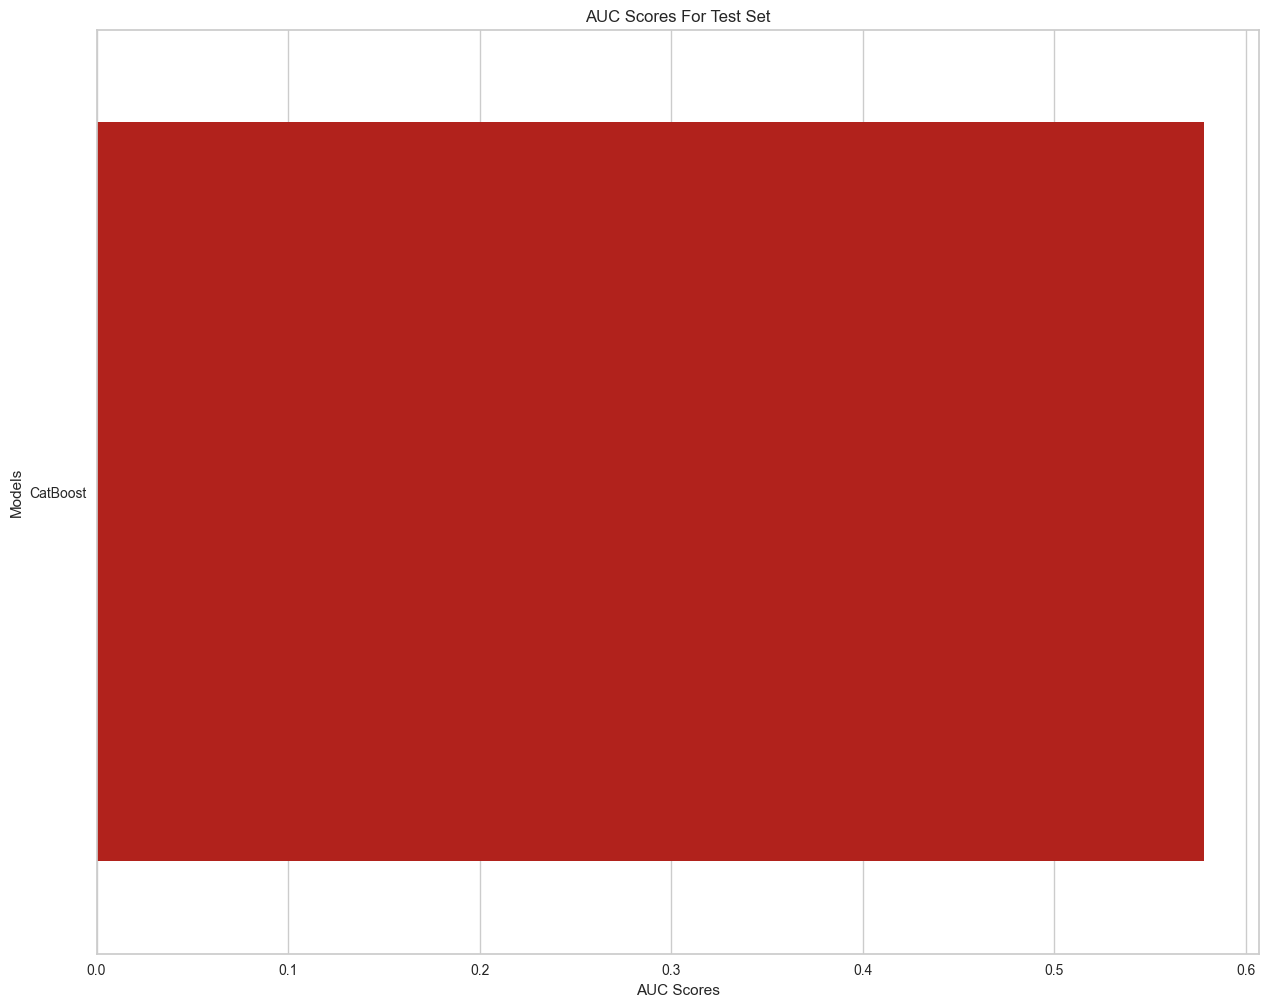

In [203]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
#     ('LogisticRegression', logreg_tuned),
#                 ('RF', rf_tuned),
#                 ('XGBoost', xgb_tuned),
#                 ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
# #                 ('SVM', svm_tuned),
#                 ('GBDT', gbdt_tuned),
# #                 ('NGBoost', ngb_tuned),
# #                 ('DT', dt_tuned),
#                 ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [153]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6913043	total: 466us	remaining: 233ms
1:	learn: 0.6894106	total: 1.08ms	remaining: 270ms
2:	learn: 0.6883138	total: 1.54ms	remaining: 255ms
3:	learn: 0.6871873	total: 1.95ms	remaining: 242ms
4:	learn: 0.6845546	total: 2.34ms	remaining: 232ms
5:	learn: 0.6820555	total: 2.76ms	remaining: 227ms
6:	learn: 0.6806537	total: 3.17ms	remaining: 224ms
7:	learn: 0.6792333	total: 3.58ms	remaining: 220ms
8:	learn: 0.6773484	total: 3.99ms	remaining: 218ms
9:	learn: 0.6761950	total: 4.4ms	remaining: 215ms
10:	learn: 0.6736581	total: 4.91ms	remaining: 218ms
11:	learn: 0.6717208	total: 5.35ms	remaining: 218ms
12:	learn: 0.6704542	total: 5.75ms	remaining: 215ms
13:	learn: 0.6693845	total: 6.15ms	remaining: 214ms
14:	learn: 0.6680733	total: 6.58ms	remaining: 213ms
15:	learn: 0.6666074	total: 7.01ms	remaining: 212ms
16:	learn: 0.6639269	total: 7.45ms	remaining: 212ms
17:	learn: 0.6629117	total: 7.88ms	remaining: 211ms
18:	learn: 0.6617477	total: 8.28ms	remaining: 210ms
19:	learn: 0.6602997	tot

370:	learn: 0.4008893	total: 151ms	remaining: 52.5ms
371:	learn: 0.4006165	total: 152ms	remaining: 52.2ms
372:	learn: 0.4004963	total: 152ms	remaining: 51.8ms
373:	learn: 0.4000378	total: 153ms	remaining: 51.4ms
374:	learn: 0.3994239	total: 153ms	remaining: 51ms
375:	learn: 0.3987564	total: 153ms	remaining: 50.6ms
376:	learn: 0.3974919	total: 154ms	remaining: 50.2ms
377:	learn: 0.3971057	total: 154ms	remaining: 49.8ms
378:	learn: 0.3961355	total: 155ms	remaining: 49.4ms
379:	learn: 0.3955762	total: 155ms	remaining: 49ms
380:	learn: 0.3952920	total: 156ms	remaining: 48.6ms
381:	learn: 0.3946990	total: 156ms	remaining: 48.2ms
382:	learn: 0.3941955	total: 156ms	remaining: 47.7ms
383:	learn: 0.3938039	total: 157ms	remaining: 47.3ms
384:	learn: 0.3933823	total: 157ms	remaining: 46.9ms
385:	learn: 0.3927936	total: 158ms	remaining: 46.5ms
386:	learn: 0.3925618	total: 158ms	remaining: 46.1ms
387:	learn: 0.3922111	total: 158ms	remaining: 45.7ms
388:	learn: 0.3917260	total: 159ms	remaining: 45.3

179:	learn: 0.4917567	total: 74.5ms	remaining: 132ms
180:	learn: 0.4914523	total: 75ms	remaining: 132ms
181:	learn: 0.4907059	total: 75.4ms	remaining: 132ms
182:	learn: 0.4900687	total: 75.9ms	remaining: 132ms
183:	learn: 0.4894686	total: 76.4ms	remaining: 131ms
184:	learn: 0.4886206	total: 76.8ms	remaining: 131ms
185:	learn: 0.4882853	total: 77.2ms	remaining: 130ms
186:	learn: 0.4877375	total: 77.6ms	remaining: 130ms
187:	learn: 0.4872053	total: 77.9ms	remaining: 129ms
188:	learn: 0.4861842	total: 78.3ms	remaining: 129ms
189:	learn: 0.4854089	total: 78.8ms	remaining: 129ms
190:	learn: 0.4843534	total: 79.2ms	remaining: 128ms
191:	learn: 0.4837414	total: 79.6ms	remaining: 128ms
192:	learn: 0.4834406	total: 80ms	remaining: 127ms
193:	learn: 0.4831028	total: 80.4ms	remaining: 127ms
194:	learn: 0.4822468	total: 80.8ms	remaining: 126ms
195:	learn: 0.4814440	total: 81.2ms	remaining: 126ms
196:	learn: 0.4812513	total: 81.6ms	remaining: 125ms
197:	learn: 0.4799580	total: 82ms	remaining: 125ms

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0605 val_loss=0.00

263:	learn: 0.5248911	total: 159ms	remaining: 143ms
264:	learn: 0.5244321	total: 160ms	remaining: 142ms
265:	learn: 0.5239001	total: 161ms	remaining: 141ms
266:	learn: 0.5237296	total: 161ms	remaining: 141ms
267:	learn: 0.5234640	total: 162ms	remaining: 140ms
268:	learn: 0.5231657	total: 163ms	remaining: 140ms
269:	learn: 0.5229685	total: 163ms	remaining: 139ms
270:	learn: 0.5227594	total: 164ms	remaining: 138ms
271:	learn: 0.5225581	total: 164ms	remaining: 138ms
272:	learn: 0.5221725	total: 165ms	remaining: 137ms
273:	learn: 0.5218820	total: 166ms	remaining: 137ms
274:	learn: 0.5216693	total: 166ms	remaining: 136ms
275:	learn: 0.5214038	total: 167ms	remaining: 135ms
276:	learn: 0.5212425	total: 167ms	remaining: 135ms
277:	learn: 0.5205246	total: 168ms	remaining: 134ms
278:	learn: 0.5198990	total: 168ms	remaining: 133ms
279:	learn: 0.5196429	total: 169ms	remaining: 133ms
280:	learn: 0.5192466	total: 170ms	remaining: 132ms
281:	learn: 0.5189891	total: 170ms	remaining: 132ms
282:	learn: 

[iter 0] loss=0.6796 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 300] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1061 val_loss=0.00

375:	learn: 0.3702344	total: 159ms	remaining: 52.4ms
376:	learn: 0.3697282	total: 159ms	remaining: 52ms
377:	learn: 0.3694314	total: 160ms	remaining: 51.6ms
378:	learn: 0.3692269	total: 160ms	remaining: 51.2ms
379:	learn: 0.3686564	total: 161ms	remaining: 50.7ms
380:	learn: 0.3677640	total: 161ms	remaining: 50.3ms
381:	learn: 0.3672247	total: 162ms	remaining: 49.9ms
382:	learn: 0.3668360	total: 162ms	remaining: 49.5ms
383:	learn: 0.3665687	total: 162ms	remaining: 49.1ms
384:	learn: 0.3662026	total: 163ms	remaining: 48.6ms
385:	learn: 0.3658207	total: 163ms	remaining: 48.2ms
386:	learn: 0.3653268	total: 164ms	remaining: 47.8ms
387:	learn: 0.3648995	total: 164ms	remaining: 47.4ms
388:	learn: 0.3643337	total: 165ms	remaining: 47ms
389:	learn: 0.3641317	total: 165ms	remaining: 46.5ms
390:	learn: 0.3639030	total: 166ms	remaining: 46.1ms
391:	learn: 0.3634410	total: 166ms	remaining: 45.7ms
392:	learn: 0.3625817	total: 166ms	remaining: 45.3ms
393:	learn: 0.3617720	total: 167ms	remaining: 44.9

177:	learn: 0.5284456	total: 76.6ms	remaining: 139ms
178:	learn: 0.5280909	total: 77.2ms	remaining: 138ms
179:	learn: 0.5277909	total: 77.6ms	remaining: 138ms
180:	learn: 0.5271786	total: 78.1ms	remaining: 138ms
181:	learn: 0.5265316	total: 78.5ms	remaining: 137ms
182:	learn: 0.5258927	total: 78.9ms	remaining: 137ms
183:	learn: 0.5250015	total: 79.3ms	remaining: 136ms
184:	learn: 0.5244836	total: 79.8ms	remaining: 136ms
185:	learn: 0.5238971	total: 80.2ms	remaining: 135ms
186:	learn: 0.5236188	total: 80.7ms	remaining: 135ms
187:	learn: 0.5227836	total: 81.2ms	remaining: 135ms
188:	learn: 0.5219123	total: 81.6ms	remaining: 134ms
189:	learn: 0.5213354	total: 82.1ms	remaining: 134ms
190:	learn: 0.5206292	total: 82.5ms	remaining: 134ms
191:	learn: 0.5202908	total: 83ms	remaining: 133ms
192:	learn: 0.5198191	total: 83.4ms	remaining: 133ms
193:	learn: 0.5180973	total: 83.9ms	remaining: 132ms
194:	learn: 0.5175547	total: 84.3ms	remaining: 132ms
195:	learn: 0.5166599	total: 84.8ms	remaining: 1

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000


LinAlgError: Singular matrix

In [156]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [157]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [109]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-stack73', Save_format = 'csv',Save_type = 'col')

In [204]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/RFE-RF-GB/SVM")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [205]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [206]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split/ExternalTest-FS-ZSCORE-MI-SVM.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [207]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/3-teston-fuscc/split"

In [208]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.58      0.68      0.63        31
EGFR Mutated       0.58      0.48      0.53        29

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60

precision 0.5833333333333334 accuracy 0.5833333333333334 recall 0.4827586206896552 auc 0.5800889877641825


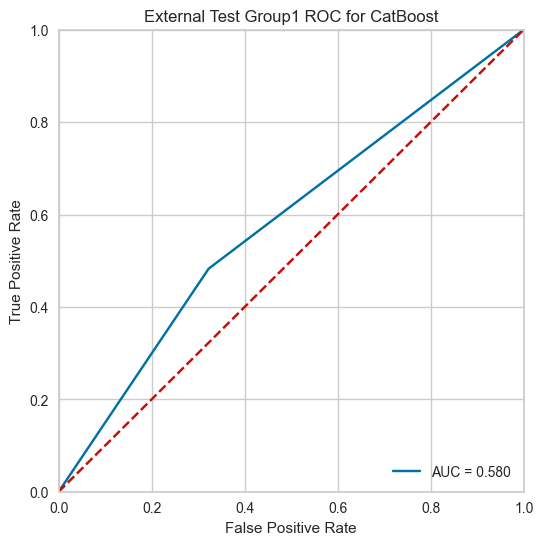

In [209]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [210]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[21 10]
 [15 14]]
Normalized confusion matrix
[[0.68 0.32]
 [0.52 0.48]]


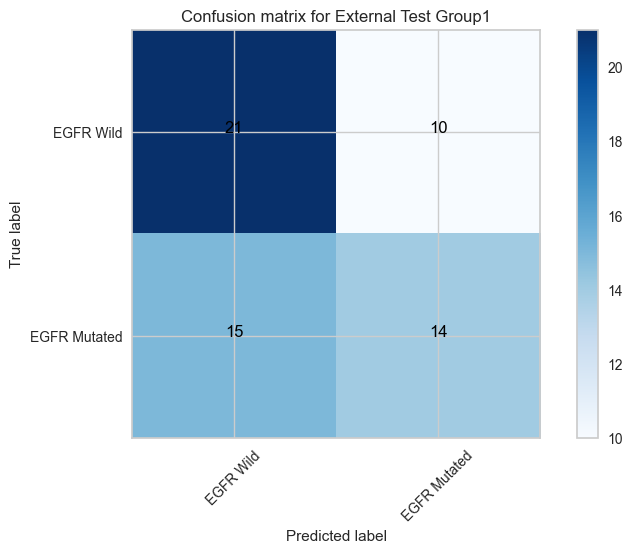

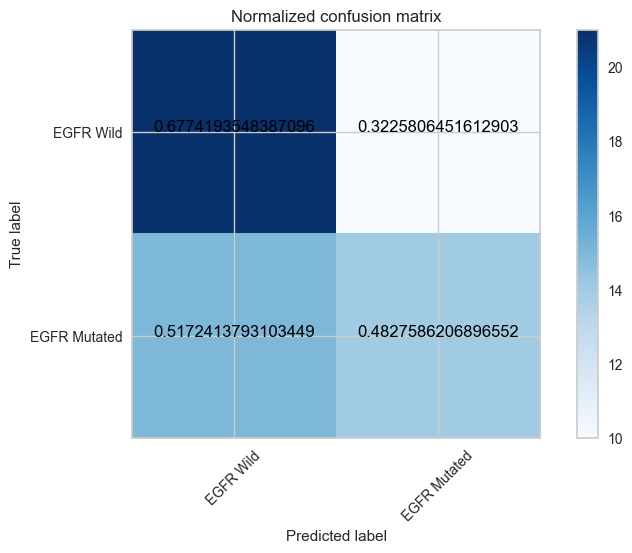

In [211]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [212]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.55      0.90      0.68        31
EGFR Mutated       0.67      0.21      0.32        29

    accuracy                           0.57        60
   macro avg       0.61      0.56      0.50        60
weighted avg       0.61      0.57      0.51        60

precision 0.6666666666666666 accuracy 0.5666666666666667 recall 0.20689655172413793 auc 0.5550611790878753


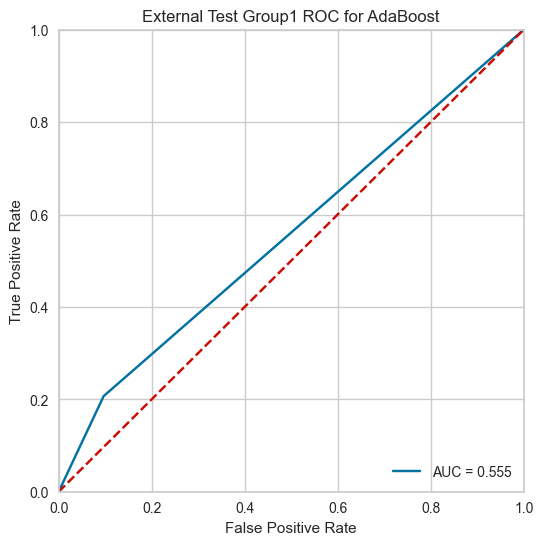

In [213]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [214]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[28  3]
 [23  6]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.79 0.21]]


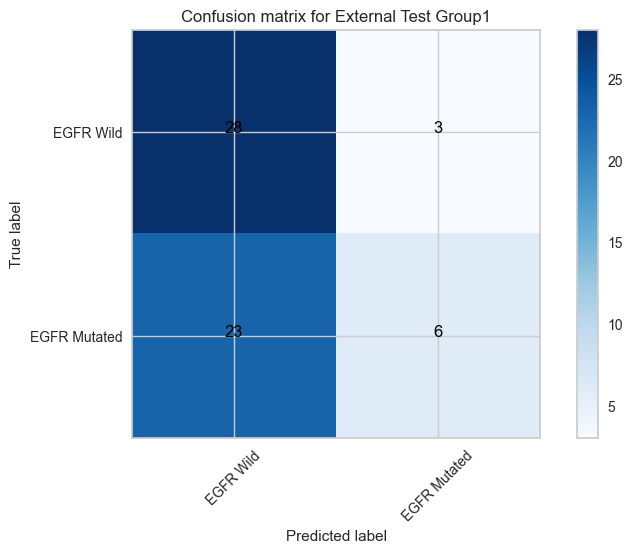

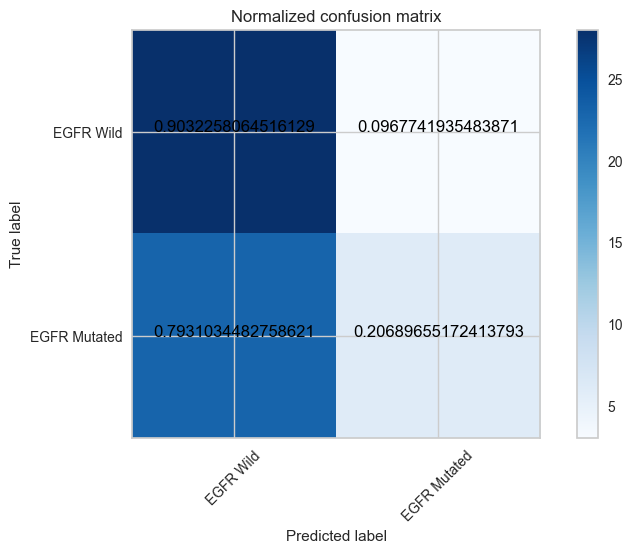

In [215]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [216]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.64      0.81      0.71        31
EGFR Mutated       0.71      0.52      0.60        29

    accuracy                           0.67        60
   macro avg       0.68      0.66      0.66        60
weighted avg       0.68      0.67      0.66        60

precision 0.6776556776556777 accuracy 0.6666666666666666 recall 0.6618464961067854 auc 0.6618464961067853


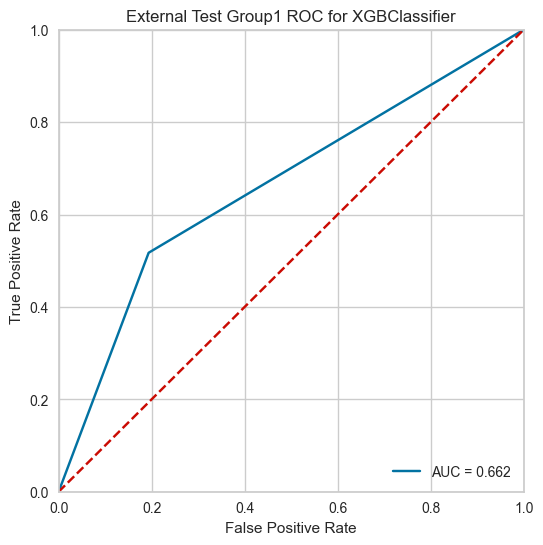

In [217]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [218]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[25  6]
 [14 15]]
Normalized confusion matrix
[[0.81 0.19]
 [0.48 0.52]]


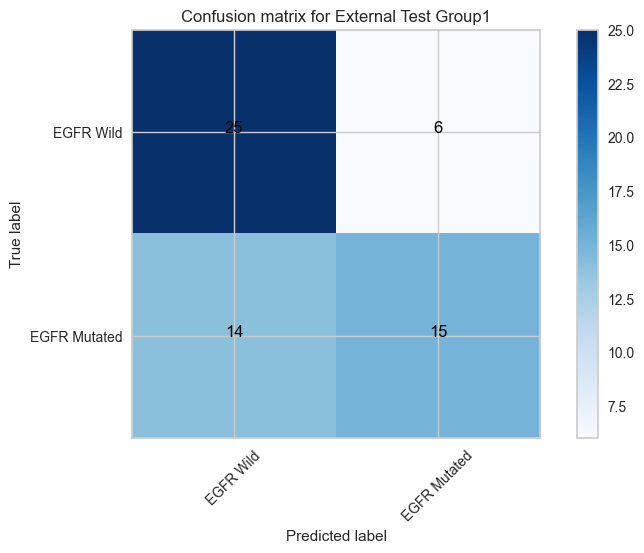

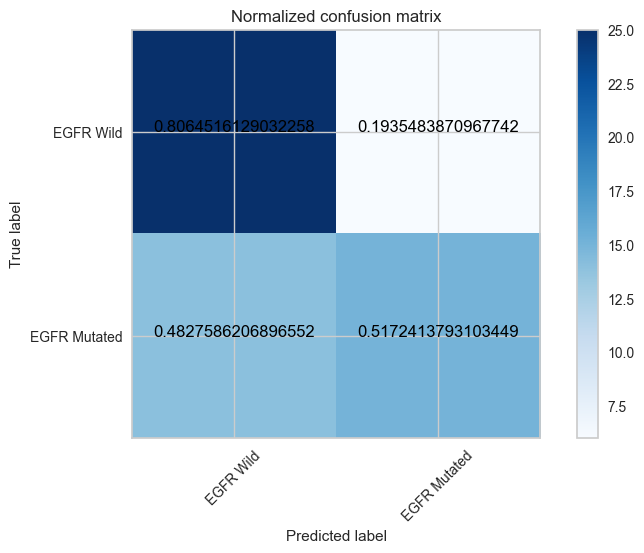

In [219]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [220]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.59      0.71      0.65        31
EGFR Mutated       0.61      0.48      0.54        29

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.59        60
weighted avg       0.60      0.60      0.59        60

precision 0.6086956521739131 accuracy 0.6 recall 0.4827586206896552 auc 0.596218020022247


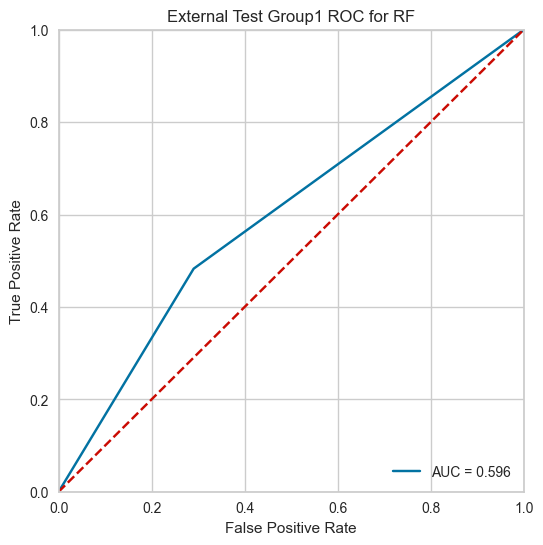

In [221]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[22  9]
 [15 14]]
Normalized confusion matrix
[[0.71 0.29]
 [0.52 0.48]]


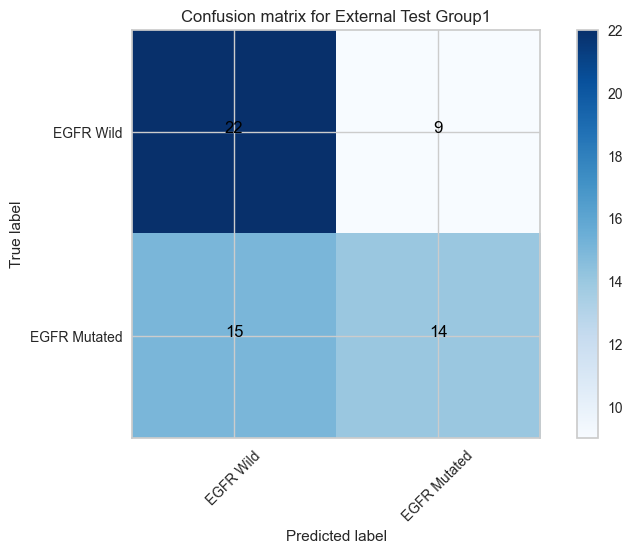

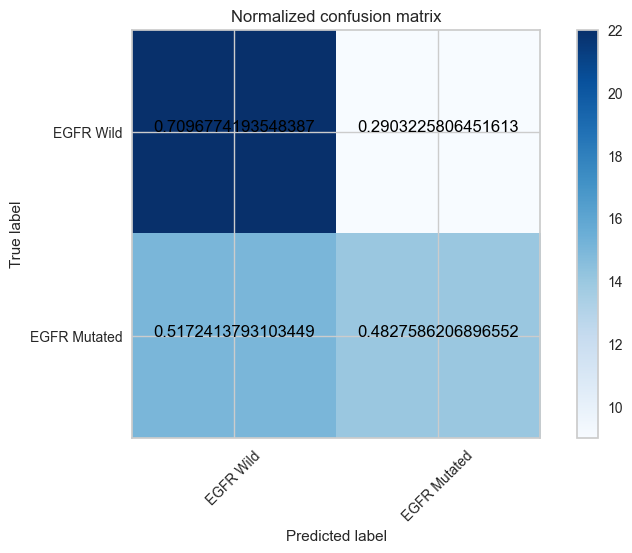

In [222]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [223]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.52      1.00      0.68        31
EGFR Mutated       0.00      0.00      0.00        29

    accuracy                           0.52        60
   macro avg       0.26      0.50      0.34        60
weighted avg       0.27      0.52      0.35        60

precision 0.0 accuracy 0.5166666666666667 recall 0.0 auc 0.5


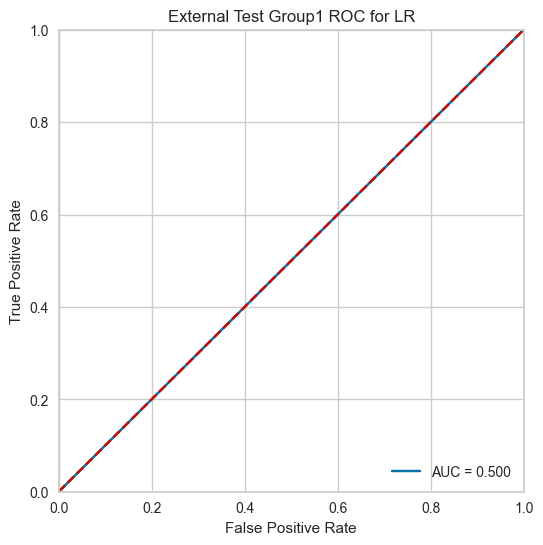

In [224]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[31  0]
 [29  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


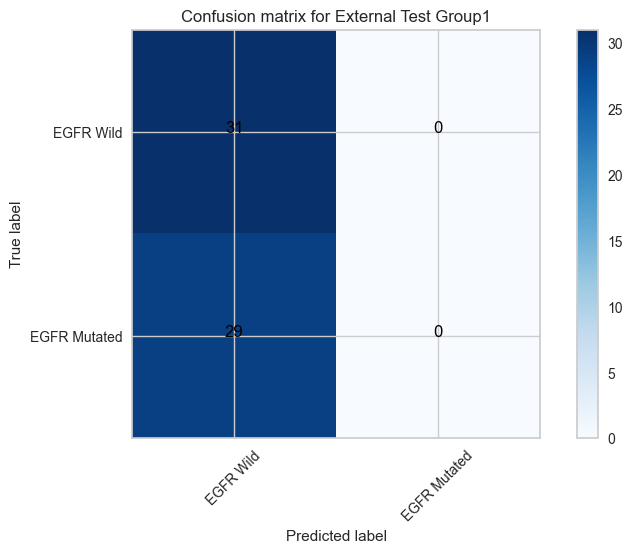

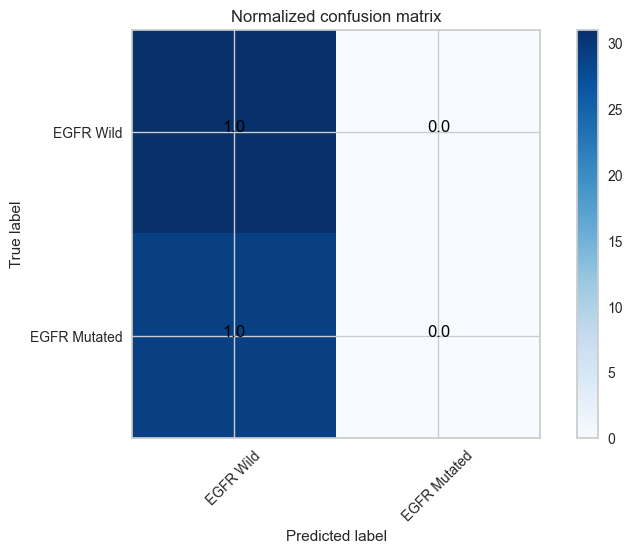

In [225]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [226]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.54      0.84      0.66        31
EGFR Mutated       0.58      0.24      0.34        29

    accuracy                           0.55        60
   macro avg       0.56      0.54      0.50        60
weighted avg       0.56      0.55      0.51        60

precision 0.5833333333333334 accuracy 0.55 recall 0.2413793103448276 auc 0.5400444938820913


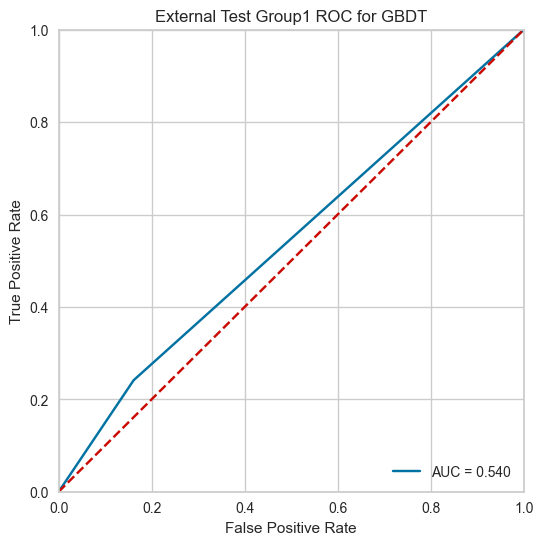

In [227]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[26  5]
 [22  7]]
Normalized confusion matrix
[[0.84 0.16]
 [0.76 0.24]]


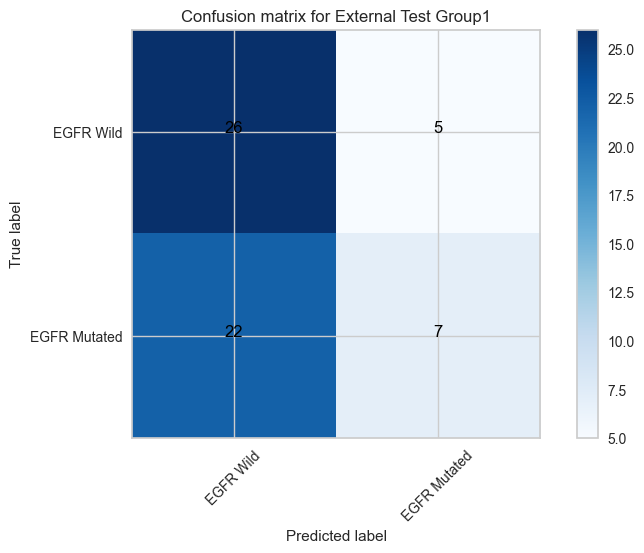

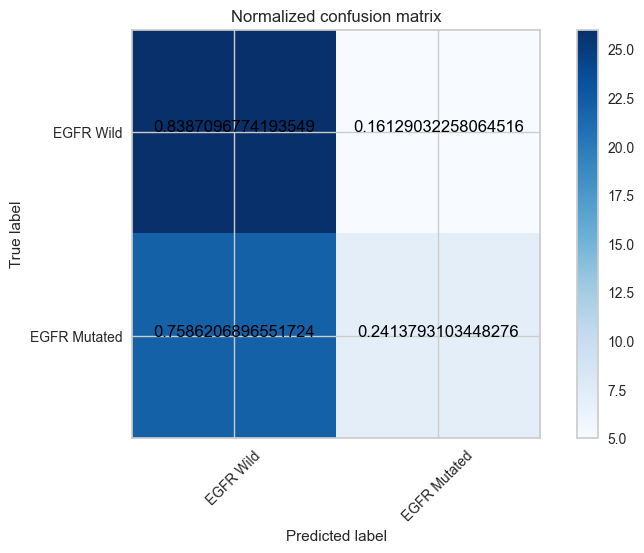

In [228]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [229]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.60      0.77      0.68        31
EGFR Mutated       0.65      0.45      0.53        29

    accuracy                           0.62        60
   macro avg       0.62      0.61      0.60        60
weighted avg       0.62      0.62      0.61        60

precision 0.65 accuracy 0.6166666666666667 recall 0.4482758620689655 auc 0.6112347052280311


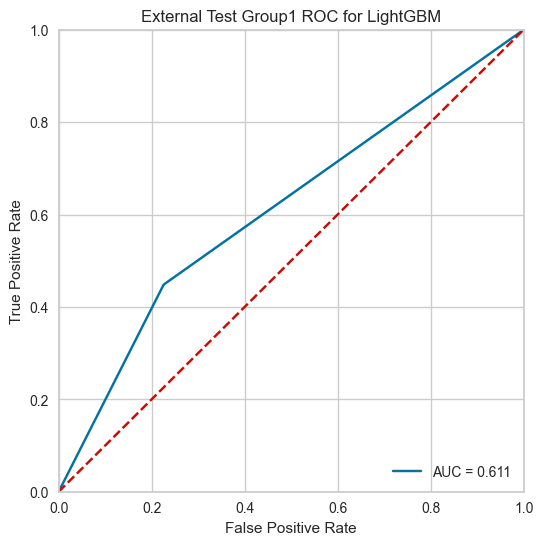

In [230]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[24  7]
 [16 13]]
Normalized confusion matrix
[[0.77 0.23]
 [0.55 0.45]]


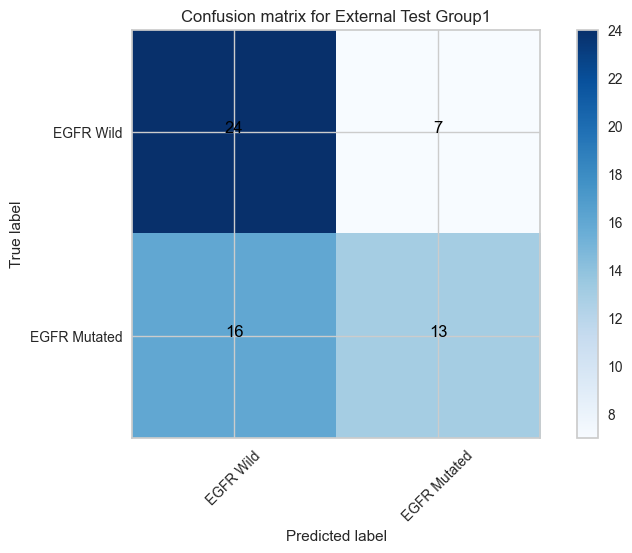

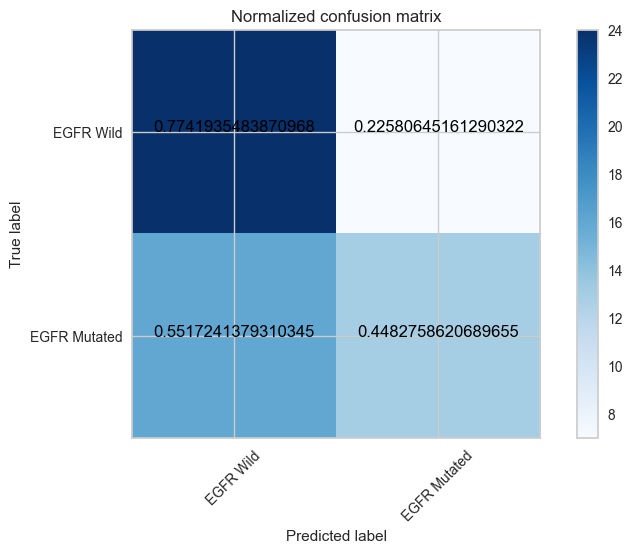

In [231]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()